# CONTAGEM DE TRÁFEGO

O tráfego gerado é o efeito verificado quando melhorias em uma rodovia promovem o aumento do número de viagens, aumentando sua demanda. Deve-se, por isso, calcular a elasticidade da demanda da rodovia para estimar-se a parcela de tráfego gerado nos estudos de viabilidade técnica de rodovias federais brasileiras.

Este projeto realiza o scraping no site do DNIT, obtem os dados e estrutura no pandas.

https://servicos.dnit.gov.br/dadospnct/ContagemContinua

# Instalação de Pacotes

### Processo já realizado na criação do ambiente Anaconda.
1. Crie um ambiente anaconda e instale as dependências conforme descrito no readme.md.
2. Suba o jupyter notebook e escolha o ambiente criado.

Obs.: É necessário a instalação do navegador Google Chrome no seu Sistema Operacional

In [11]:
# !pip install Selenium==4.14.0
# !pip install bs4==0.0.1
# !pip install pandas==1.5.3
# !pip install requests==2.31.0
# !pip install lxml==4.9.3
# !pip install webdriver-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00


# Importação de Bibliotecas

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from io import StringIO
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import os

# Função para abrir o navegador com Selenium

In [2]:
def driversetup(isChrome):
    if(isChrome):
        print('Chrome')
        options = webdriver.ChromeOptions()
        #run Selenium in headless mode
        # options.add_argument('--headless')
        # options.add_argument('--no-sandbox')
        #overcome limited resource problems
        options.add_argument('--disable-dev-shm-usage')
        # options.add_argument("lang=en")
        # #open Browser in maximized mode
        # options.add_argument("start-maximized")
        # #disable infobars
        # options.add_argument("disable-infobars")
        # #disable extension
        # options.add_argument("--disable-extensions")
        # options.add_argument("--incognito")
        # options.add_argument("--disable-blink-features=AutomationControlled")
        
        driver = webdriver.Chrome(options=options)

        # driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    else:
        print('Firefox')
        option = Options()
        option.headless = True
        # option.set_preference("http.response.timeout", 5)
        # option.set_preference("dom.max_script_run_time", 5)
        driver = webdriver.Firefox(options=option)

    return driver

# Execução do Projeto

In [3]:
isChrome = True
url = 'https://servicos.dnit.gov.br/dadospnct/ContagemContinua'
driver = driversetup(isChrome)
print(url)

driver.get(url)
print('loaded')

Chrome
https://servicos.dnit.gov.br/dadospnct/ContagemContinua
loaded


# Funções Auxiliares

In [5]:
def tableHtmlToDF(tableElement):
    tableStr = str(tableElement)
    dfs = pd.read_html(tableStr, encoding='UTF-8')
    df = dfs[0].dropna(axis=0, thresh=4)
    df = df.rename(columns={'Unnamed: 0': 'Classe', 'Unnamed: 1': 'Descrição', 'Unnamed: 2': 'Sentido', 
                            'Unnamed: 3': '1', 'Unnamed: 4': '2', 'Unnamed: 5': '3', 'Unnamed: 6': '4', 
                            'Unnamed: 7': '5', 'Unnamed: 8': '6', 'Unnamed: 9': '7', 'Unnamed: 10': '8', 
                            'Unnamed: 11': '9', 'Unnamed: 12': '10', 'Unnamed: 13': '11', 'Unnamed: 14': '12', 
                            'Unnamed: 15': '13', 'Unnamed: 16': '14', 'Unnamed: 17': '15', 'Unnamed: 18': '16', 
                            'Unnamed: 19': '17', 'Unnamed: 20': '18', 'Unnamed: 21': '19', 'Unnamed: 22': '20', 
                            'Unnamed: 23': '21', 'Unnamed: 24': '22', 'Unnamed: 25': '23', 'Unnamed: 26': '24', 
                            'Unnamed: 27': '25', 'Unnamed: 28': '26', 'Unnamed: 29': '27', 'Unnamed: 30': '28',
                            'Unnamed: 31': '29', 'Unnamed: 32': '30', 'Unnamed: 33': '31', 'Unnamed: 34': 'Total'})
    return df

def saveContentTxt(filename, contentStr):
    with open(filename, 'w') as f:
        f.write(contentStr)

# Lendo o HTML e convertendo para CSV com Selenium (Web Scrapping)

## Seleção dos Filtros

In [5]:
#Seleção do estado CE
driver.find_element("xpath", '//body/div[2]/div[3]/div[2]/div/div[2]/div[1]/div[2]/form/div[2]/div[1]/div/select/option[6]').click()

#Seleção da va BR-020:
driver.find_element("xpath", '//body/div[2]/div[3]/div[2]/div/div[2]/div[1]/div[2]/form/div[2]/div[2]/div/select/option[2]').click()

#Seleção de todos os postos de controle:
driver.find_element("xpath", '//body/div[2]/div[3]/div[2]/div/div[2]/div[1]/div[2]/form/div[3]/div').click()
driver.find_element("xpath", '//body/div[2]/div[3]/div[2]/div/div[2]/div[1]/div[2]/form/div[3]/div/div/ul/li[3]/label/input').click()
driver.implicitly_wait(1)

#Seleção do botão BUSCAR:
driver.find_element("xpath", '//body/div[2]/div[3]/div[2]/div/div[2]/div[1]/div[2]/form/div[4]/input').click()
driver.implicitly_wait(5)

## Obtenção dos dados para o ano 2014

### Web Scrapping

In [6]:
#Seleção do ANO 2014:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[2]/div/a[1]').click()
driver.implicitly_wait(3)

#Seleção da Aba Volume Total Diário:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/ul/li[2]/a').click()
driver.implicitly_wait(3)

#Seleção do mês:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[1]/select/option[5]').click()
driver.implicitly_wait(3)

#Abre o modal VMD:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[4]/input').click()
driver.implicitly_wait(3)

#Download do arquivo Excel:
# driver.find_element("xpath", '//body/div[4]/div[1]/span/span/input').click()
# driver.implicitly_wait(5)

#Ler o conteúdo da Table HTML:
element = driver.find_element("xpath", '/html/body/div[4]')
driver.implicitly_wait(5)

elementHTML = element.get_attribute('outerHTML') #gives exact HTML content of the element
elementSoup = BeautifulSoup(elementHTML,'html.parser')
# print(elementSoup)
# print('----------------------')
# print(elementSoup.prettify())
# print('----------------------')
# print(type(elementSoup))

tableElement = elementSoup.find(id='TabVtd230202')
# print(tableElement.prettify())


# Salva em um arquivo TXT (apenas para debug)
# saveContentTxt('vmd2014.txt', str(elementSoup))
# saveContentTxt('table2014.txt', str(tableElement))


# Converte a Table (HTML) para um DataFrame do Pandas
df = tableHtmlToDF(tableElement)
df.to_csv('table2014.csv', sep=';', encoding='utf-8')


# Sair da janela da tabela atual
driver.find_element("xpath", '//body/div[4]/div[1]/button/span[1]').click()
driver.implicitly_wait(3)

## Obtenção dos dados para o ano de 2015

In [ ]:
#Seleção do ANO 2015:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[2]/div/a[2]').click()
driver.implicitly_wait(3)

#Seleção da Aba Volume Total Diário:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/ul/li[2]/a').click()
driver.implicitly_wait(3)

#Seleção do mês:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[1]/select/option[12]').click()
driver.implicitly_wait(3)

#Abre o modal VMD:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[4]/input').click()
driver.implicitly_wait(3)

#Download do arquivo Excel:
# driver.find_element("xpath", '//body/div[4]/div[1]/span/span/input').click()
# driver.implicitly_wait(5)

#Ler o conteúdo da Table HTML:
element = driver.find_element("xpath", '/html/body/div[4]')
driver.implicitly_wait(5)

elementHTML = element.get_attribute('outerHTML') #gives exact HTML content of the element
elementSoup = BeautifulSoup(elementHTML,'html.parser')
# print(elementSoup)
# print('----------------------')
# print(elementSoup.prettify())
# print('----------------------')
# print(type(elementSoup))

tableElement = elementSoup.find(id='TabVtd230202')
# print(tableElement.prettify())


# Salva em um arquivo TXT (apenas para debug)
# saveContentTxt('vmd2015.txt', str(elementSoup))
# saveContentTxt('table2015.txt', str(tableElement))


# Converte a Table (HTML) para um DataFrame do Pandas
df = tableHtmlToDF(tableElement)
df.to_csv('table2015.csv', sep=';', encoding='utf-8')


# Sair da janela da tabela atual
driver.find_element("xpath", '//body/div[4]/div[1]/button/span[1]').click()
driver.implicitly_wait(3)

## Obtenção dos dados para o ano de 2016

In [ ]:
#Seleção do ANO 2016:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[2]/div/a[3]').click()
driver.implicitly_wait(3)

#Seleção da Aba Volume Total Diário:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/ul/li[2]/a').click()
driver.implicitly_wait(3)

#Seleção do mês:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[1]/select/option[12]').click()
driver.implicitly_wait(3)

#Abre o modal VMD:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[4]/input').click()
driver.implicitly_wait(3)

#Download do arquivo Excel:
# driver.find_element("xpath", '//body/div[4]/div[1]/span/span/input').click()
# driver.implicitly_wait(5)

#Ler o conteúdo da Table HTML:
element = driver.find_element("xpath", '/html/body/div[4]')
driver.implicitly_wait(5)

elementHTML = element.get_attribute('outerHTML') #gives exact HTML content of the element
elementSoup = BeautifulSoup(elementHTML,'html.parser')
# print(elementSoup)
# print('----------------------')
# print(elementSoup.prettify())
# print('----------------------')
# print(type(elementSoup))

tableElement = elementSoup.find(id='TabVtd230202')
# print(tableElement.prettify())


# Salva em um arquivo TXT (apenas para debug)
# saveContentTxt('vmd2015.txt', str(elementSoup))
# saveContentTxt('table2015.txt', str(tableElement))


# Converte a Table (HTML) para um DataFrame do Pandas
df = tableHtmlToDF(tableElement)
df.to_csv('table2016.csv', sep=';', encoding='utf-8')


# Sair da janela da tabela atual
driver.find_element("xpath", '//body/div[4]/div[1]/button/span[1]').click()
driver.implicitly_wait(3)

## Obtenção dos dados para o ano de 2017

In [ ]:
#Seleção do ANO 2017:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[2]/div/a[4]').click()
driver.implicitly_wait(3)

#Seleção da Aba Volume Total Diário:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/ul/li[2]/a').click()
driver.implicitly_wait(3)

#Seleção do mês:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[1]/select/option[9]').click()
driver.implicitly_wait(3)

#Abre o modal VMD:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[4]/input').click()
driver.implicitly_wait(3)

#Download do arquivo Excel:
# driver.find_element("xpath", '//body/div[4]/div[1]/span/span/input').click()
# driver.implicitly_wait(5)

#Ler o conteúdo da Table HTML:
element = driver.find_element("xpath", '/html/body/div[4]')
driver.implicitly_wait(5)

elementHTML = element.get_attribute('outerHTML') #gives exact HTML content of the element
elementSoup = BeautifulSoup(elementHTML,'html.parser')
# print(elementSoup)
# print('----------------------')
# print(elementSoup.prettify())
# print('----------------------')
# print(type(elementSoup))

tableElement = elementSoup.find(id='TabVtd230202')
# print(tableElement.prettify())


# Salva em um arquivo TXT (apenas para debug)
# saveContentTxt('vmd2015.txt', str(elementSoup))
# saveContentTxt('table2015.txt', str(tableElement))


# Converte a Table (HTML) para um DataFrame do Pandas
df = tableHtmlToDF(tableElement)
df.to_csv('table2017.csv', sep=';', encoding='utf-8')


# Sair da janela da tabela atual
driver.find_element("xpath", '//body/div[4]/div[1]/button/span[1]').click()
driver.implicitly_wait(3)

## Obtenção dos dados para o ano de 2018

In [ ]:
#Seleção do ANO 2018:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[2]/div/a[5]').click()
driver.implicitly_wait(3)

#Seleção da Aba Volume Total Diário:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/ul/li[2]/a').click()
driver.implicitly_wait(3)

#Seleção do mês:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[1]/select/option[12]').click()
driver.implicitly_wait(3)

#Abre o modal VMD:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[4]/input').click()
driver.implicitly_wait(3)

#Download do arquivo Excel:
# driver.find_element("xpath", '//body/div[4]/div[1]/span/span/input').click()
# driver.implicitly_wait(5)

#Ler o conteúdo da Table HTML:
element = driver.find_element("xpath", '/html/body/div[4]')
driver.implicitly_wait(5)

elementHTML = element.get_attribute('outerHTML') #gives exact HTML content of the element
elementSoup = BeautifulSoup(elementHTML,'html.parser')
# print(elementSoup)
# print('----------------------')
# print(elementSoup.prettify())
# print('----------------------')
# print(type(elementSoup))

tableElement = elementSoup.find(id='TabVtd230202')
# print(tableElement.prettify())


# Salva em um arquivo TXT (apenas para debug)
# saveContentTxt('vmd2015.txt', str(elementSoup))
# saveContentTxt('table2015.txt', str(tableElement))


# Converte a Table (HTML) para um DataFrame do Pandas
df = tableHtmlToDF(tableElement)
df.to_csv('table2018.csv', sep=';', encoding='utf-8')


# Sair da janela da tabela atual
driver.find_element("xpath", '//body/div[4]/div[1]/button/span[1]').click()
driver.implicitly_wait(3)

## Obtenção dos dados para o ano de 2021

In [ ]:
#Seleção do ANO 2021:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[2]/div/a[6]').click()
driver.implicitly_wait(3)

#Seleção da Aba Volume Total Diário:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/ul/li[2]/a').click()
driver.implicitly_wait(3)

#Seleção do mês:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[1]/select/option[4]').click()
driver.implicitly_wait(3)

#Abre o modal VMD:
driver.find_element("xpath", '//body/div[2]/div[4]/div/div/div/div[3]/div/div/div[3]/div/div[2]/div[4]/input').click()
driver.implicitly_wait(3)

#Download do arquivo Excel:
# driver.find_element("xpath", '//body/div[4]/div[1]/span/span/input').click()
# driver.implicitly_wait(5)

#Ler o conteúdo da Table HTML:
element = driver.find_element("xpath", '/html/body/div[4]')
driver.implicitly_wait(5)

elementHTML = element.get_attribute('outerHTML') #gives exact HTML content of the element
elementSoup = BeautifulSoup(elementHTML,'html.parser')
# print(elementSoup)
# print('----------------------')
# print(elementSoup.prettify())
# print('----------------------')
# print(type(elementSoup))

tableElement = elementSoup.find(id='TabVtd230202')
# print(tableElement.prettify())


# Salva em um arquivo TXT (apenas para debug)
# saveContentTxt('vmd2015.txt', str(elementSoup))
# saveContentTxt('table2015.txt', str(tableElement))


# Converte a Table (HTML) para um DataFrame do Pandas
df = tableHtmlToDF(tableElement)
df.to_csv('table2021.csv', sep=';', encoding='utf-8')


# Sair da janela da tabela atual
driver.find_element("xpath", '//body/div[4]/div[1]/button/span[1]').click()
driver.implicitly_wait(3)

# Encerra o uso do driver selenium
driver.quit()

# Análise dos Arquivos CSV

## POR CATEGORIA DE VEÍCULO

### Geração dos Gráficos

In [6]:
dfs = {}

for ano in range(2014, 2023):
    filename = f'table{ano}.csv'
    if not os.path.exists(filename):
        # print(f"Arquivo {filename} não encontrado. Pulando para o próximo ano.")
        continue  # Pula para o próximo ano se o arquivo não existe
    
    df = pd.read_csv(filename, sep=';')
    #df.info()
    #df.duplicated().sum()
    dfs[ano] = df


## Análise Estatística

In [8]:
def gerarPorClasse(classe, ano):
    classeItem = df[df['Classe'] == classe]
    
    print('\n****************************')
    print('** CLASSE: ' + classe)
    print(classeItem.shape)

    # Filtra as linhas e colunas do DataFrame obtendo apenas os Sentidos C e D da Classe A
    subItem = classeItem.iloc[:2, 3:35]
    
    # Sentido C
    C = subItem[subItem['Sentido'] == 'C']
    C = C.drop(['Sentido'],axis =1)
    C = np.array(C)
    
    # Sentido D
    D = subItem[subItem['Sentido'] == 'D']
    D = D.drop(['Sentido'],axis =1)
    D = np.array(D)

    
    print('\n** SENTIDO C')
    print(f'Media no Sentido C = {C.mean()}')
    print(f'Maximo = {C.max()}')
    print(f'Minimo = {C.min()}')
    print(f'Desvio Padrao = {C.std()}')
    print(f'Mediana = {np.median(C)}')
    
    print('\n** SENTIDO D')
    print(f'Media no Sentido D = {D.mean()}')
    print(f'Maximo = {D.max()}')
    print(f'Minimo = {D.min()}')
    print(f'Desvio Padrao = {D.std()}')
    print(f'Mediana = {np.median(D)}')

    # print(f"Gerando gráfico para o arquivo {filename}")
    
    rp = sns.catplot(data=classeItem, kind="bar", x="Sentido", y="Total", hue="Descrição") 
    rp.fig.suptitle(str(ano))
    
    # Gráfico do VMD da Classe A
    plt.figure(figsize=(10, 6))
    for sentido in ['C', 'D']:
        dados_sentido = subItem[subItem['Sentido'] == sentido]
        plt.plot(dados_sentido.columns[1:], dados_sentido.values[0][1:], label=f'Sentido {sentido}', marker='o', linestyle='-')
    
    
    plt.title('Volume de Tráfego de Ônibus/Cam de 2 eixos por Sentido - ' + str(ano))
    plt.xlabel('Dia do mês')
    plt.ylabel('QTD de veículos')
    plt.legend()
        
    plt.grid(True)
    plt.show()


****************************
** ANO: 2014

****************************
** CLASSE: A
(3, 36)

** SENTIDO C
Media no Sentido C = 301.61290322580646
Maximo = 384
Minimo = 202
Desvio Padrao = 42.06191858197967
Mediana = 313.0

** SENTIDO D
Media no Sentido D = 336.19354838709677
Maximo = 442
Minimo = 133
Desvio Padrao = 79.91504333931803
Mediana = 370.0


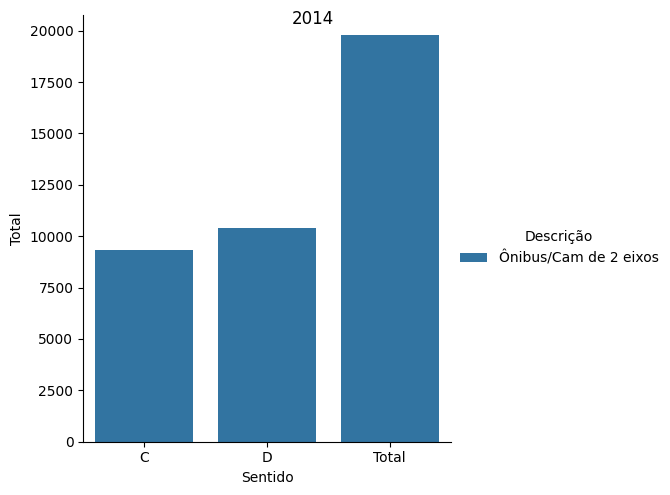

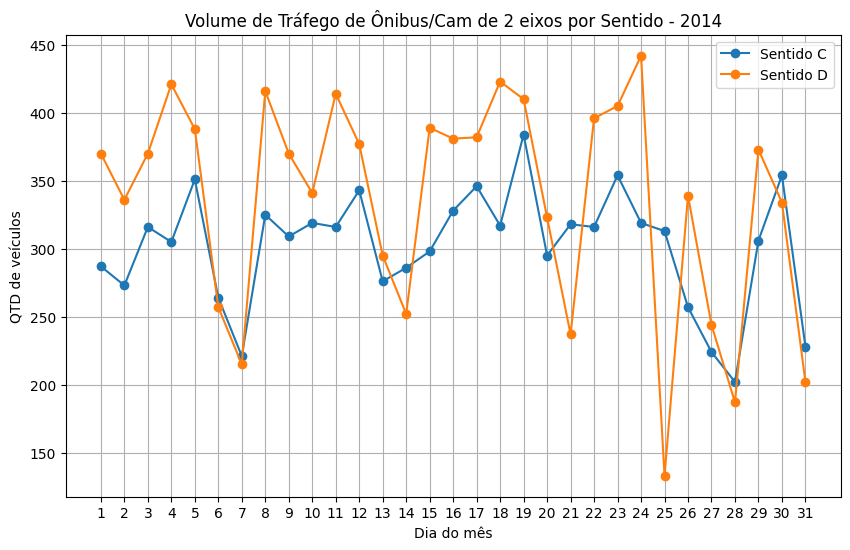


****************************
** CLASSE: B
(3, 36)

** SENTIDO C
Media no Sentido C = 184.3548387096774
Maximo = 267
Minimo = 44
Desvio Padrao = 57.42796238491893
Mediana = 193.0

** SENTIDO D
Media no Sentido D = 182.61290322580646
Maximo = 272
Minimo = 40
Desvio Padrao = 64.73752335609508
Mediana = 201.0


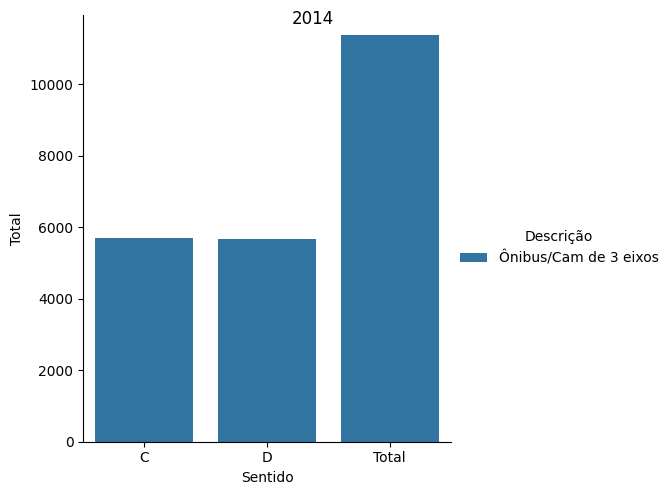

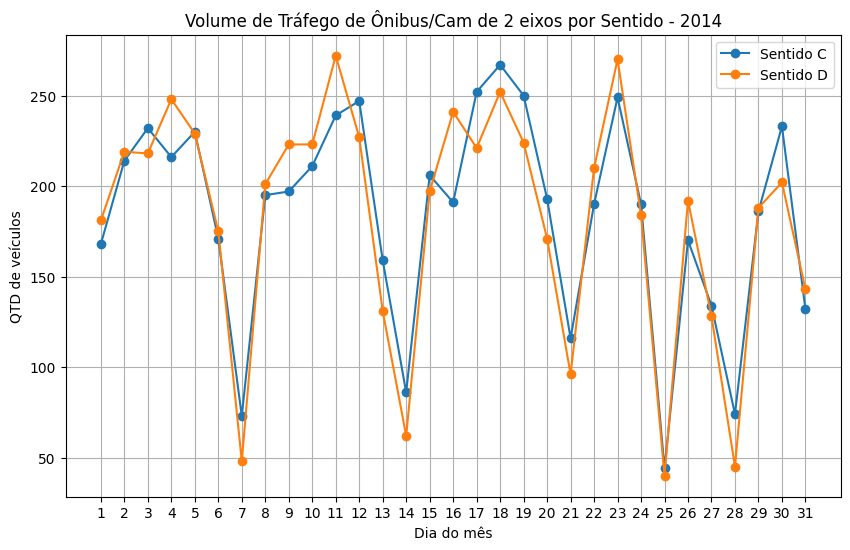


****************************
** CLASSE: C
(3, 36)

** SENTIDO C
Media no Sentido C = 25.967741935483872
Maximo = 42
Minimo = 6
Desvio Padrao = 8.173457715690276
Mediana = 26.0

** SENTIDO D
Media no Sentido D = 22.322580645161292
Maximo = 38
Minimo = 4
Desvio Padrao = 9.035368128152736
Mediana = 24.0


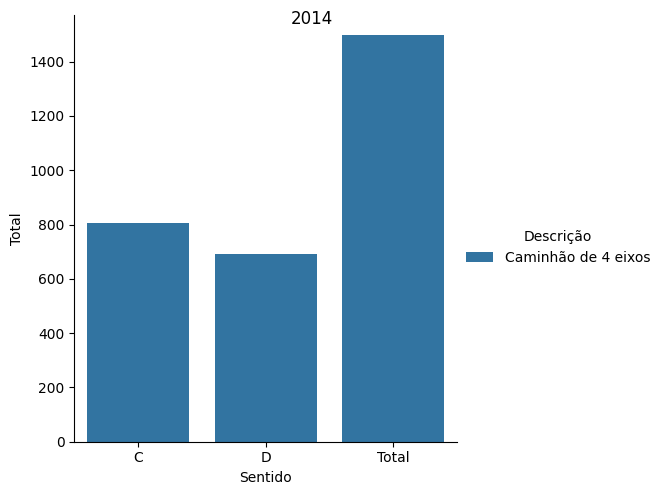

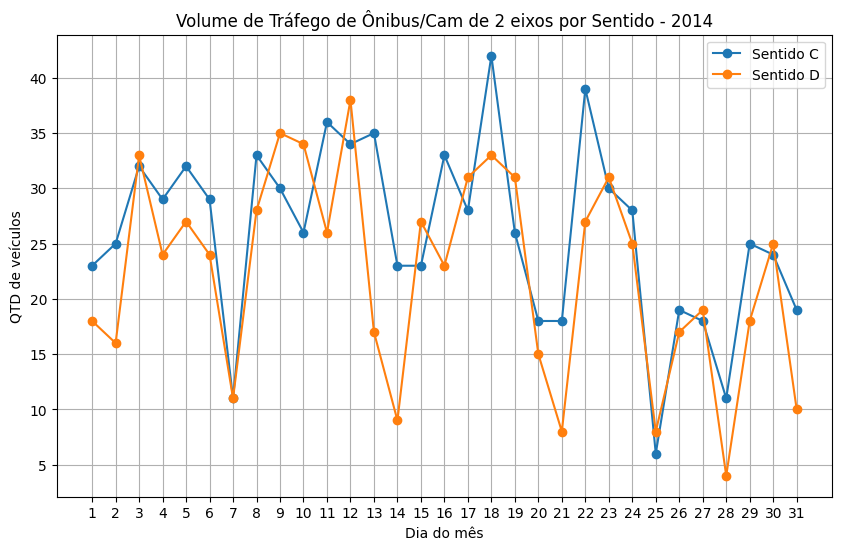


****************************
** CLASSE: D
(3, 36)

** SENTIDO C
Media no Sentido C = 17.387096774193548
Maximo = 30
Minimo = 9
Desvio Padrao = 4.9165777460109625
Mediana = 18.0

** SENTIDO D
Media no Sentido D = 15.483870967741936
Maximo = 28
Minimo = 0
Desvio Padrao = 6.564179273278402
Mediana = 16.0


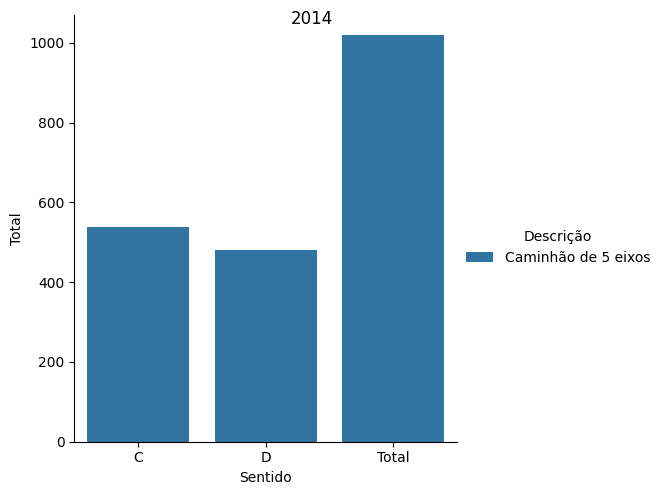

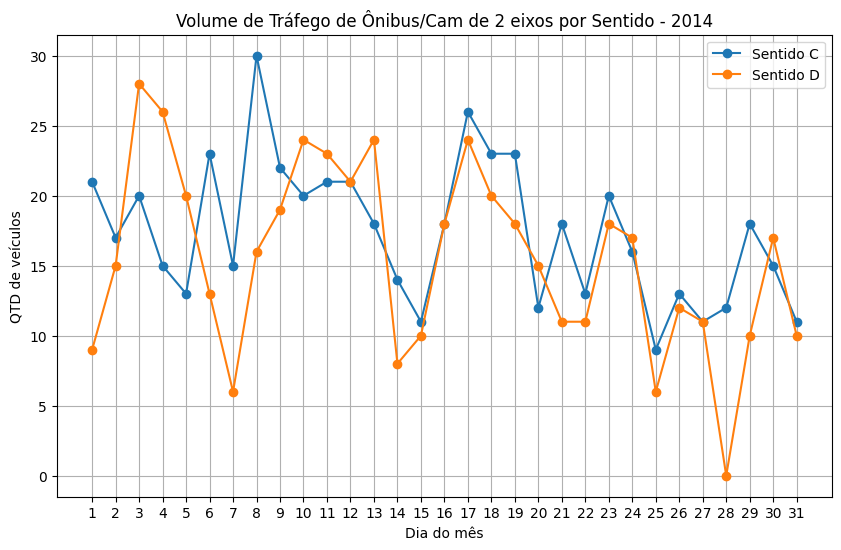


****************************
** CLASSE: E
(3, 36)

** SENTIDO C
Media no Sentido C = 13.32258064516129
Maximo = 22
Minimo = 3
Desvio Padrao = 5.342387389331655
Mediana = 14.0

** SENTIDO D
Media no Sentido D = 28.548387096774192
Maximo = 44
Minimo = 10
Desvio Padrao = 9.587756674201975
Mediana = 29.0


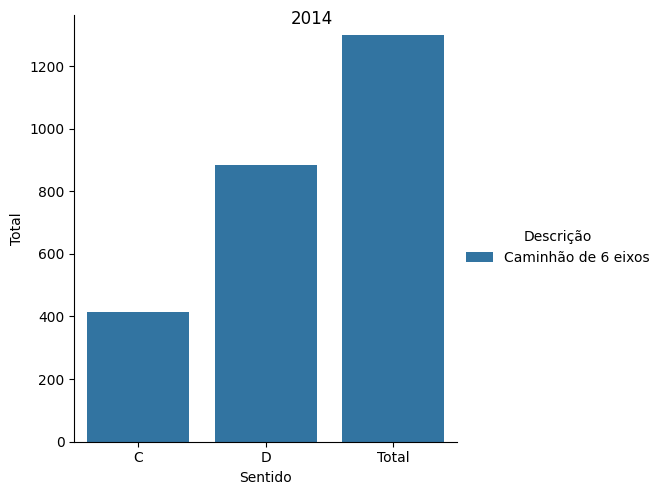

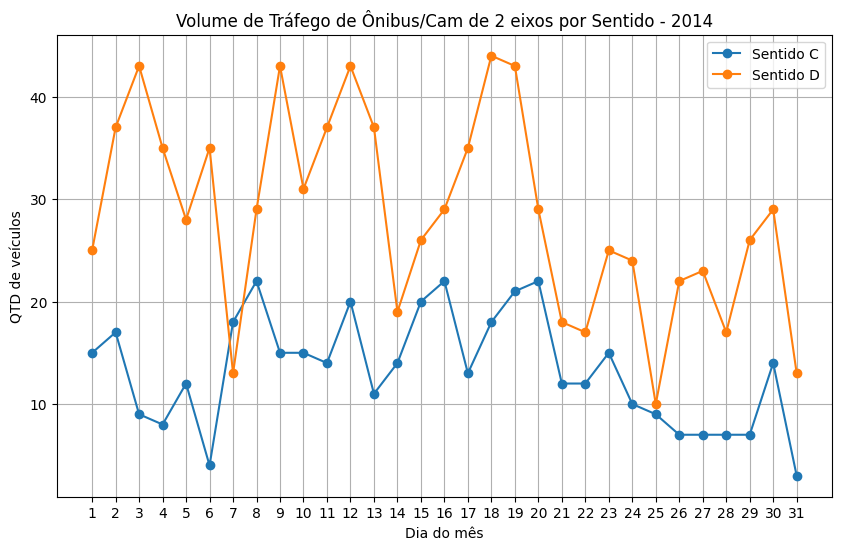


****************************
** CLASSE: F
(3, 36)

** SENTIDO C
Media no Sentido C = 5.838709677419355
Maximo = 12
Minimo = 0
Desvio Padrao = 3.2238703867481258
Mediana = 6.0

** SENTIDO D
Media no Sentido D = 9.03225806451613
Maximo = 18
Minimo = 1
Desvio Padrao = 4.161915431917732
Mediana = 9.0


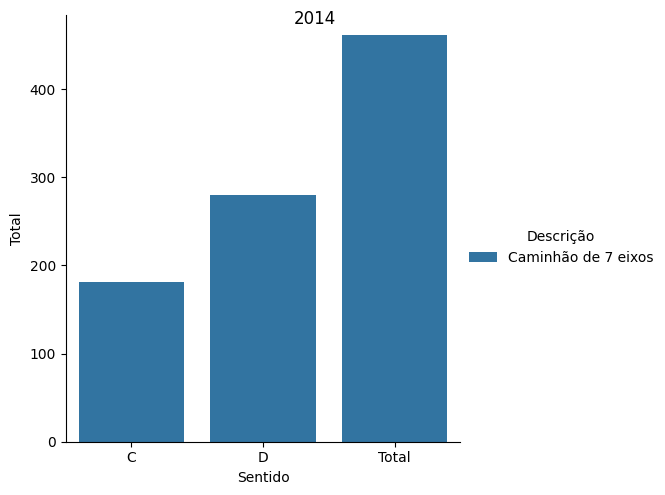

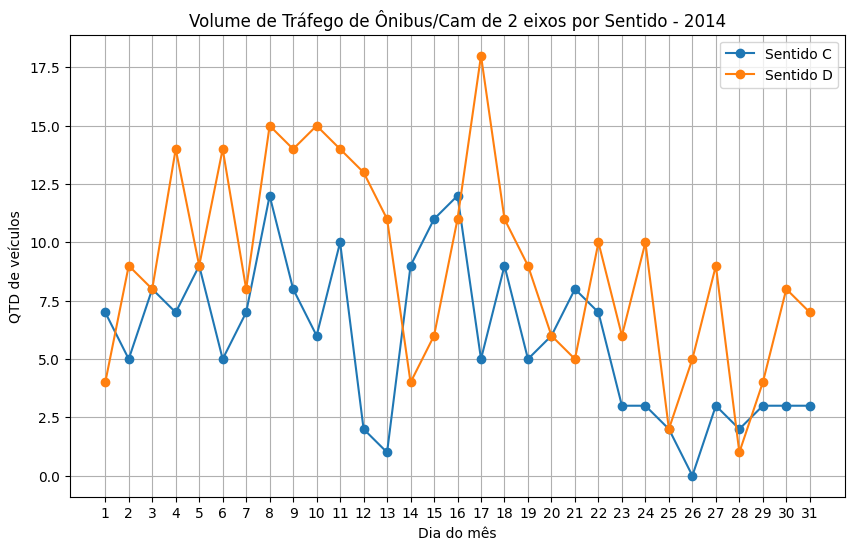


****************************
** CLASSE: G
(3, 36)

** SENTIDO C
Media no Sentido C = 0.06451612903225806
Maximo = 1
Minimo = 0
Desvio Padrao = 0.2456701001891583
Mediana = 0.0

** SENTIDO D
Media no Sentido D = 0.1935483870967742
Maximo = 2
Minimo = 0
Desvio Padrao = 0.4696845089858399
Mediana = 0.0


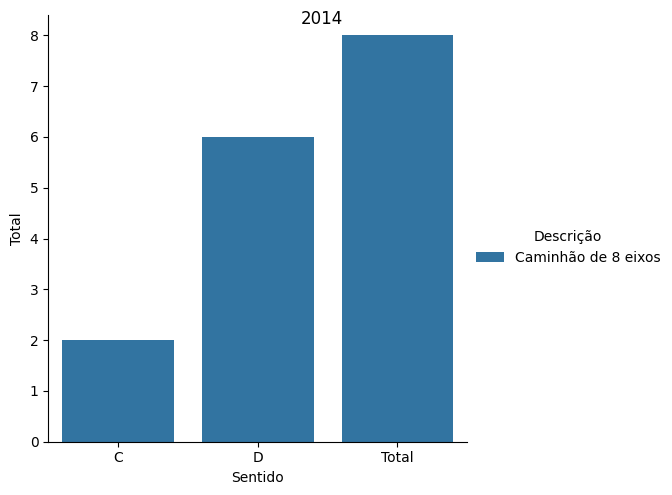

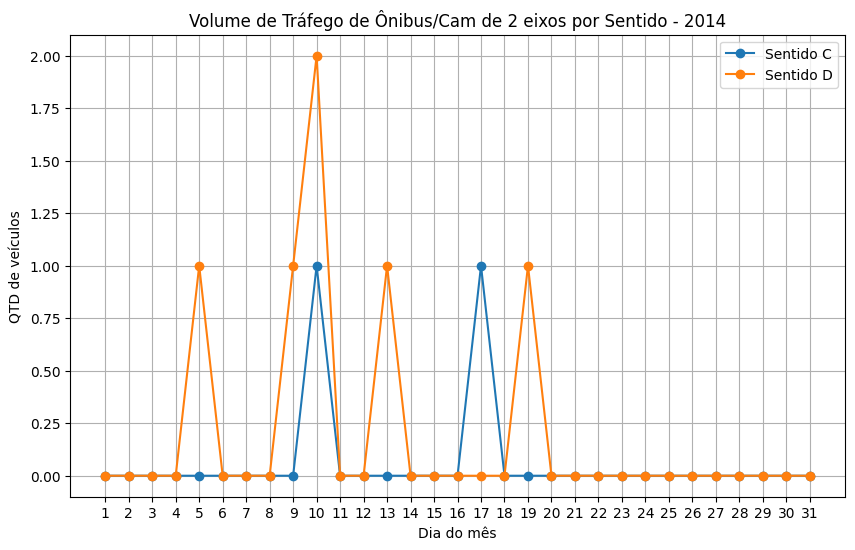


****************************
** CLASSE: H
(3, 36)

** SENTIDO C
Media no Sentido C = 10.290322580645162
Maximo = 22
Minimo = 2
Desvio Padrao = 4.900253768195676
Mediana = 10.0

** SENTIDO D
Media no Sentido D = 8.290322580645162
Maximo = 21
Minimo = 1
Desvio Padrao = 4.773539623916724
Mediana = 8.0


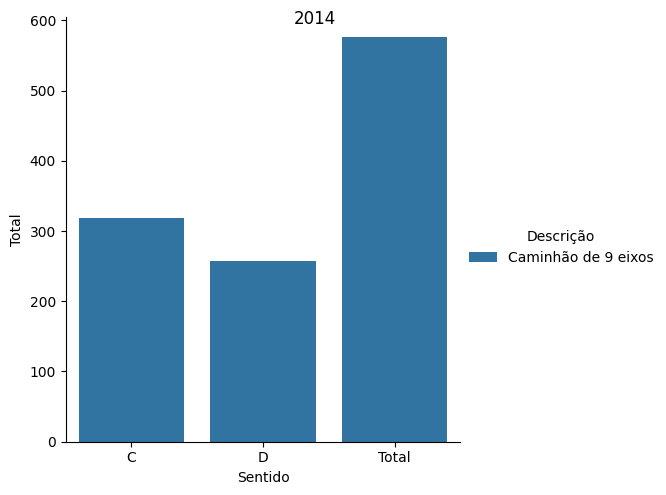

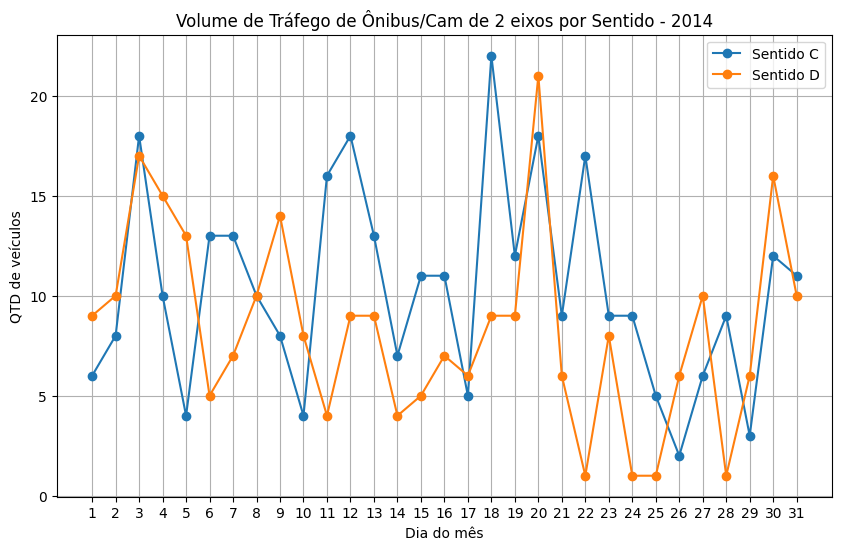


****************************
** CLASSE: I
(3, 36)

** SENTIDO C
Media no Sentido C = 2589.6129032258063
Maximo = 4312
Minimo = 1758
Desvio Padrao = 575.0898767019983
Mediana = 2400.0

** SENTIDO D
Media no Sentido D = 2742.2258064516127
Maximo = 5183
Minimo = 1968
Desvio Padrao = 741.1265927159822
Mediana = 2607.0


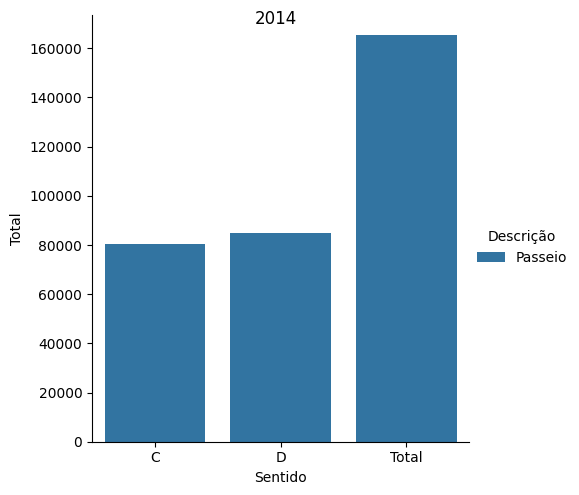

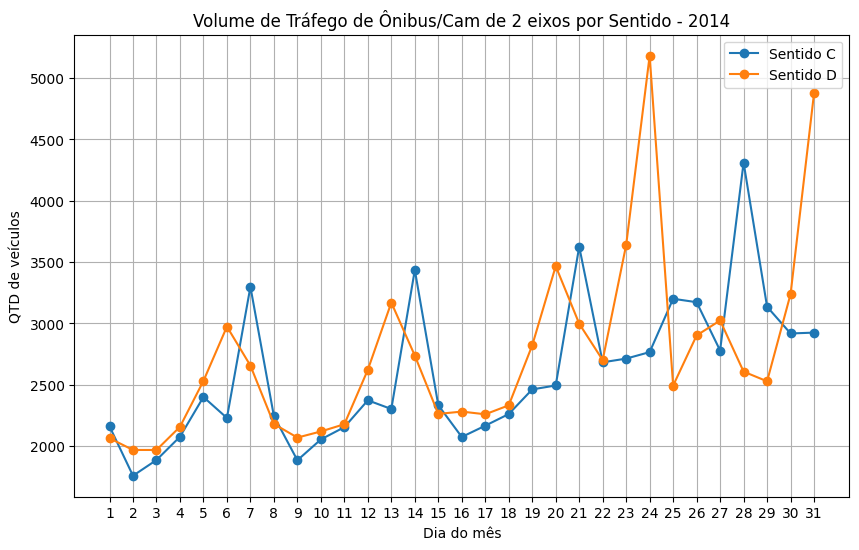


****************************
** CLASSE: J
(3, 36)

** SENTIDO C
Media no Sentido C = 524.2903225806451
Maximo = 746
Minimo = 404
Desvio Padrao = 97.80632394237986
Mediana = 484.0

** SENTIDO D
Media no Sentido D = 527.8064516129032
Maximo = 1061
Minimo = 369
Desvio Padrao = 161.9957027217456
Mediana = 453.0


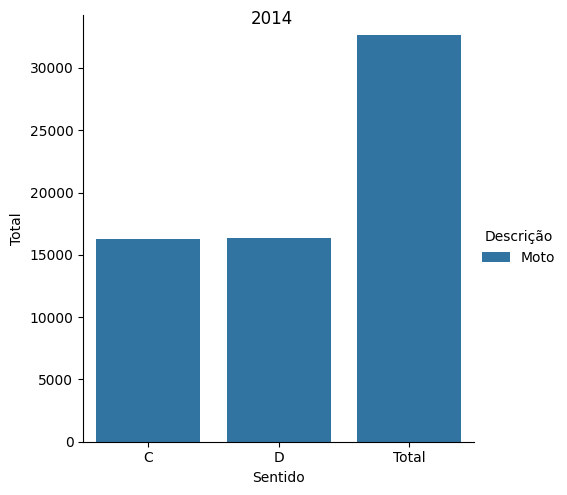

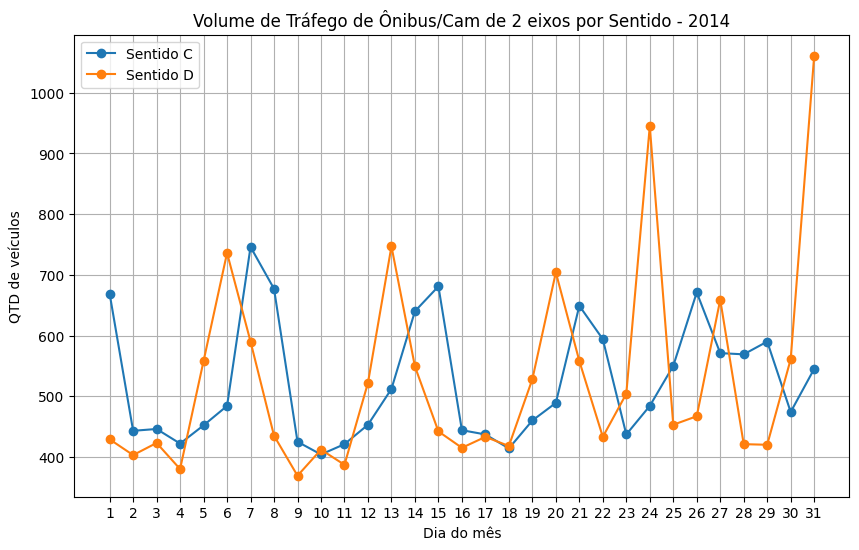


****************************
** CLASSE: L
(3, 36)

** SENTIDO C
Media no Sentido C = 214.90322580645162
Maximo = 282
Minimo = 125
Desvio Padrao = 34.196165450670875
Mediana = 212.0

** SENTIDO D
Media no Sentido D = 144.90322580645162
Maximo = 188
Minimo = 70
Desvio Padrao = 27.758584651459397
Mediana = 151.0


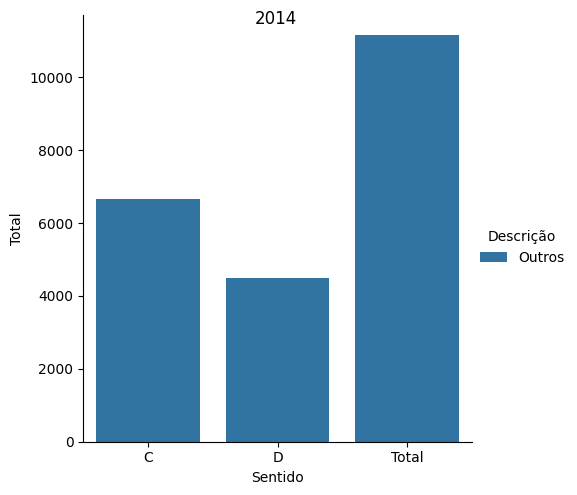

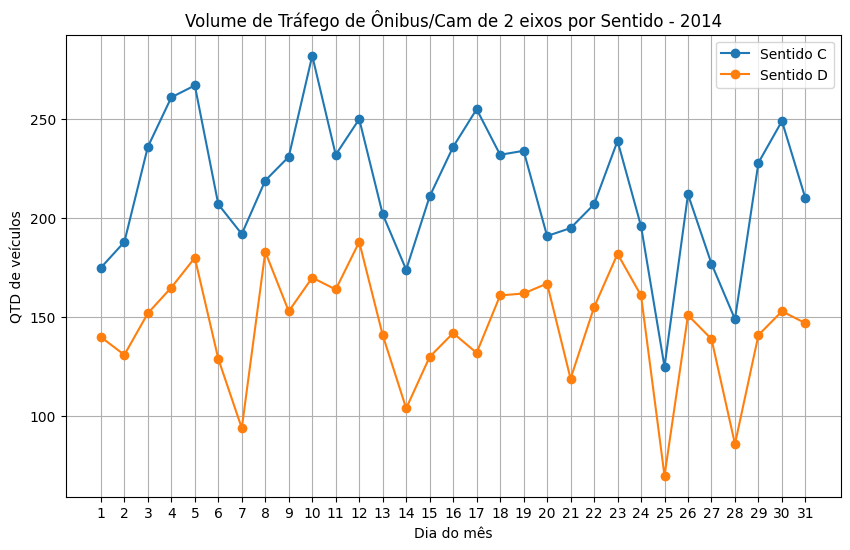


****************************
** ANO: 2015

****************************
** CLASSE: A
(3, 36)

** SENTIDO C
Media no Sentido C = 327.93548387096774
Maximo = 458
Minimo = 173
Desvio Padrao = 69.02357497395526
Mediana = 357.0

** SENTIDO D
Media no Sentido D = 337.06451612903226
Maximo = 489
Minimo = 110
Desvio Padrao = 96.60926806667554
Mediana = 381.0


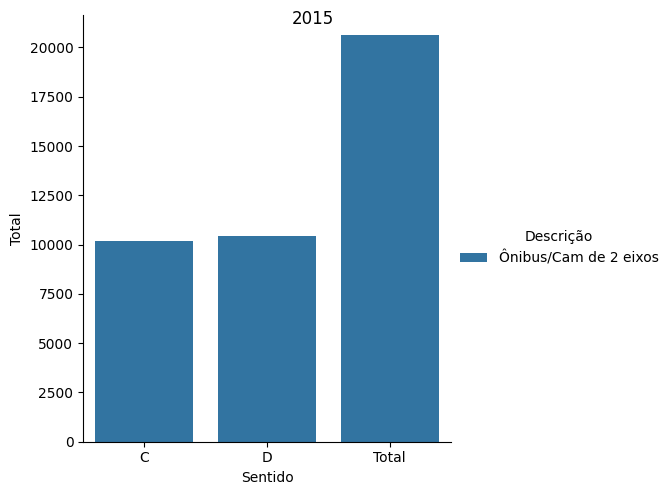

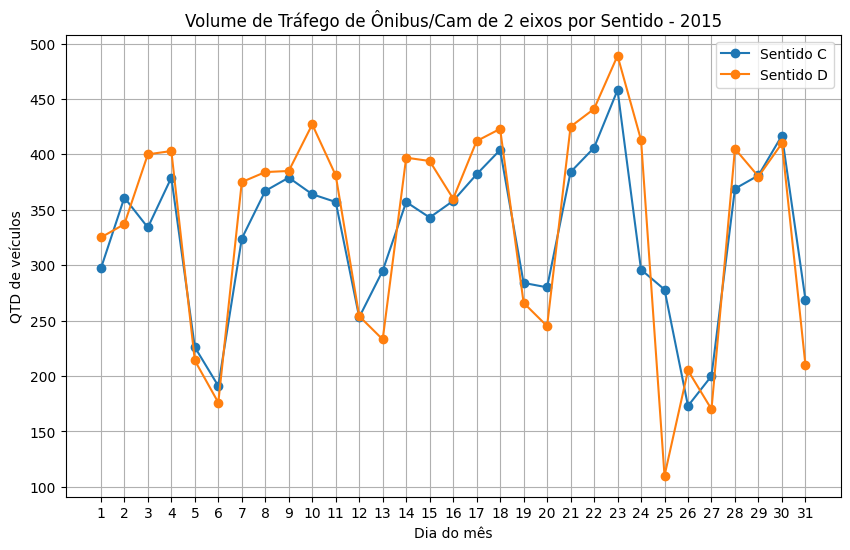


****************************
** CLASSE: B
(3, 36)

** SENTIDO C
Media no Sentido C = 179.80645161290323
Maximo = 276
Minimo = 50
Desvio Padrao = 60.520015006947965
Mediana = 196.0

** SENTIDO D
Media no Sentido D = 171.0
Maximo = 249
Minimo = 31
Desvio Padrao = 65.7208171468646
Mediana = 200.0


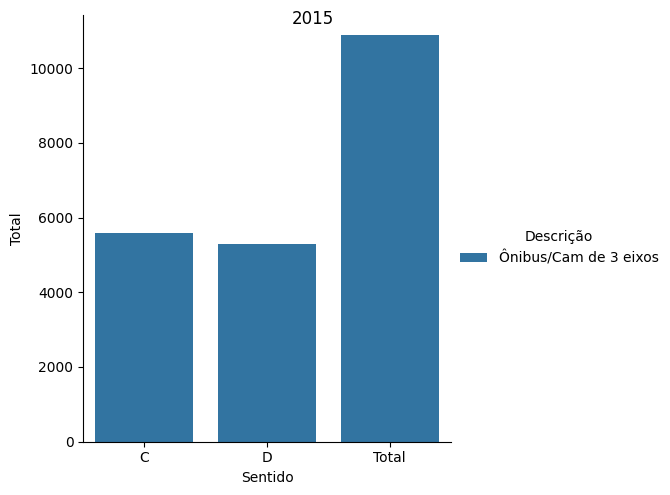

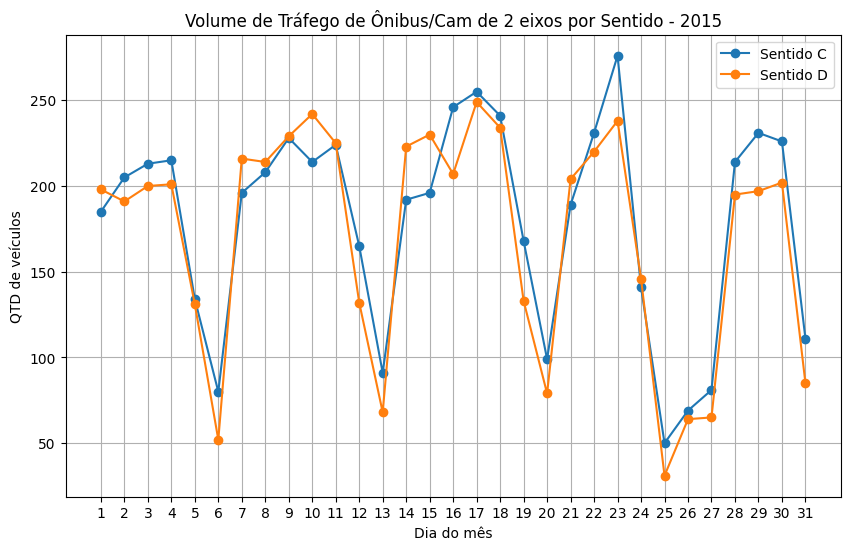


****************************
** CLASSE: C
(3, 36)

** SENTIDO C
Media no Sentido C = 25.451612903225808
Maximo = 40
Minimo = 10
Desvio Padrao = 8.027528080048212
Mediana = 26.0

** SENTIDO D
Media no Sentido D = 27.129032258064516
Maximo = 44
Minimo = 5
Desvio Padrao = 10.48421835652742
Mediana = 27.0


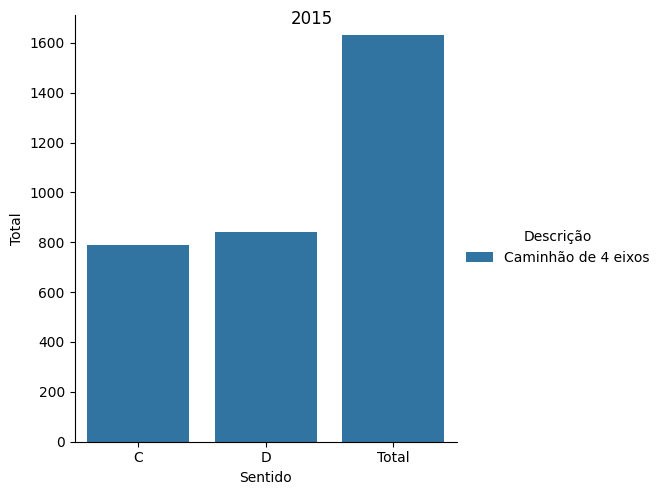

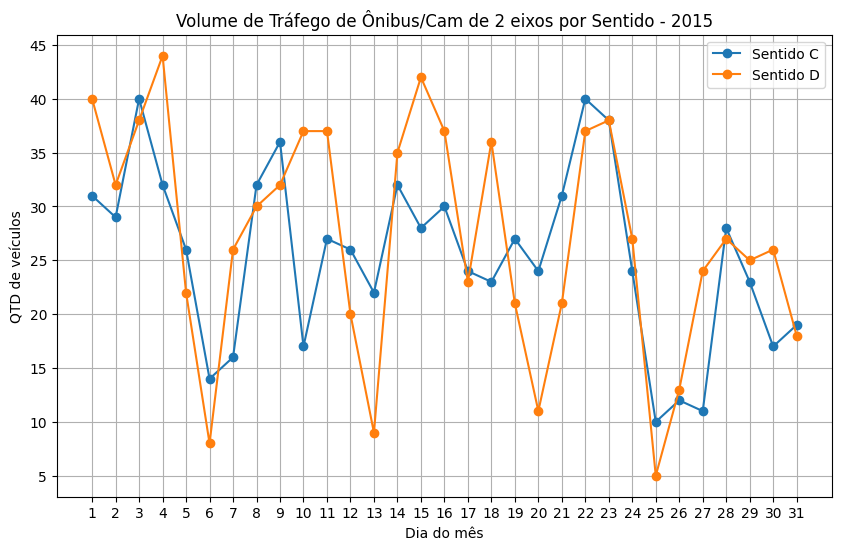


****************************
** CLASSE: D
(3, 36)

** SENTIDO C
Media no Sentido C = 17.225806451612904
Maximo = 31
Minimo = 3
Desvio Padrao = 7.486373330255336
Mediana = 18.0

** SENTIDO D
Media no Sentido D = 17.161290322580644
Maximo = 31
Minimo = 4
Desvio Padrao = 6.411163520758643
Mediana = 17.0


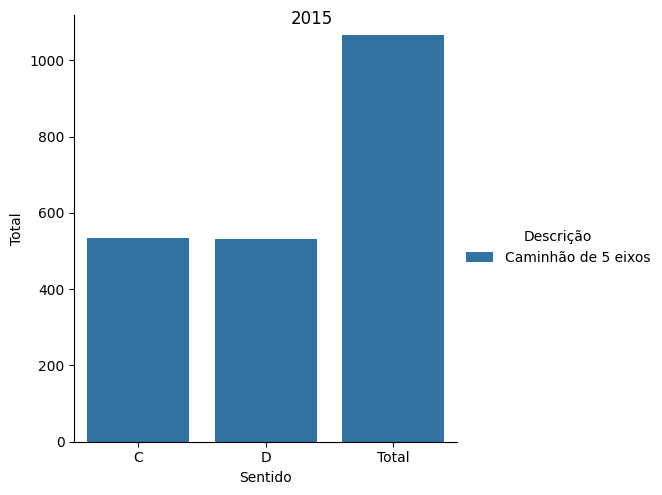

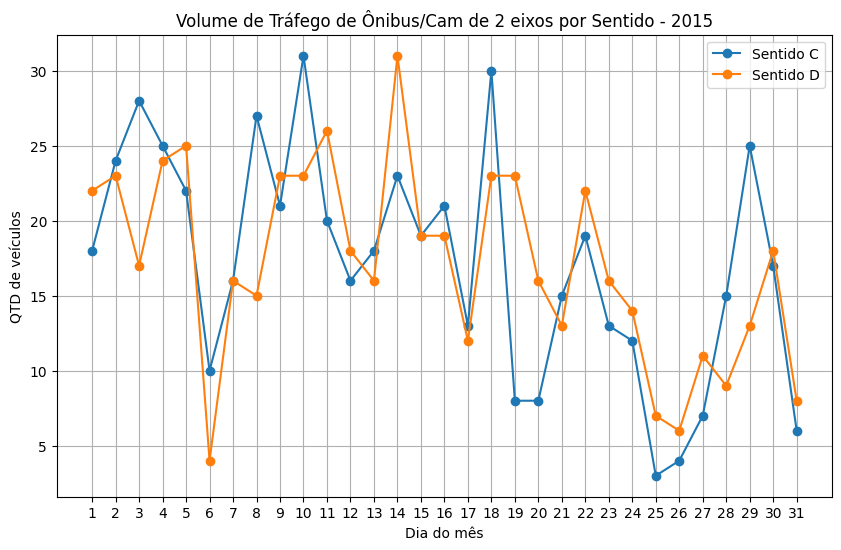


****************************
** CLASSE: E
(3, 36)

** SENTIDO C
Media no Sentido C = 17.548387096774192
Maximo = 34
Minimo = 4
Desvio Padrao = 6.9460534614171925
Mediana = 18.0

** SENTIDO D
Media no Sentido D = 24.516129032258064
Maximo = 42
Minimo = 3
Desvio Padrao = 9.694930393674284
Mediana = 22.0


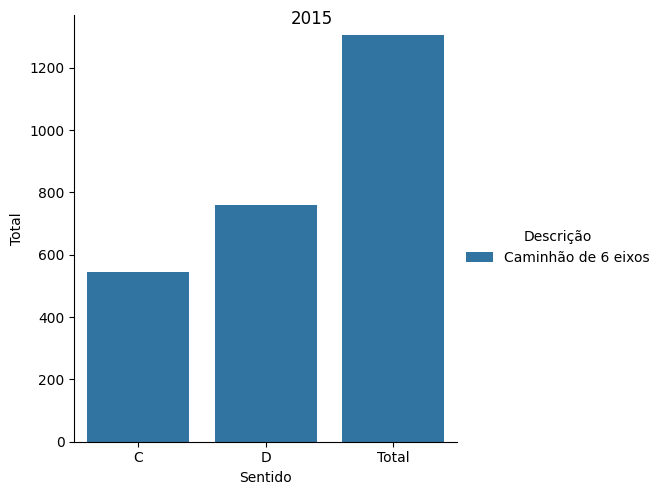

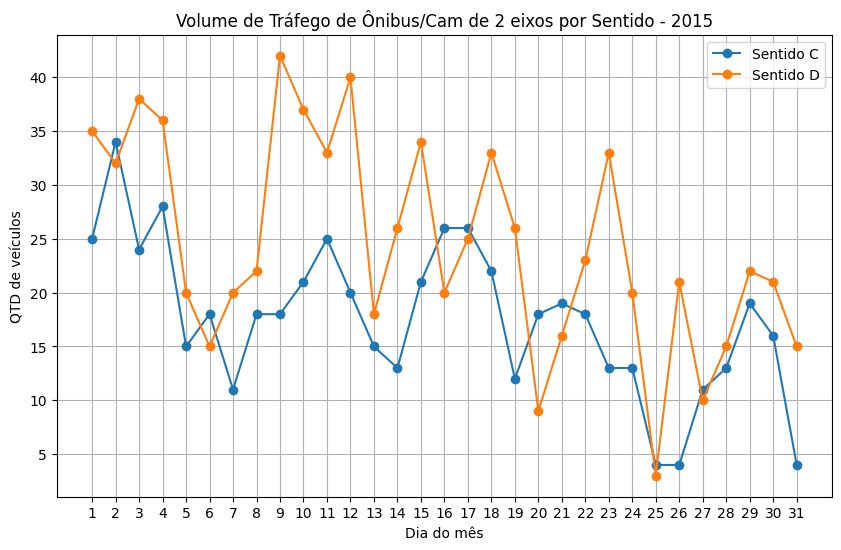


****************************
** CLASSE: F
(3, 36)

** SENTIDO C
Media no Sentido C = 7.967741935483871
Maximo = 19
Minimo = 1
Desvio Padrao = 4.035998265351316
Mediana = 7.0

** SENTIDO D
Media no Sentido D = 8.129032258064516
Maximo = 14
Minimo = 1
Desvio Padrao = 3.4336281524477865
Mediana = 8.0


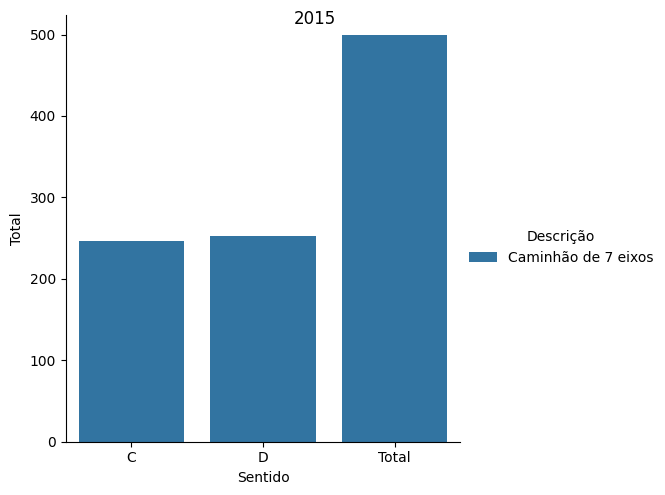

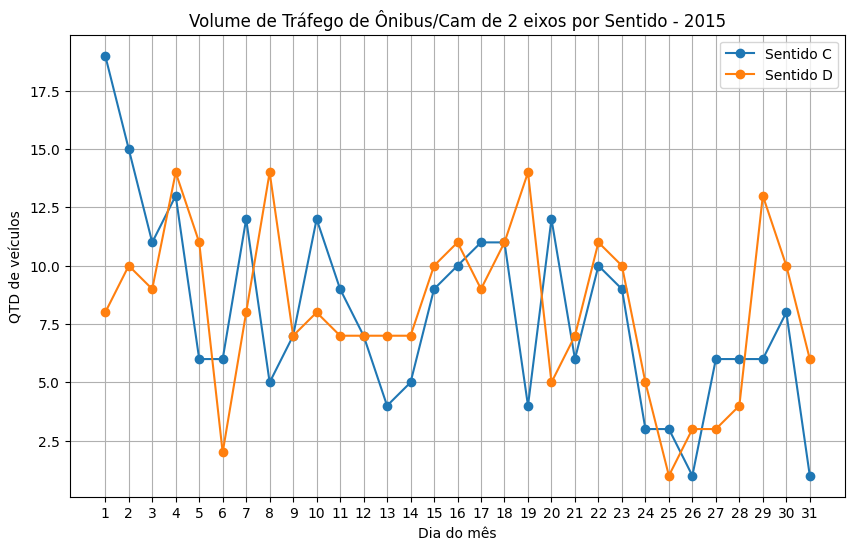


****************************
** CLASSE: G
(3, 36)

** SENTIDO C
Media no Sentido C = 0.1935483870967742
Maximo = 1
Minimo = 0
Desvio Padrao = 0.3950789907714804
Mediana = 0.0

** SENTIDO D
Media no Sentido D = 0.22580645161290322
Maximo = 1
Minimo = 0
Desvio Padrao = 0.4181123031230877
Mediana = 0.0


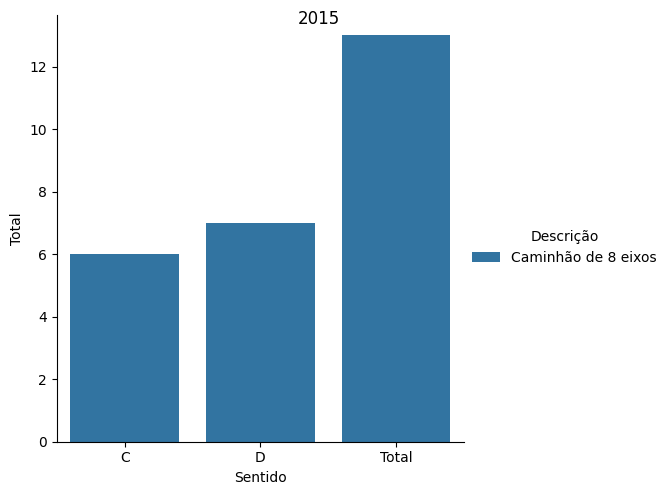

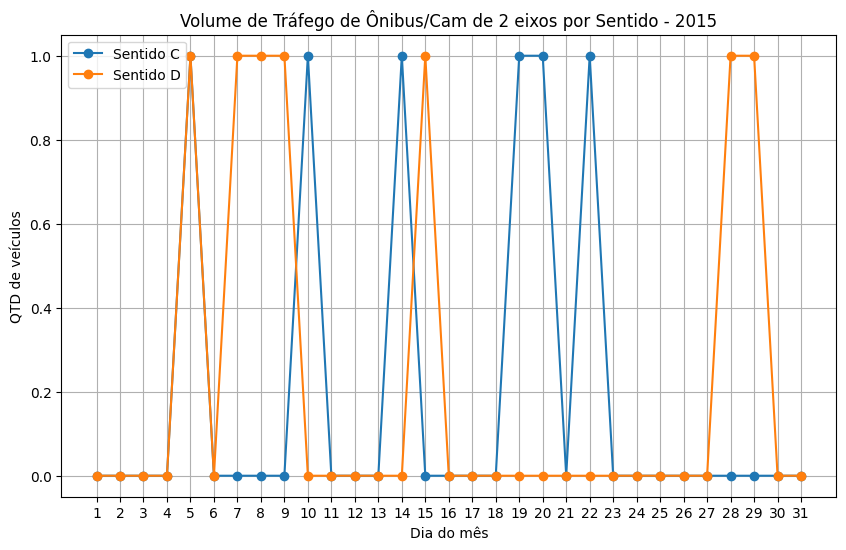


****************************
** CLASSE: H
(3, 36)

** SENTIDO C
Media no Sentido C = 12.35483870967742
Maximo = 25
Minimo = 1
Desvio Padrao = 5.325219287302298
Mediana = 13.0

** SENTIDO D
Media no Sentido D = 6.67741935483871
Maximo = 17
Minimo = 0
Desvio Padrao = 4.553531750716874
Mediana = 5.0


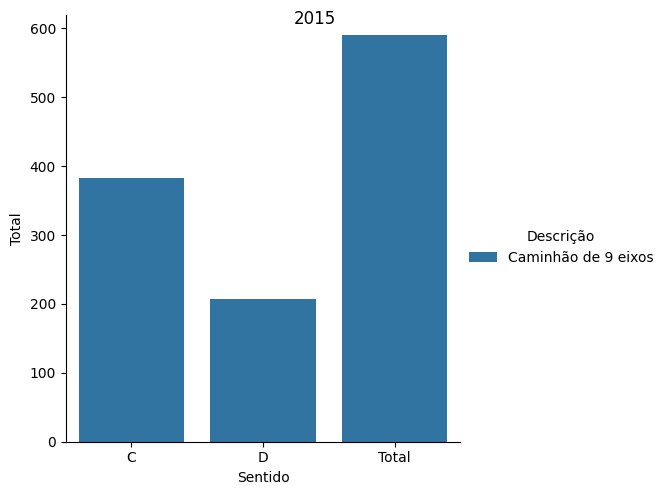

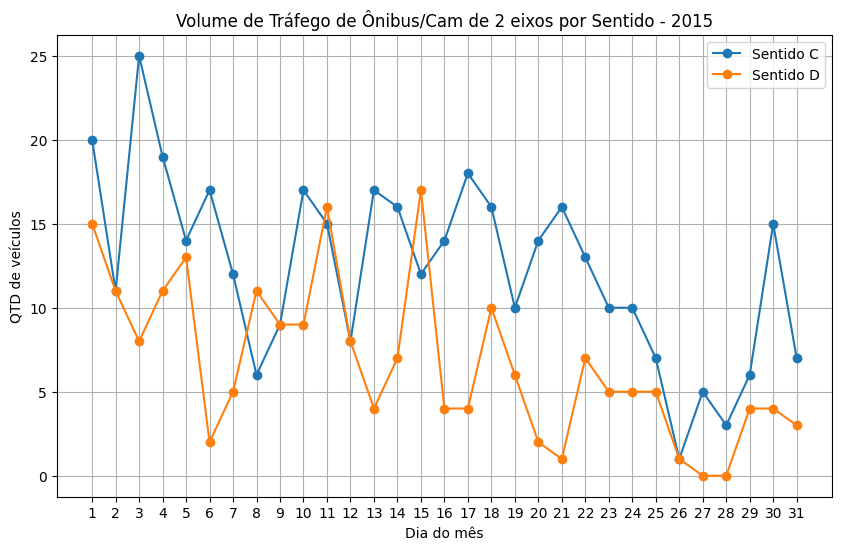


****************************
** CLASSE: I
(3, 36)

** SENTIDO C
Media no Sentido C = 2590.548387096774
Maximo = 5163
Minimo = 1696
Desvio Padrao = 697.1289897170036
Mediana = 2412.0

** SENTIDO D
Media no Sentido D = 2786.2258064516127
Maximo = 5462
Minimo = 1875
Desvio Padrao = 845.3089417934502
Mediana = 2626.0


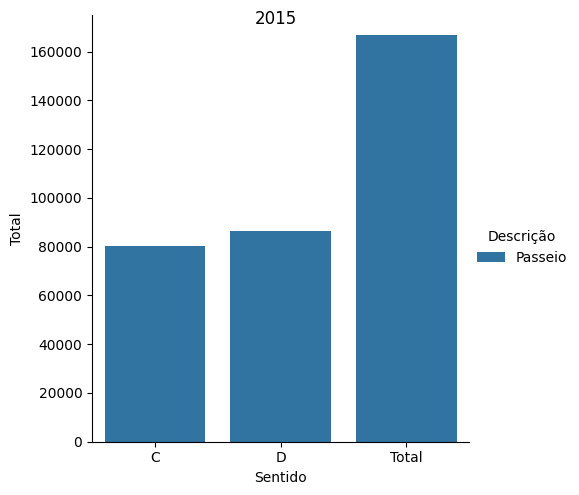

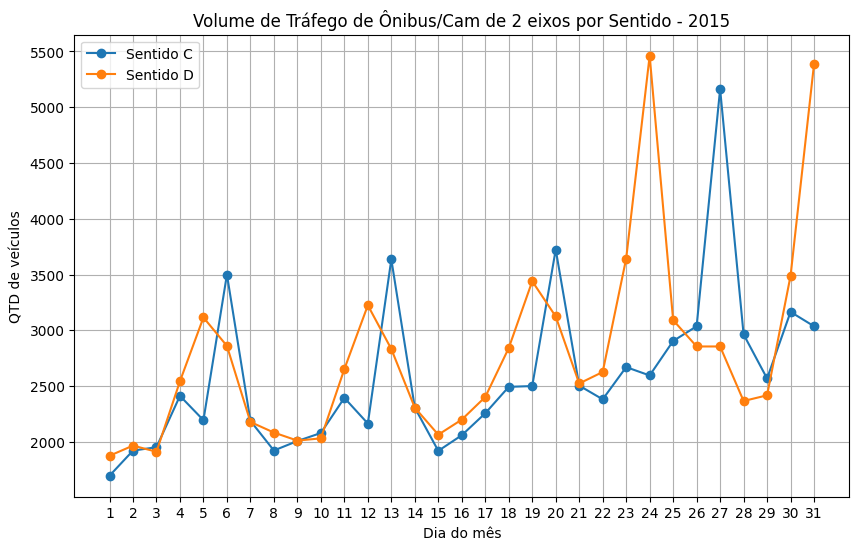


****************************
** CLASSE: J
(3, 36)

** SENTIDO C
Media no Sentido C = 589.1290322580645
Maximo = 927
Minimo = 423
Desvio Padrao = 142.24666035775476
Mediana = 533.0

** SENTIDO D
Media no Sentido D = 537.7096774193549
Maximo = 1125
Minimo = 360
Desvio Padrao = 177.38880088816518
Mediana = 512.0


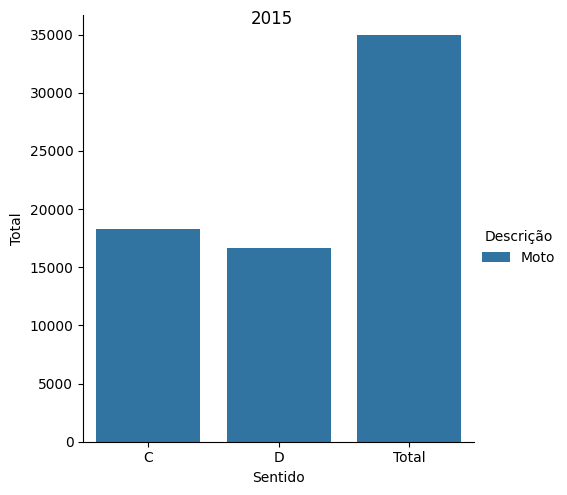

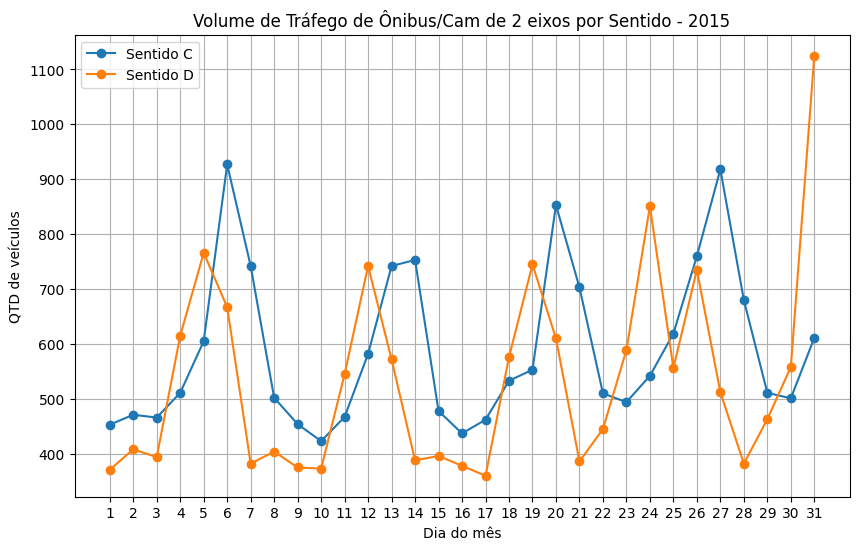


****************************
** CLASSE: L
(3, 36)

** SENTIDO C
Media no Sentido C = 144.1290322580645
Maximo = 182
Minimo = 90
Desvio Padrao = 21.25079419462212
Mediana = 143.0

** SENTIDO D
Media no Sentido D = 122.19354838709677
Maximo = 147
Minimo = 81
Desvio Padrao = 16.12535441938826
Mediana = 123.0


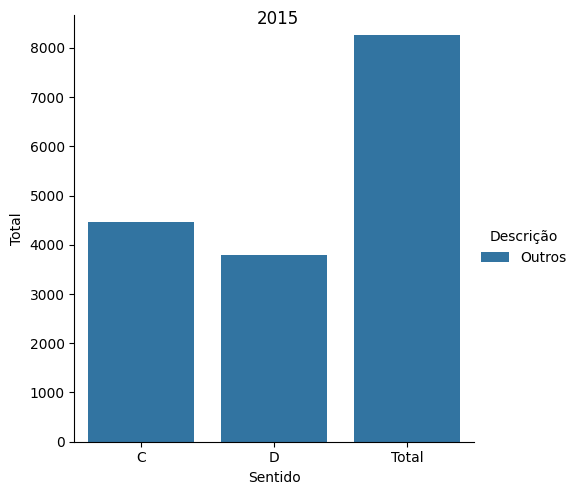

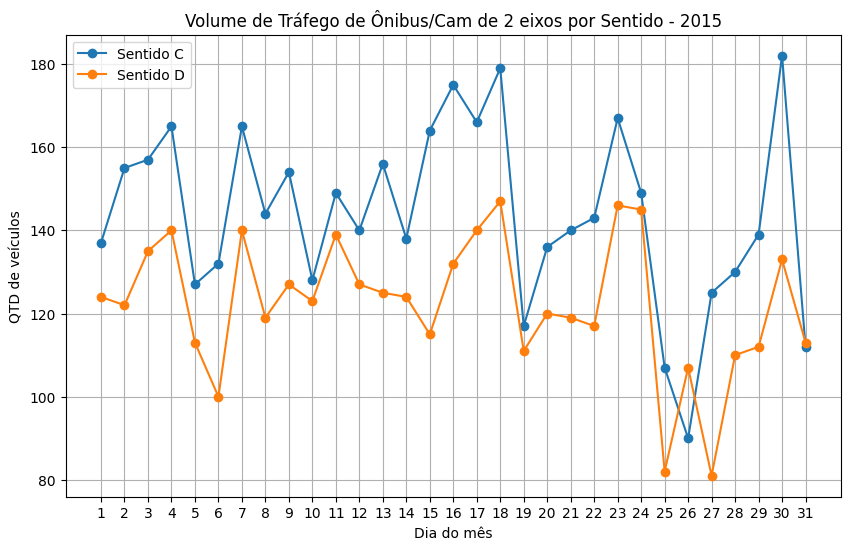


****************************
** ANO: 2016

****************************
** CLASSE: A
(3, 36)

** SENTIDO C
Media no Sentido C = 305.7741935483871
Maximo = 386
Minimo = 166
Desvio Padrao = 58.97003595453091
Mediana = 327.0

** SENTIDO D
Media no Sentido D = 319.9032258064516
Maximo = 411
Minimo = 121
Desvio Padrao = 76.51369467922157
Mediana = 350.0


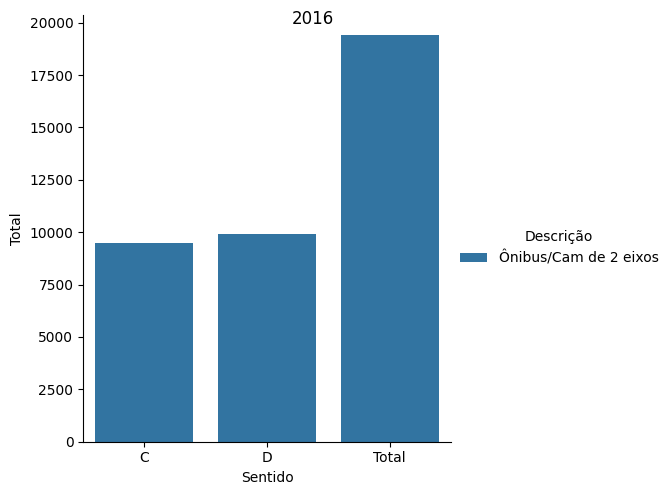

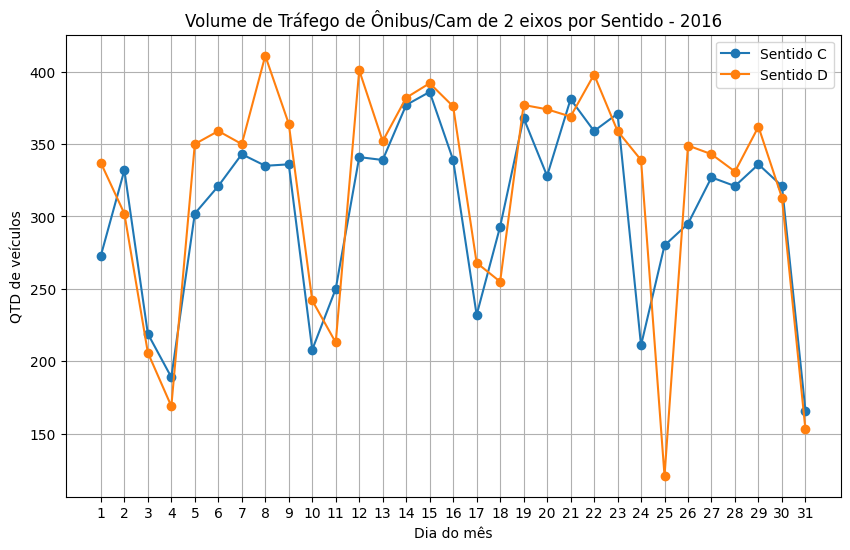


****************************
** CLASSE: B
(3, 36)

** SENTIDO C
Media no Sentido C = 104.16129032258064
Maximo = 149
Minimo = 40
Desvio Padrao = 28.139166567424507
Mediana = 110.0

** SENTIDO D
Media no Sentido D = 170.1290322580645
Maximo = 282
Minimo = 37
Desvio Padrao = 65.01202962404473
Mediana = 196.0


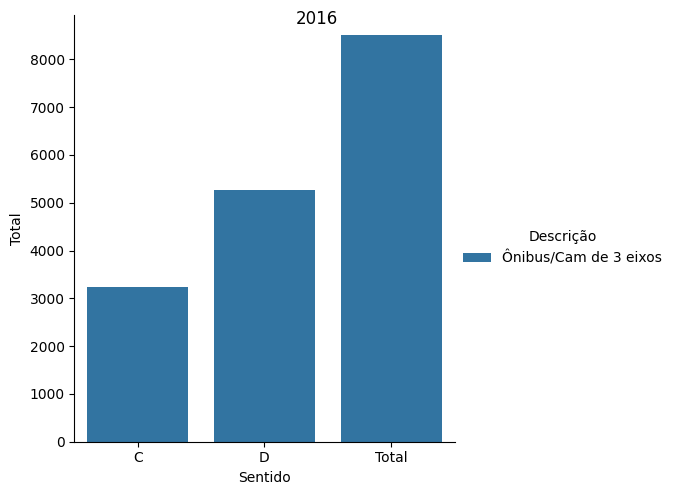

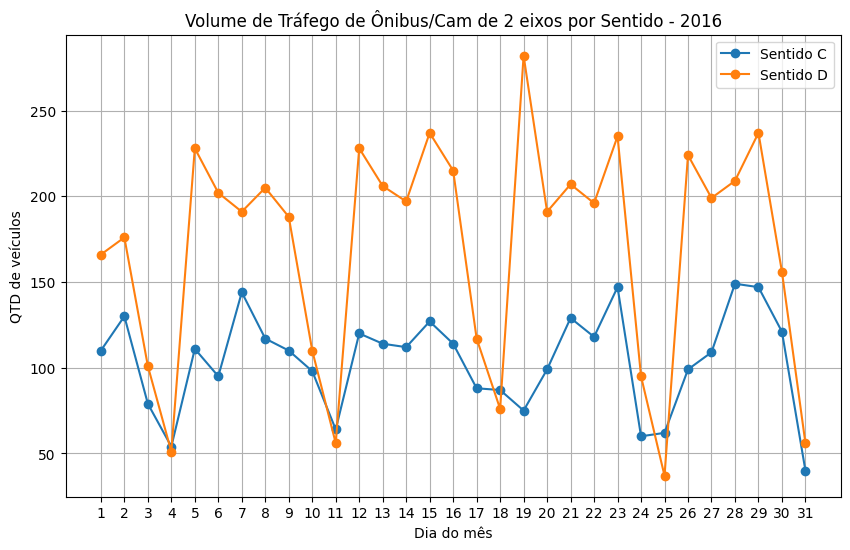


****************************
** CLASSE: C
(3, 36)

** SENTIDO C
Media no Sentido C = 18.93548387096774
Maximo = 30
Minimo = 7
Desvio Padrao = 6.2627185886568135
Mediana = 20.0

** SENTIDO D
Media no Sentido D = 27.774193548387096
Maximo = 58
Minimo = 2
Desvio Padrao = 11.754778513354596
Mediana = 28.0


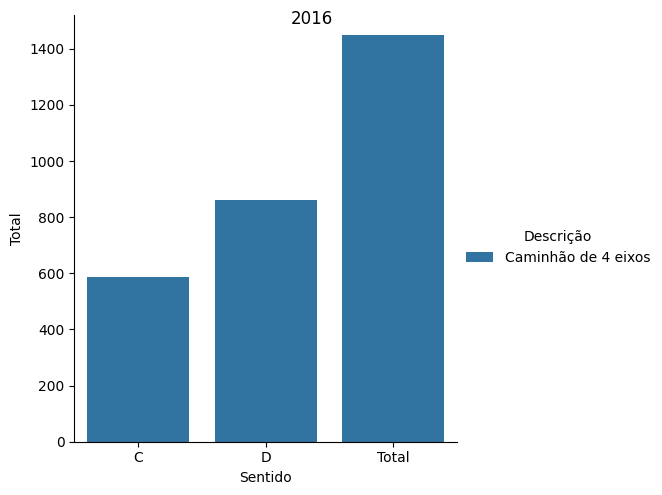

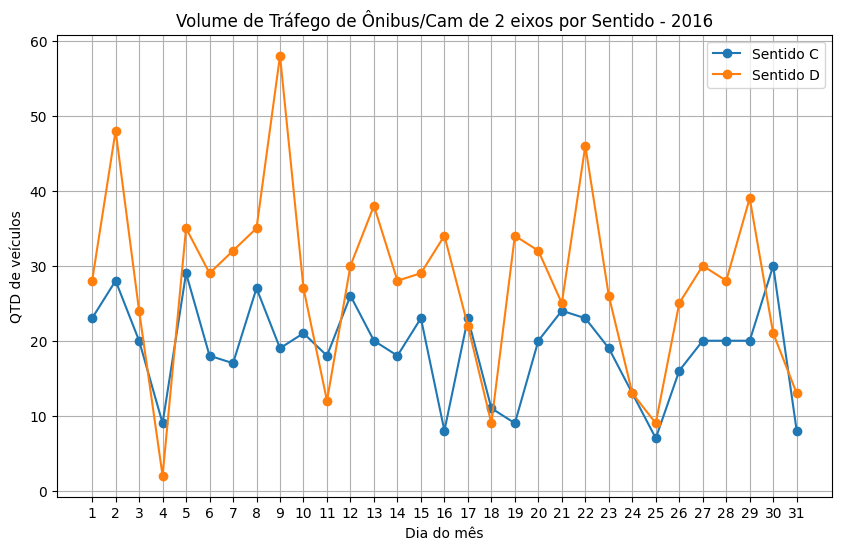


****************************
** CLASSE: D
(3, 36)

** SENTIDO C
Media no Sentido C = 8.258064516129032
Maximo = 15
Minimo = 1
Desvio Padrao = 3.6453040223268767
Mediana = 9.0

** SENTIDO D
Media no Sentido D = 13.96774193548387
Maximo = 27
Minimo = 3
Desvio Padrao = 4.9998959406445325
Mediana = 14.0


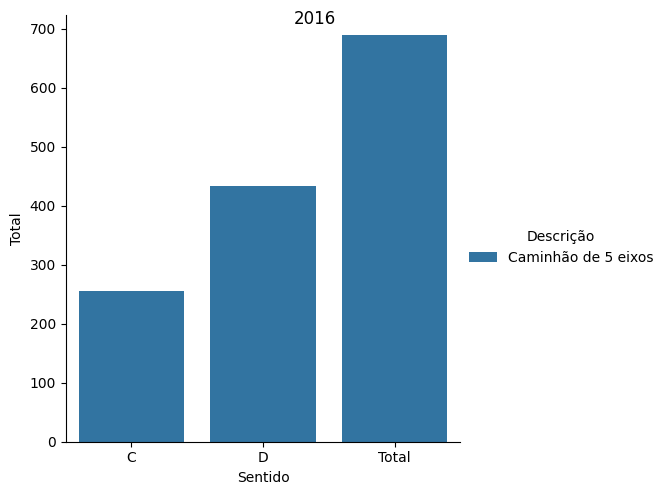

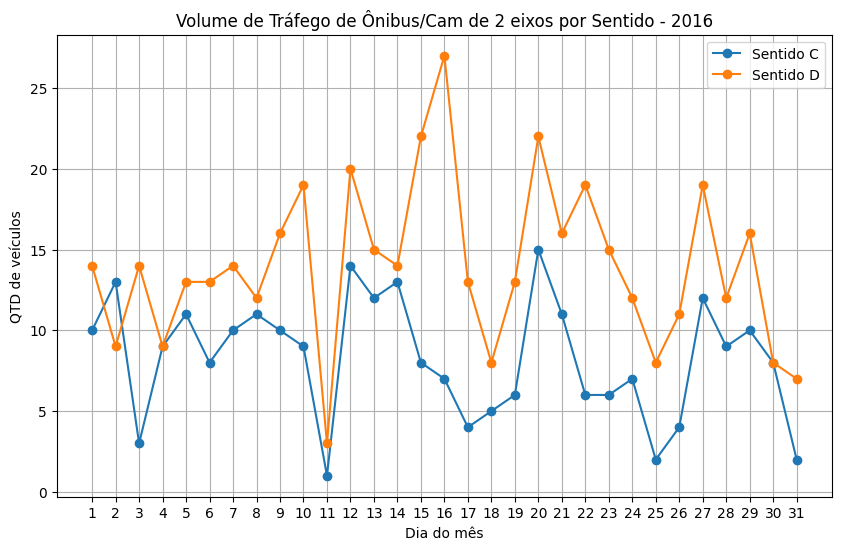


****************************
** CLASSE: E
(3, 36)

** SENTIDO C
Media no Sentido C = 7.838709677419355
Maximo = 17
Minimo = 1
Desvio Padrao = 4.07270041344171
Mediana = 7.0

** SENTIDO D
Media no Sentido D = 24.225806451612904
Maximo = 40
Minimo = 9
Desvio Padrao = 7.46479771961686
Mediana = 26.0


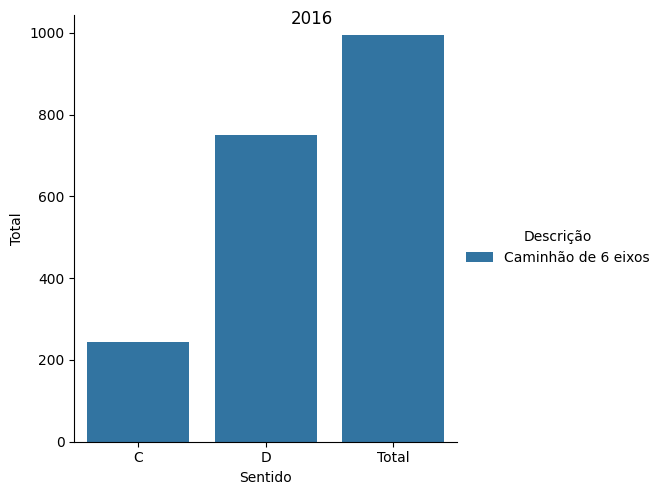

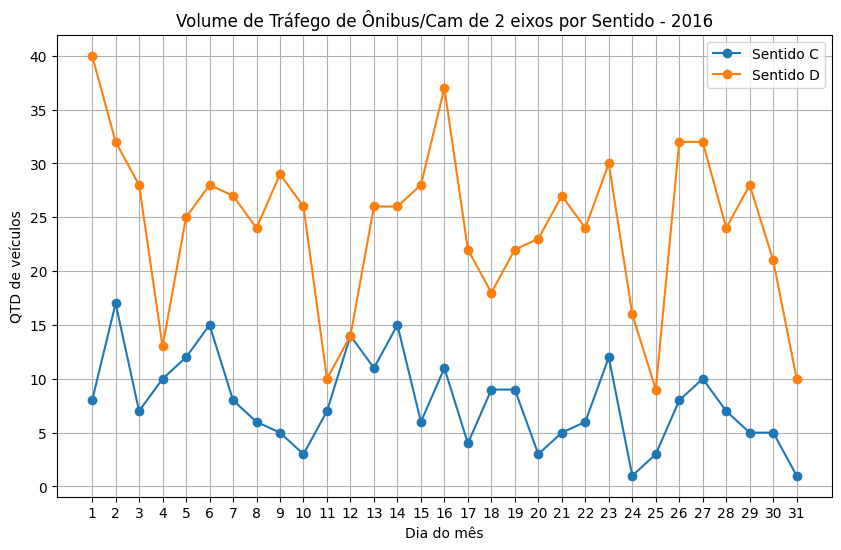


****************************
** CLASSE: F
(3, 36)

** SENTIDO C
Media no Sentido C = 2.967741935483871
Maximo = 8
Minimo = 0
Desvio Padrao = 2.055423525428902
Mediana = 3.0

** SENTIDO D
Media no Sentido D = 8.806451612903226
Maximo = 19
Minimo = 0
Desvio Padrao = 4.8020113718524895
Mediana = 9.0


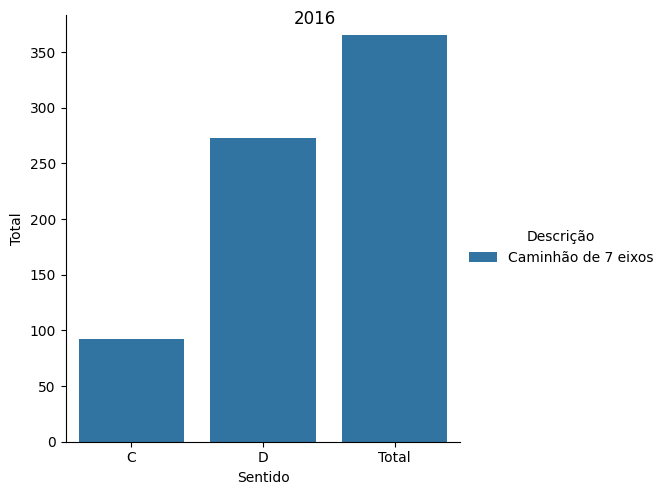

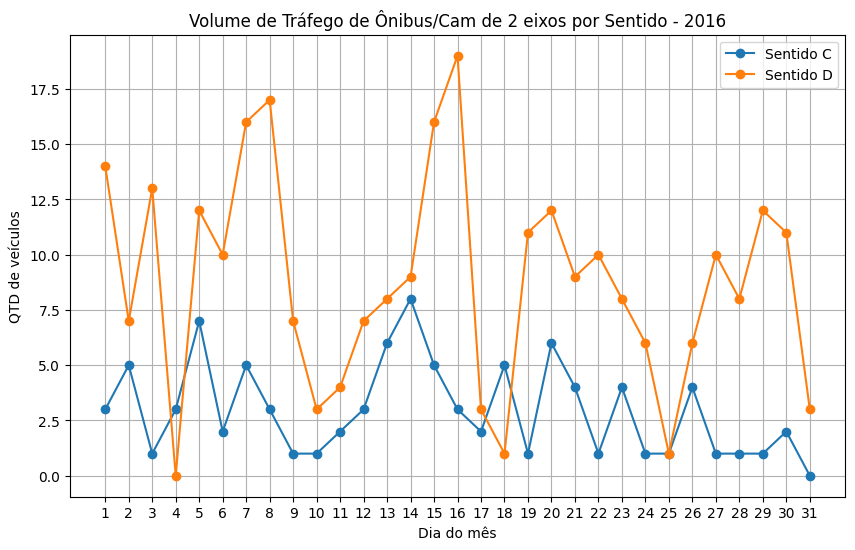


****************************
** CLASSE: G
(3, 36)

** SENTIDO C
Media no Sentido C = 0.22580645161290322
Maximo = 2
Minimo = 0
Desvio Padrao = 0.48921777058397103
Mediana = 0.0

** SENTIDO D
Media no Sentido D = 0.12903225806451613
Maximo = 1
Minimo = 0
Desvio Padrao = 0.33523564017462143
Mediana = 0.0


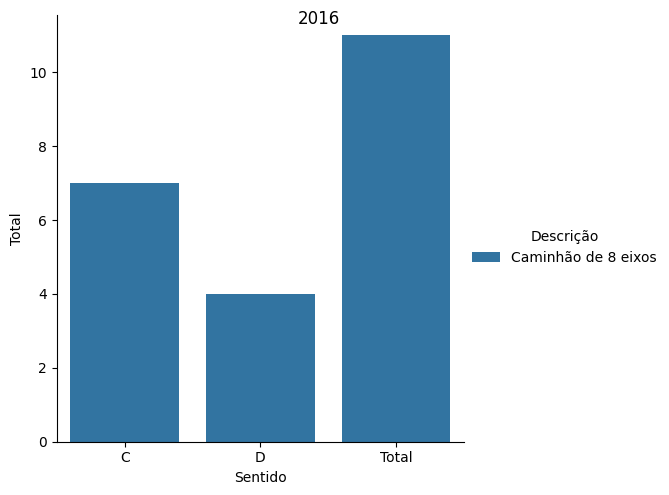

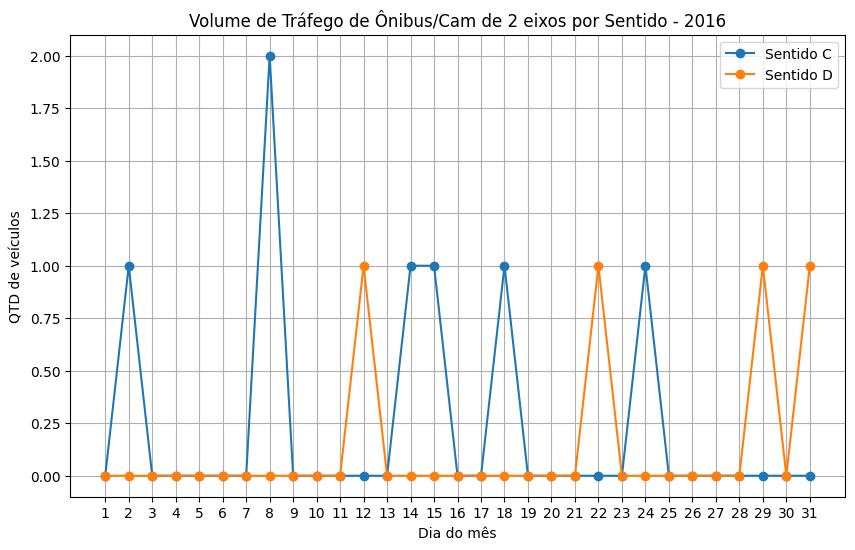


****************************
** CLASSE: H
(3, 36)

** SENTIDO C
Media no Sentido C = 2.2580645161290325
Maximo = 7
Minimo = 0
Desvio Padrao = 1.740740330739618
Mediana = 2.0

** SENTIDO D
Media no Sentido D = 7.967741935483871
Maximo = 15
Minimo = 0
Desvio Padrao = 4.11514802750052
Mediana = 8.0


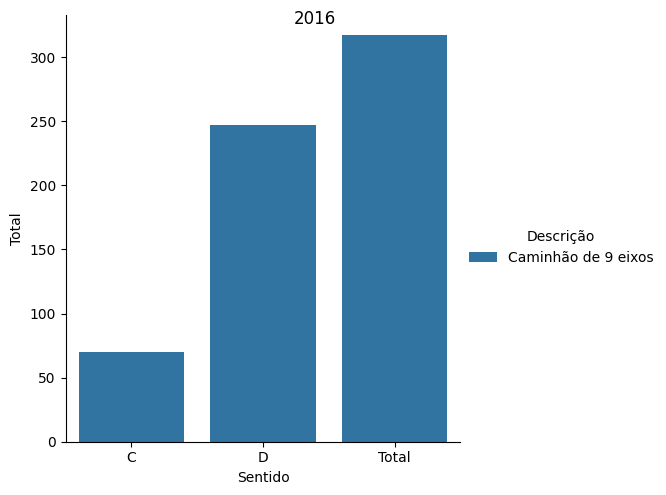

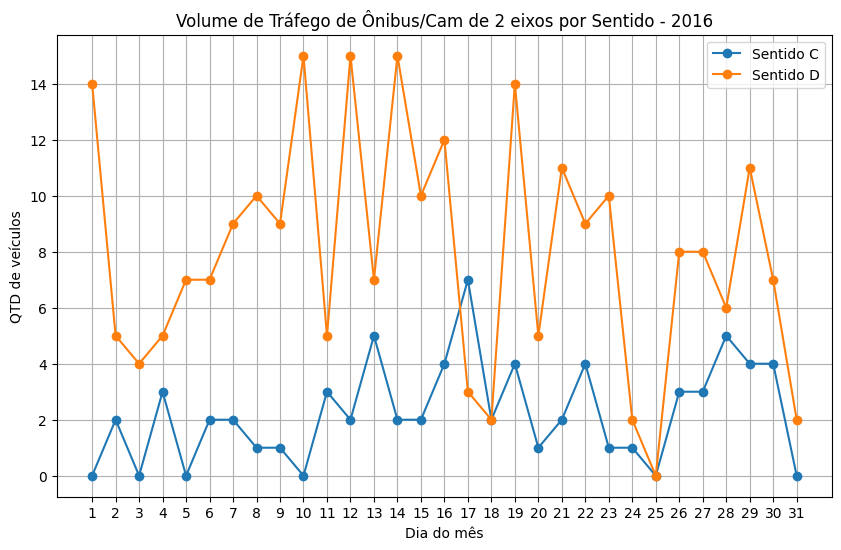


****************************
** CLASSE: I
(3, 36)

** SENTIDO C
Media no Sentido C = 2563.516129032258
Maximo = 4280
Minimo = 1758
Desvio Padrao = 583.9210547042735
Mediana = 2350.0

** SENTIDO D
Media no Sentido D = 2792.967741935484
Maximo = 4682
Minimo = 1974
Desvio Padrao = 749.01063706952
Mediana = 2560.0


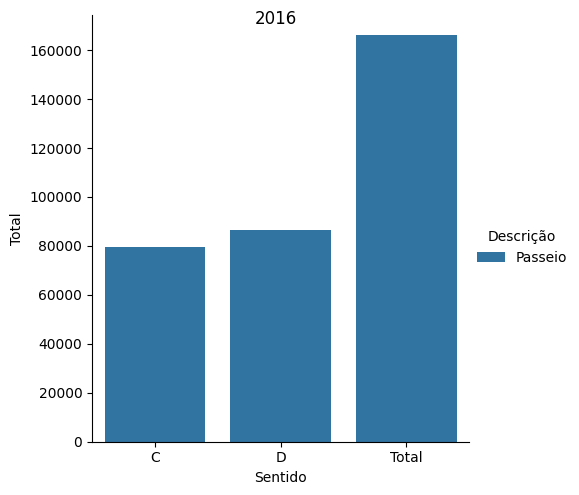

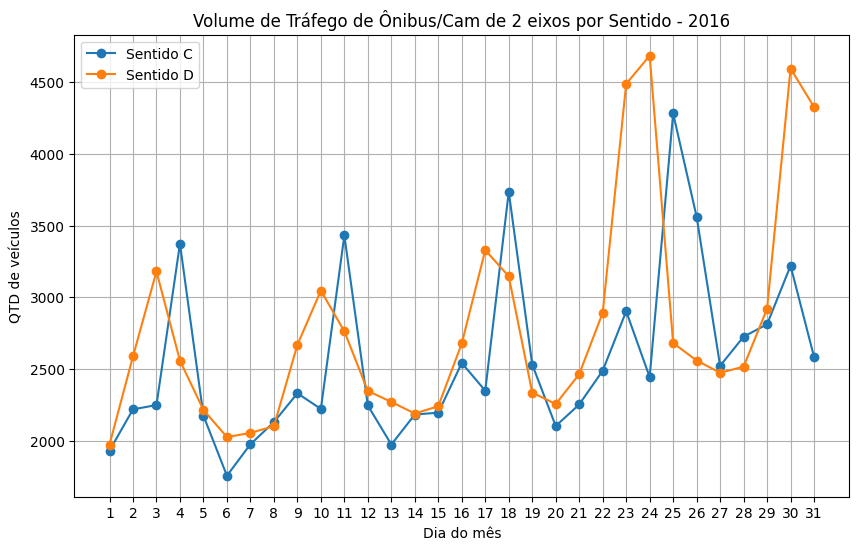


****************************
** CLASSE: J
(3, 36)

** SENTIDO C
Media no Sentido C = 565.258064516129
Maximo = 815
Minimo = 444
Desvio Padrao = 110.22263913053008
Mediana = 512.0

** SENTIDO D
Media no Sentido D = 479.03225806451616
Maximo = 907
Minimo = 328
Desvio Padrao = 155.10963528877653
Mediana = 410.0


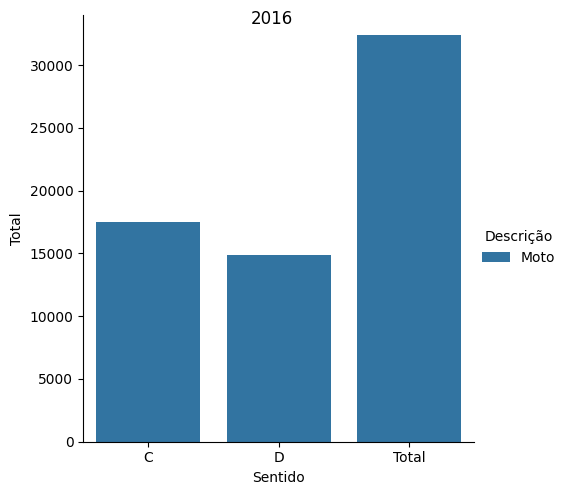

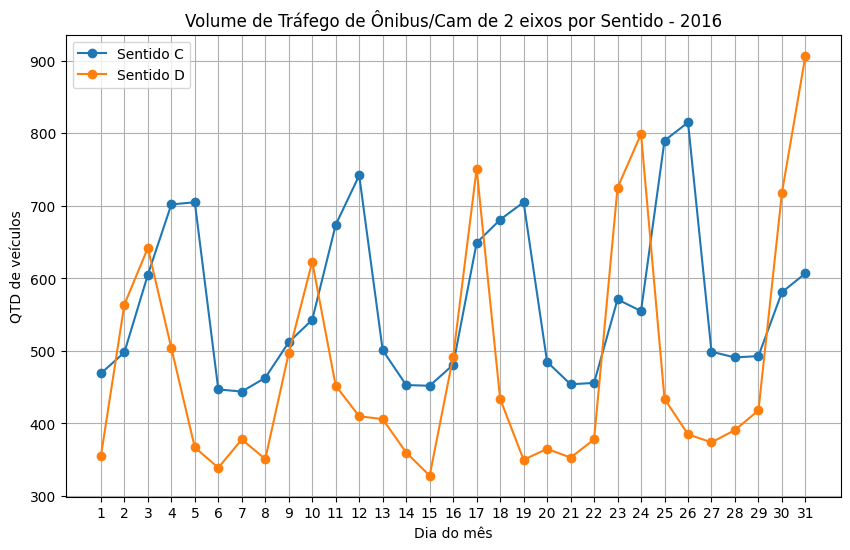


****************************
** CLASSE: L
(3, 36)

** SENTIDO C
Media no Sentido C = 238.03225806451613
Maximo = 307
Minimo = 121
Desvio Padrao = 40.099460112983536
Mediana = 247.0

** SENTIDO D
Media no Sentido D = 118.41935483870968
Maximo = 150
Minimo = 86
Desvio Padrao = 17.185466841244345
Mediana = 120.0


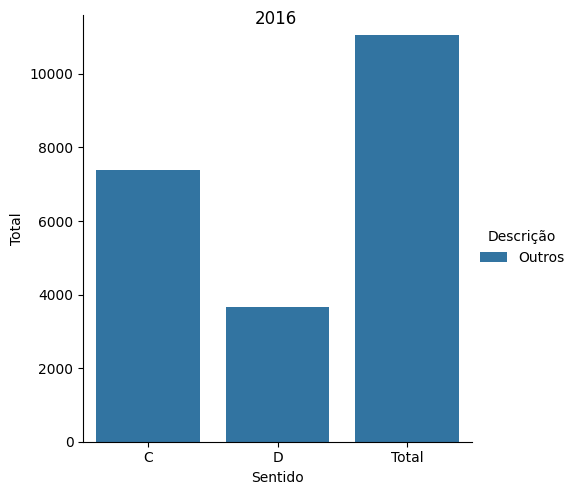

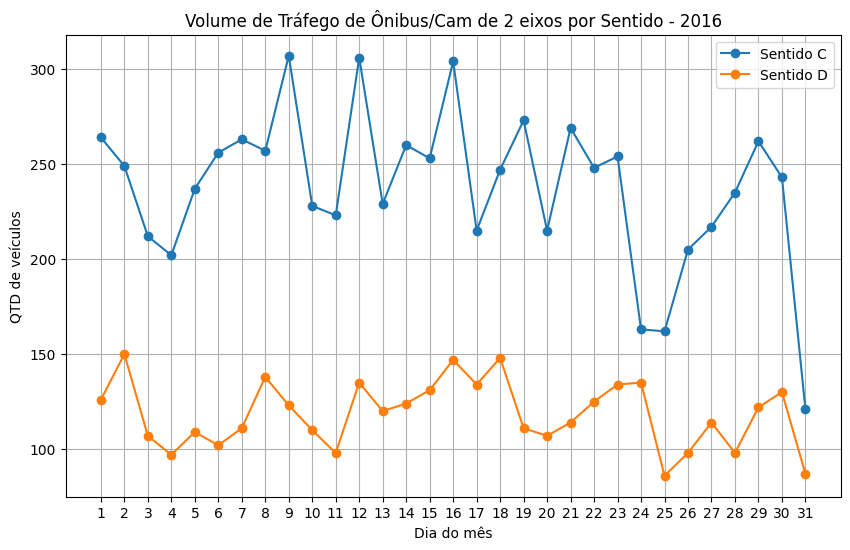


****************************
** ANO: 2017

****************************
** CLASSE: A
(3, 36)

** SENTIDO C
Media no Sentido C = 222.8709677419355
Maximo = 313
Minimo = 106
Desvio Padrao = 56.915750943961804
Mediana = 228.0

** SENTIDO D
Media no Sentido D = 307.16129032258067
Maximo = 456
Minimo = 79
Desvio Padrao = 85.34072006703994
Mediana = 326.0


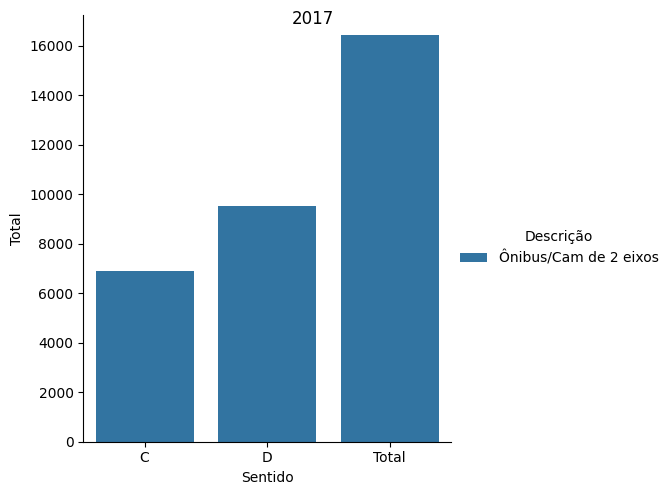

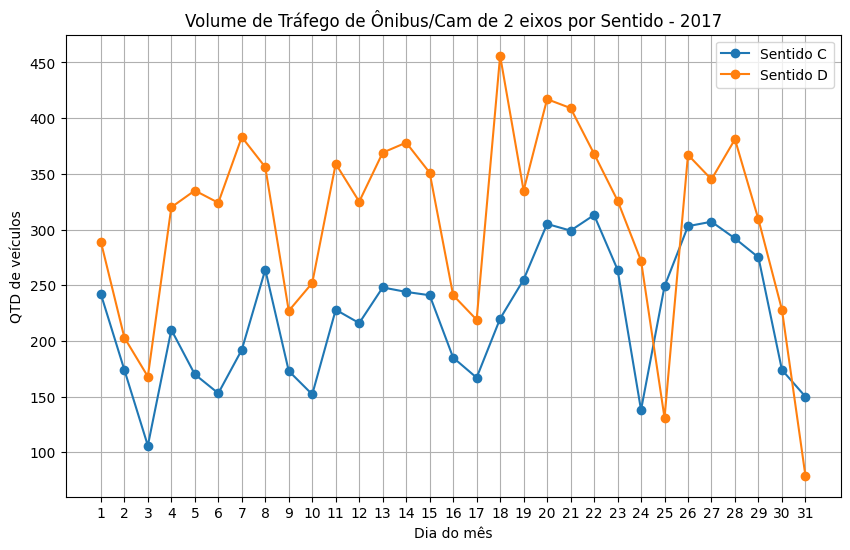


****************************
** CLASSE: B
(3, 36)

** SENTIDO C
Media no Sentido C = 104.09677419354838
Maximo = 150
Minimo = 26
Desvio Padrao = 32.02857075226559
Mediana = 108.0

** SENTIDO D
Media no Sentido D = 164.70967741935485
Maximo = 267
Minimo = 22
Desvio Padrao = 70.35036444337226
Mediana = 190.0


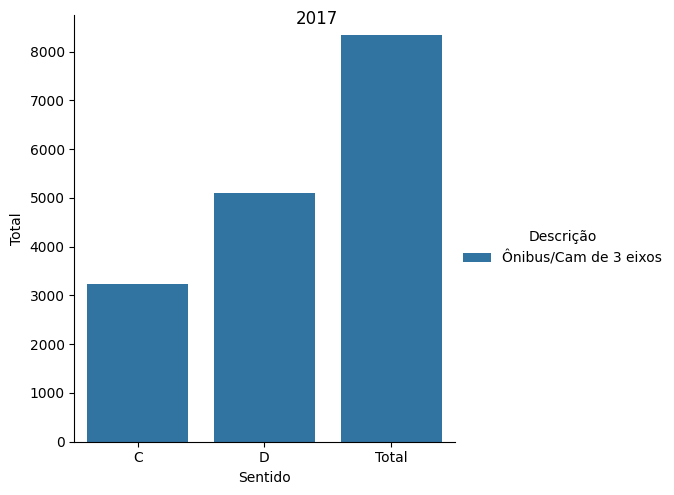

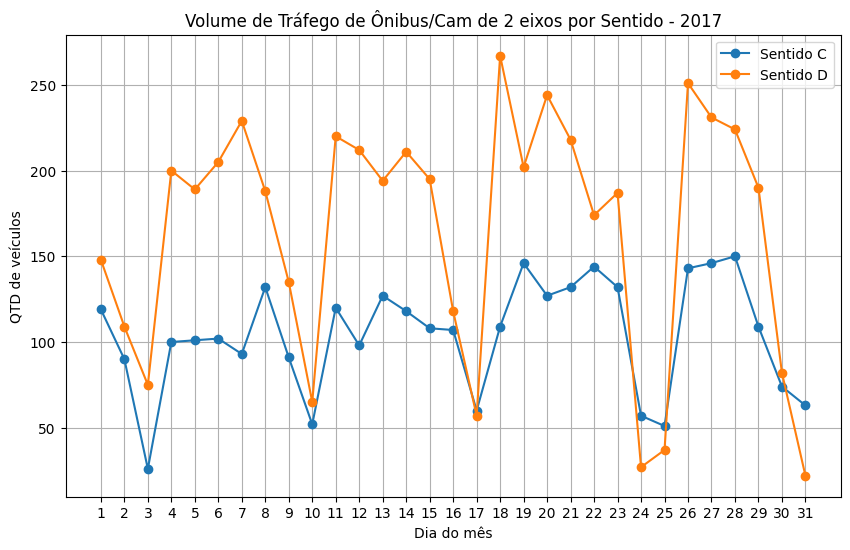


****************************
** CLASSE: C
(3, 36)

** SENTIDO C
Media no Sentido C = 11.03225806451613
Maximo = 23
Minimo = 2
Desvio Padrao = 5.102079721230334
Mediana = 11.0

** SENTIDO D
Media no Sentido D = 28.838709677419356
Maximo = 47
Minimo = 3
Desvio Padrao = 12.355217715065992
Mediana = 33.0


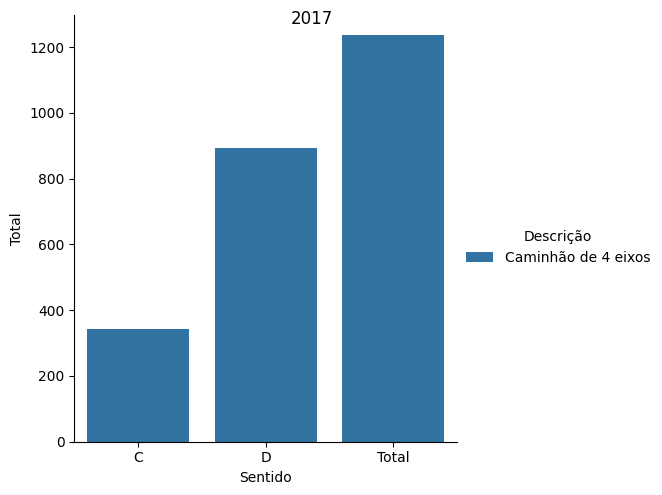

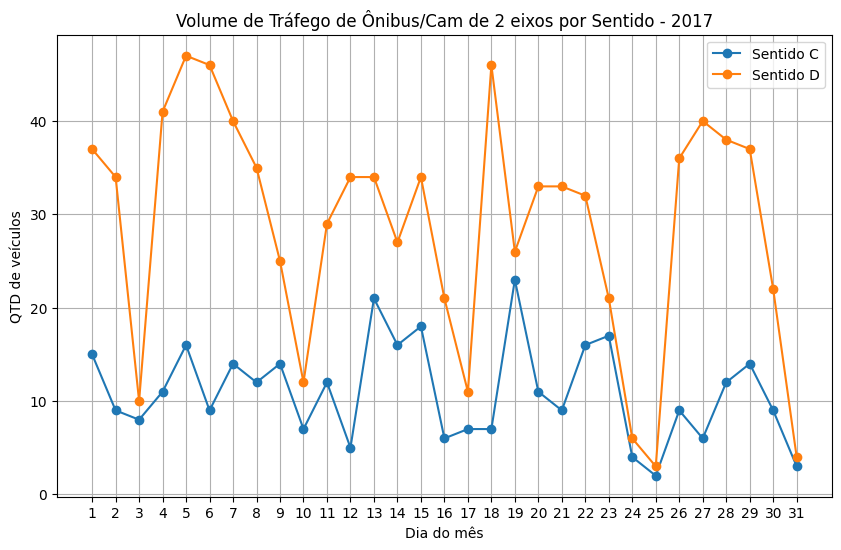


****************************
** CLASSE: D
(3, 36)

** SENTIDO C
Media no Sentido C = 5.870967741935484
Maximo = 12
Minimo = 1
Desvio Padrao = 2.624228740569386
Mediana = 5.0

** SENTIDO D
Media no Sentido D = 15.225806451612904
Maximo = 24
Minimo = 2
Desvio Padrao = 5.7849062636025534
Mediana = 15.0


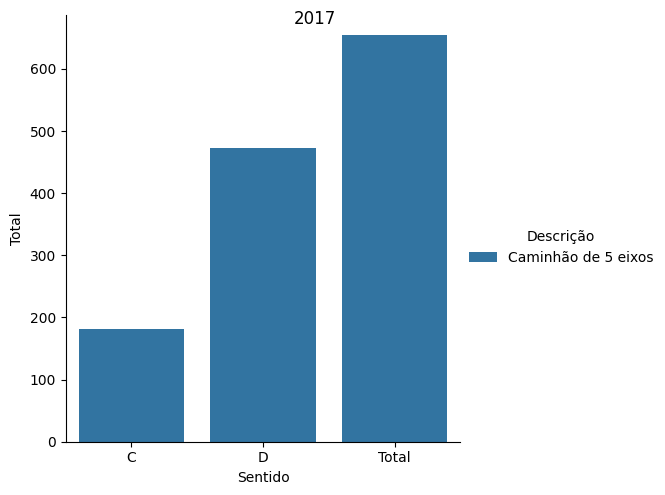

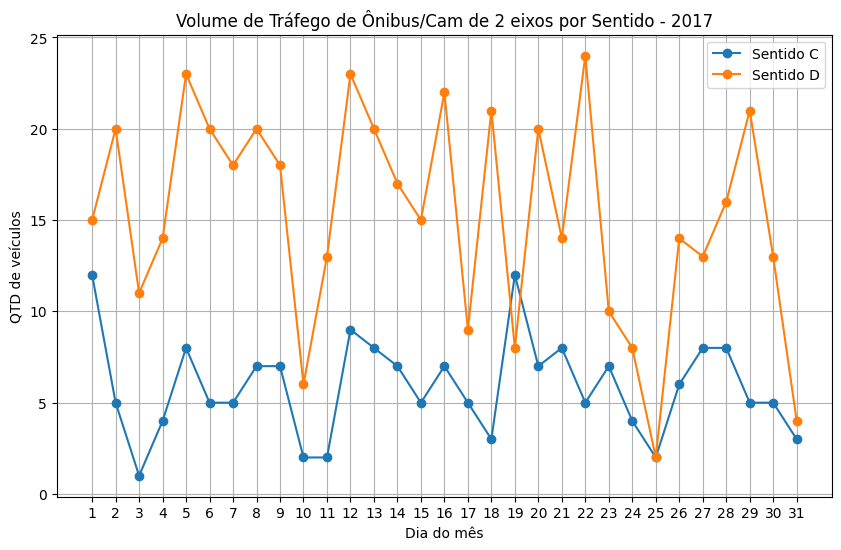


****************************
** CLASSE: E
(3, 36)

** SENTIDO C
Media no Sentido C = 6.741935483870968
Maximo = 14
Minimo = 1
Desvio Padrao = 2.972646718324716
Mediana = 7.0

** SENTIDO D
Media no Sentido D = 30.193548387096776
Maximo = 61
Minimo = 3
Desvio Padrao = 11.952646770832972
Mediana = 32.0


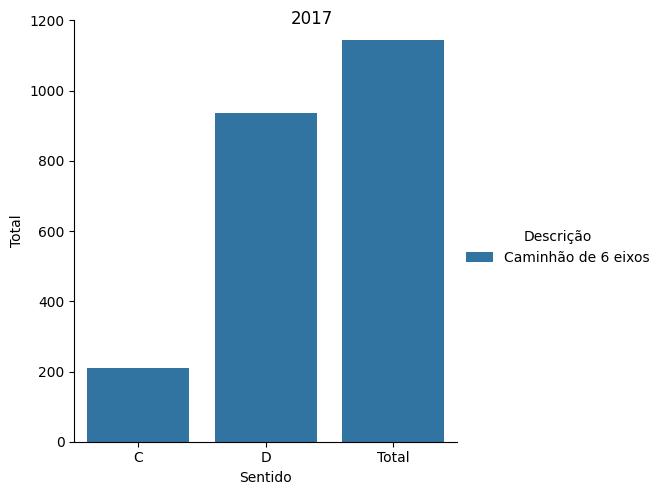

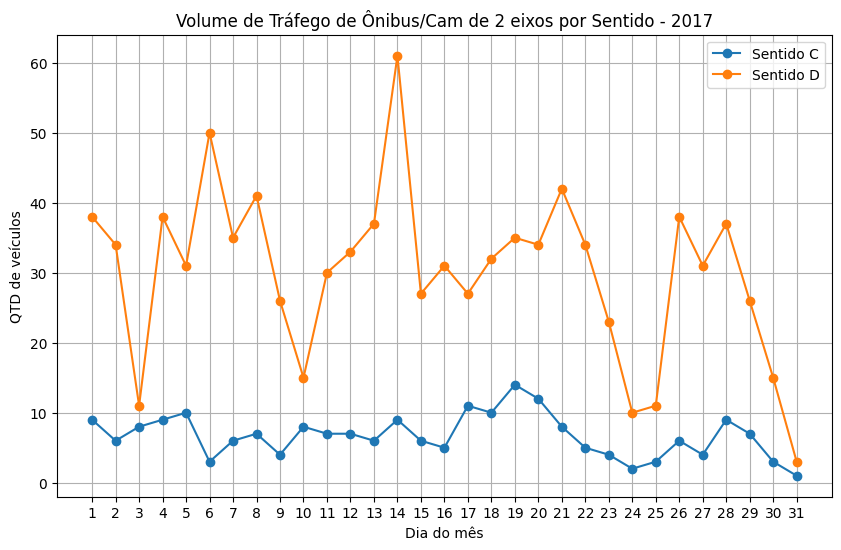


****************************
** CLASSE: F
(3, 36)

** SENTIDO C
Media no Sentido C = 4.129032258064516
Maximo = 9
Minimo = 0
Desvio Padrao = 2.29644796523325
Mediana = 4.0

** SENTIDO D
Media no Sentido D = 7.741935483870968
Maximo = 22
Minimo = 0
Desvio Padrao = 4.606921454307665
Mediana = 8.0


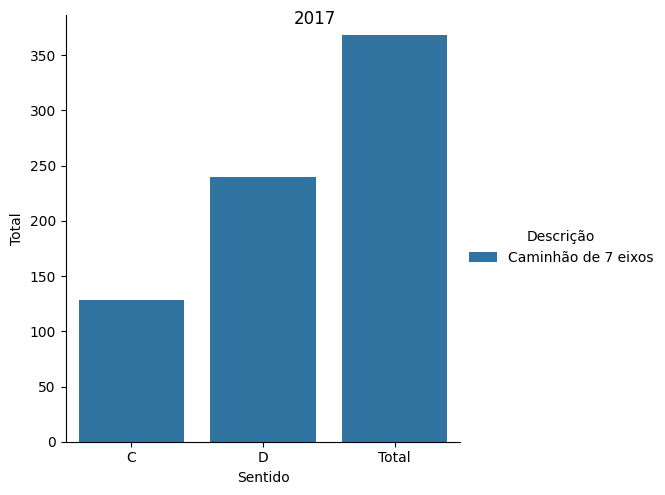

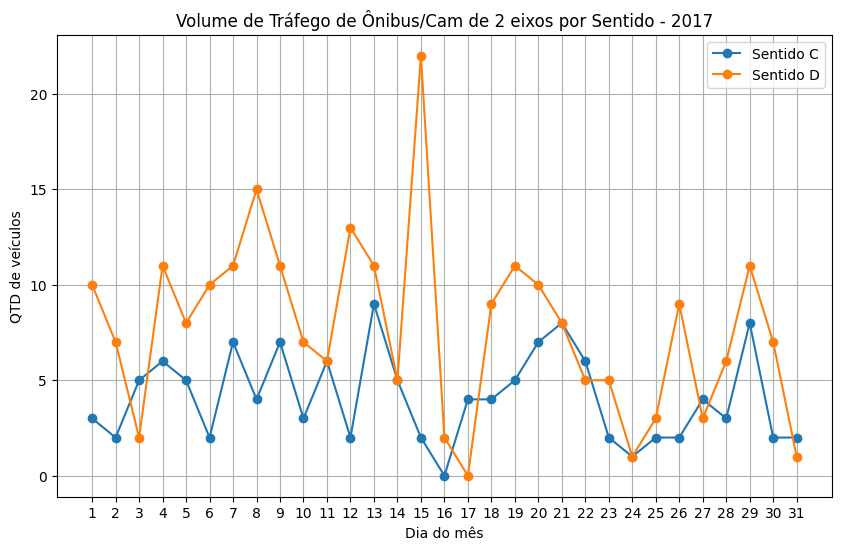


****************************
** CLASSE: G
(3, 36)

** SENTIDO C
Media no Sentido C = 0.16129032258064516
Maximo = 1
Minimo = 0
Desvio Padrao = 0.3677985242255284
Mediana = 0.0

** SENTIDO D
Media no Sentido D = 0.0967741935483871
Maximo = 1
Minimo = 0
Desvio Padrao = 0.29565004483586066
Mediana = 0.0


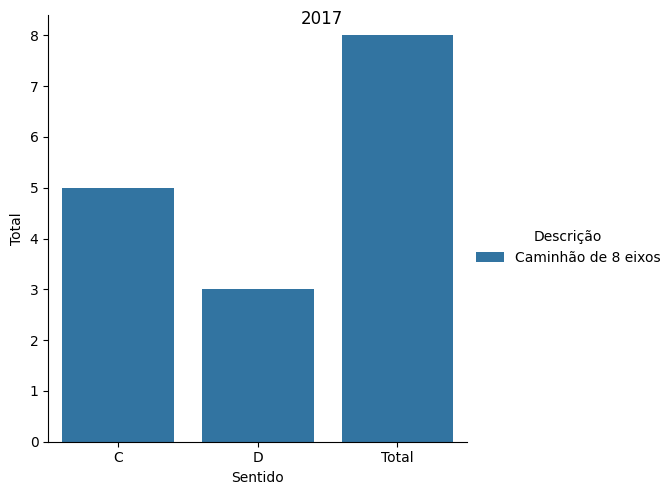

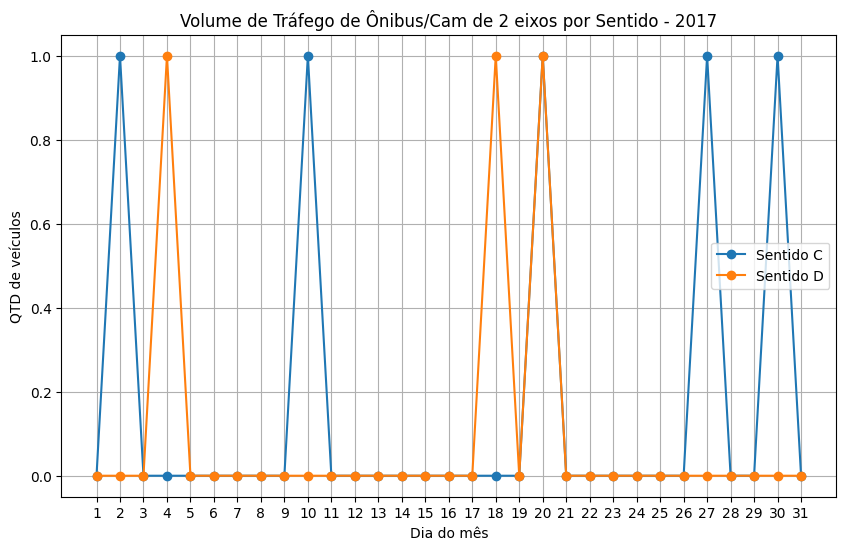


****************************
** CLASSE: H
(3, 36)

** SENTIDO C
Media no Sentido C = 6.967741935483871
Maximo = 16
Minimo = 1
Desvio Padrao = 3.847780013225405
Mediana = 7.0

** SENTIDO D
Media no Sentido D = 5.0
Maximo = 14
Minimo = 0
Desvio Padrao = 3.672039074920355
Mediana = 5.0


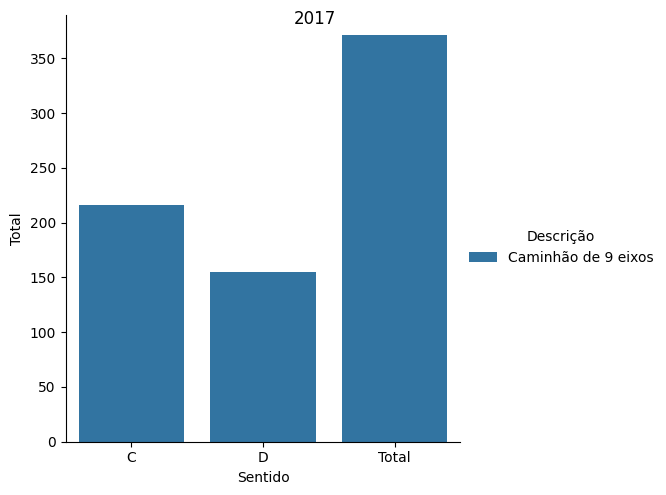

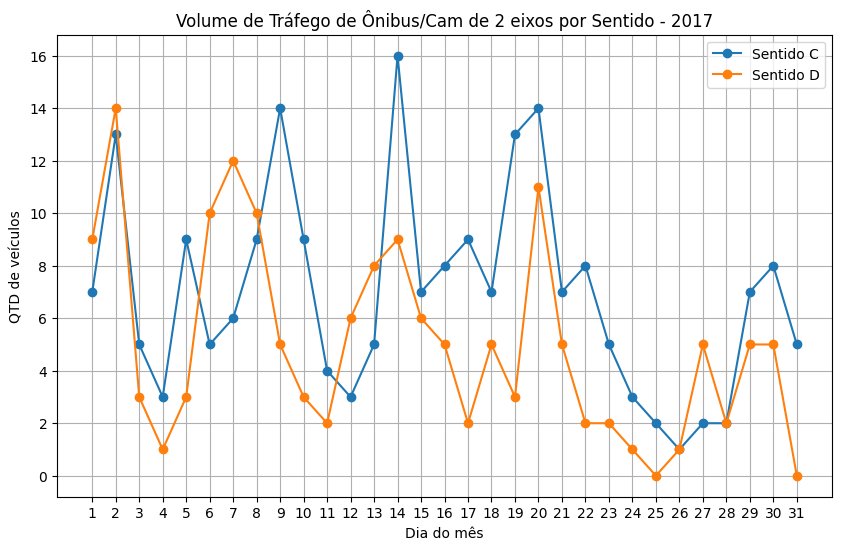


****************************
** CLASSE: I
(3, 36)

** SENTIDO C
Media no Sentido C = 2680.8387096774195
Maximo = 4654
Minimo = 1989
Desvio Padrao = 578.0180874932054
Mediana = 2518.0

** SENTIDO D
Media no Sentido D = 2968.8064516129034
Maximo = 5364
Minimo = 2097
Desvio Padrao = 785.7296760523587
Mediana = 2772.0


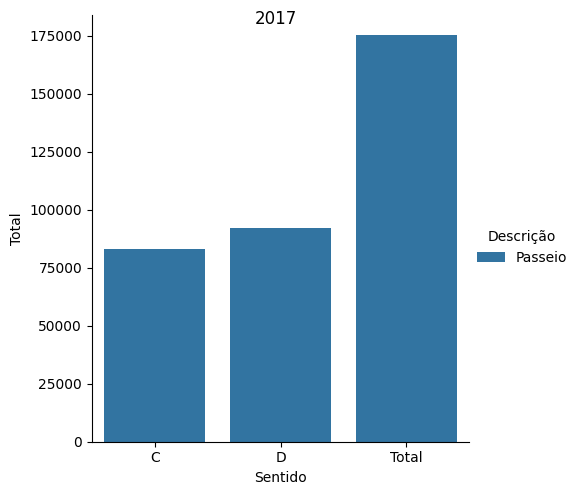

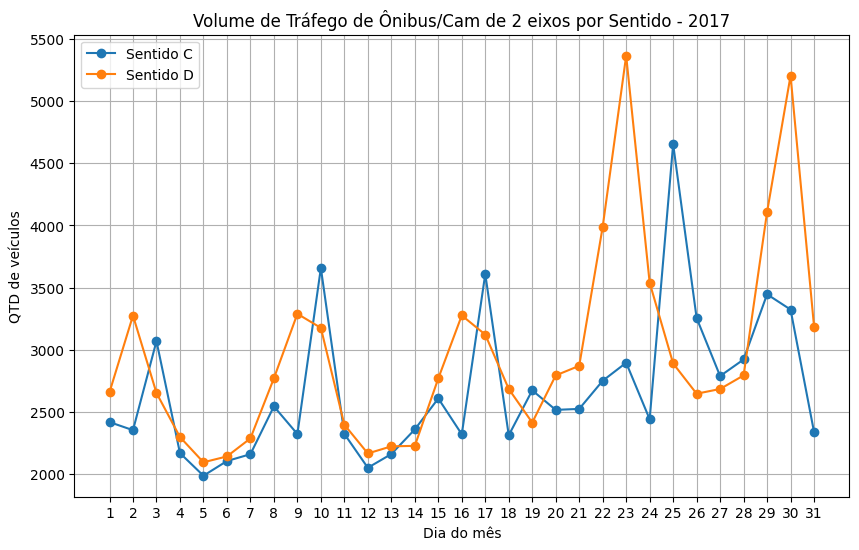


****************************
** CLASSE: J
(3, 36)

** SENTIDO C
Media no Sentido C = 545.741935483871
Maximo = 860
Minimo = 439
Desvio Padrao = 98.16114721243001
Mediana = 502.0

** SENTIDO D
Media no Sentido D = 615.8387096774194
Maximo = 1076
Minimo = 440
Desvio Padrao = 164.17125141718162
Mediana = 516.0


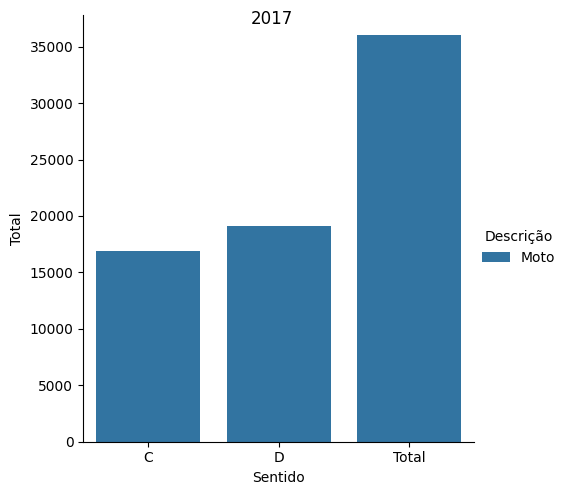

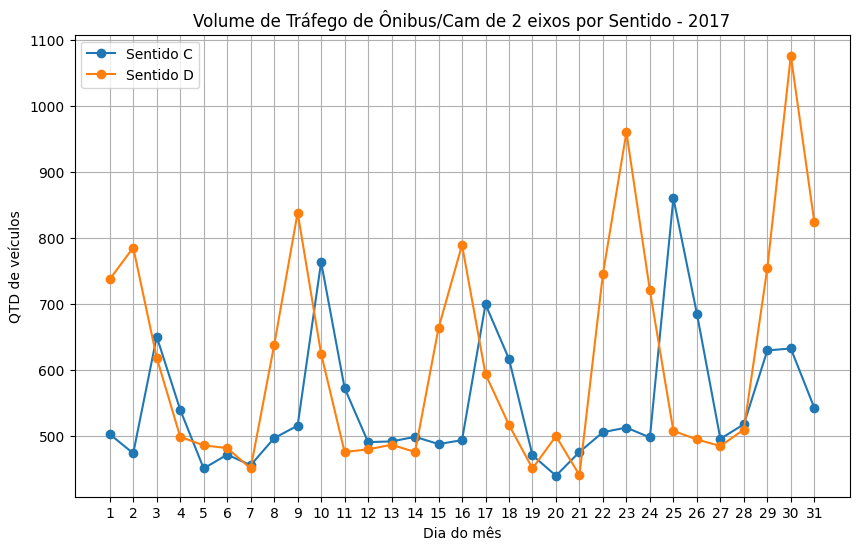


****************************
** CLASSE: L
(3, 36)

** SENTIDO C
Media no Sentido C = 110.48387096774194
Maximo = 157
Minimo = 73
Desvio Padrao = 19.19655709679336
Mediana = 105.0

** SENTIDO D
Media no Sentido D = 119.80645161290323
Maximo = 160
Minimo = 58
Desvio Padrao = 23.37274309247876
Mediana = 121.0


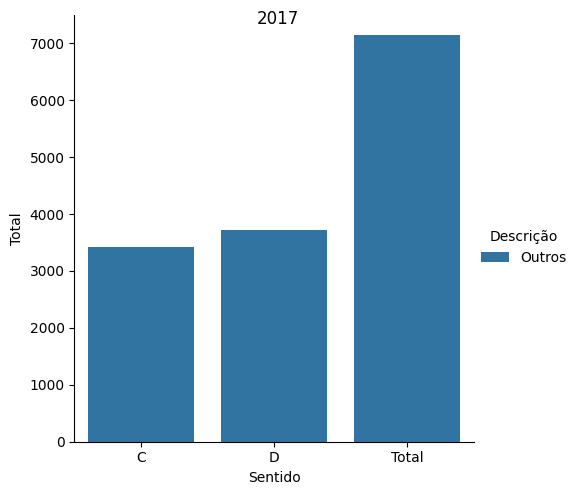

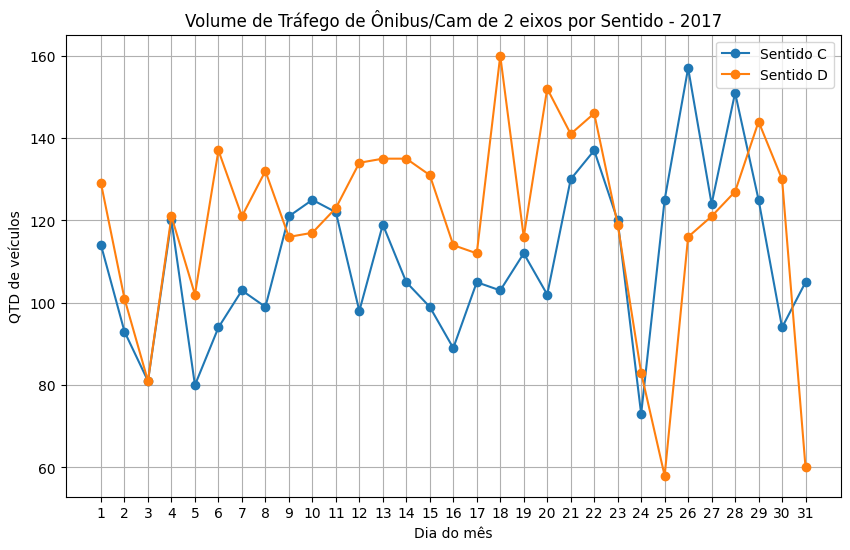


****************************
** ANO: 2018

****************************
** CLASSE: A
(3, 36)

** SENTIDO C
Media no Sentido C = 236.8709677419355
Maximo = 325
Minimo = 119
Desvio Padrao = 45.668328783766384
Mediana = 243.0

** SENTIDO D
Media no Sentido D = 283.7741935483871
Maximo = 371
Minimo = 143
Desvio Padrao = 69.66820428908561
Mediana = 304.0


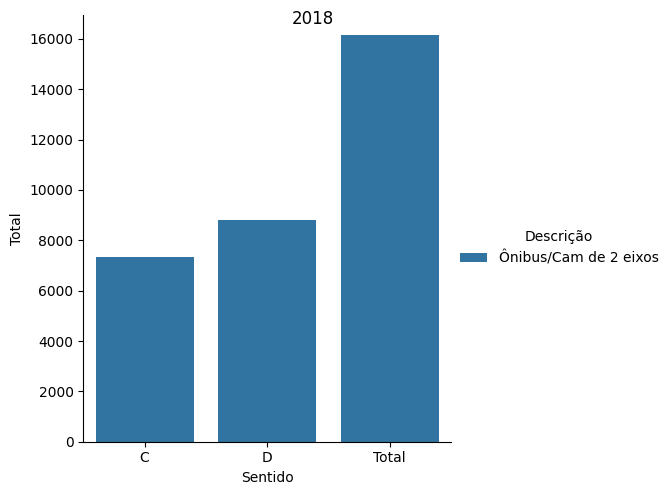

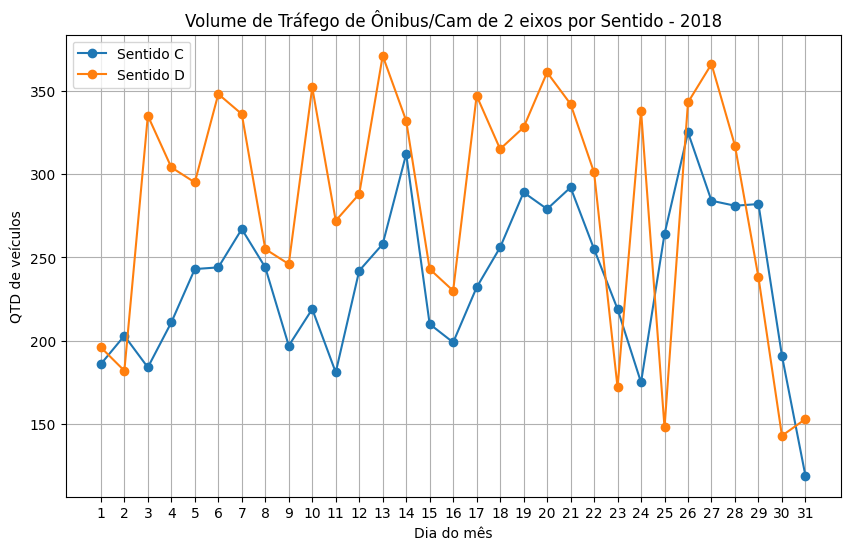


****************************
** CLASSE: B
(3, 36)

** SENTIDO C
Media no Sentido C = 110.64516129032258
Maximo = 149
Minimo = 43
Desvio Padrao = 25.448934811471023
Mediana = 110.0

** SENTIDO D
Media no Sentido D = 130.80645161290323
Maximo = 201
Minimo = 31
Desvio Padrao = 49.759693077338056
Mediana = 148.0


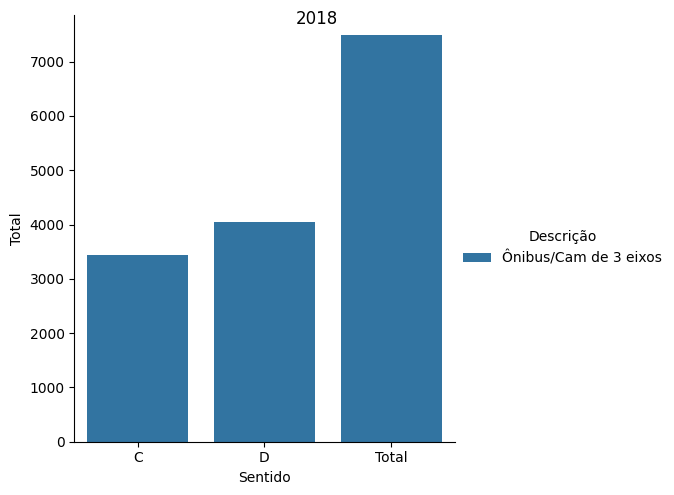

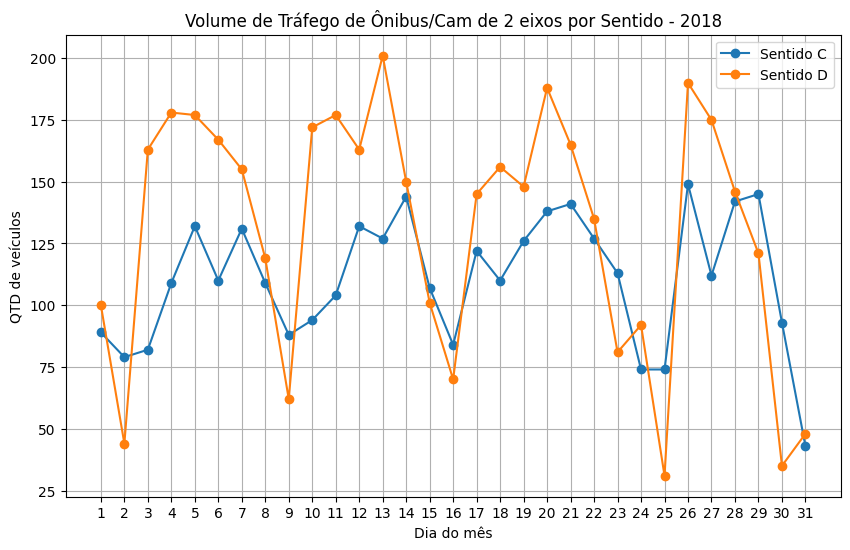


****************************
** CLASSE: C
(3, 36)

** SENTIDO C
Media no Sentido C = 13.0
Maximo = 24
Minimo = 7
Desvio Padrao = 3.9919273378867683
Mediana = 13.0

** SENTIDO D
Media no Sentido D = 27.967741935483872
Maximo = 56
Minimo = 4
Desvio Padrao = 13.410356784765016
Mediana = 30.0


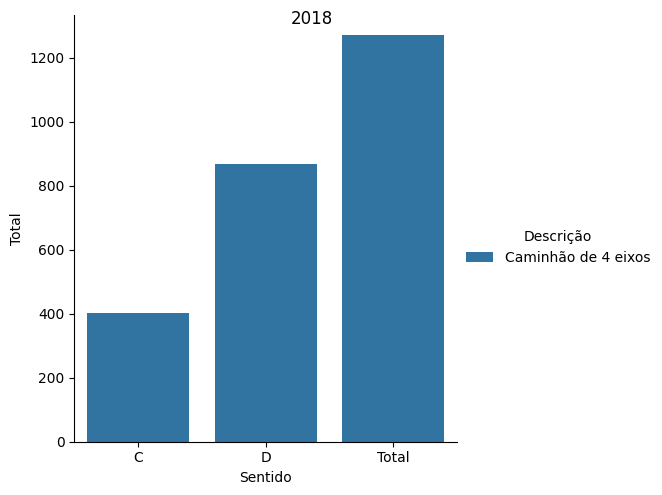

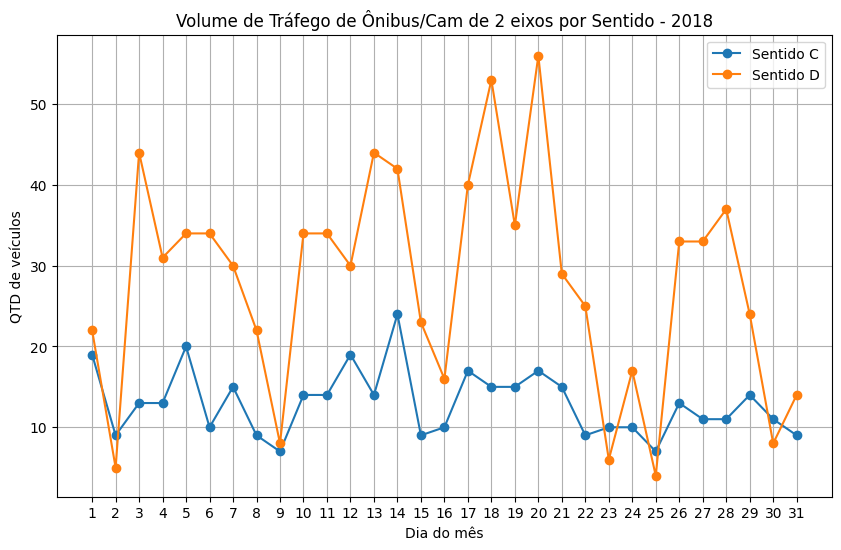


****************************
** CLASSE: D
(3, 36)

** SENTIDO C
Media no Sentido C = 7.903225806451613
Maximo = 17
Minimo = 1
Desvio Padrao = 3.871774109560507
Mediana = 7.0

** SENTIDO D
Media no Sentido D = 12.838709677419354
Maximo = 27
Minimo = 2
Desvio Padrao = 6.891307166575866
Mediana = 12.0


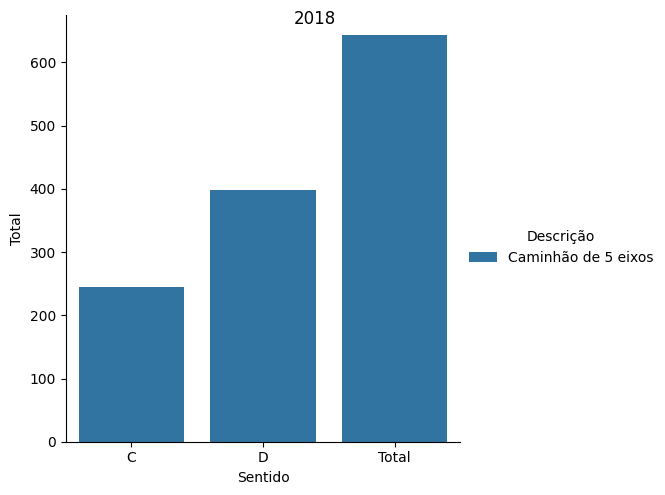

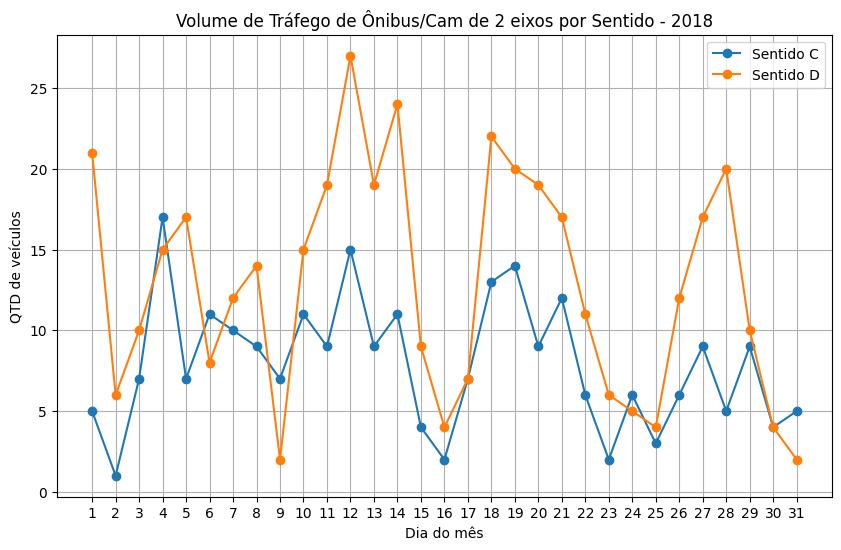


****************************
** CLASSE: E
(3, 36)

** SENTIDO C
Media no Sentido C = 10.64516129032258
Maximo = 25
Minimo = 1
Desvio Padrao = 5.744834353415159
Mediana = 10.0

** SENTIDO D
Media no Sentido D = 25.451612903225808
Maximo = 50
Minimo = 10
Desvio Padrao = 11.261807308338929
Mediana = 25.0


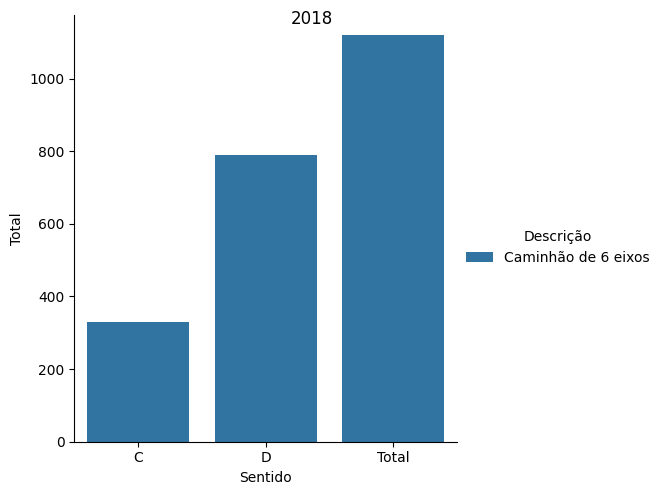

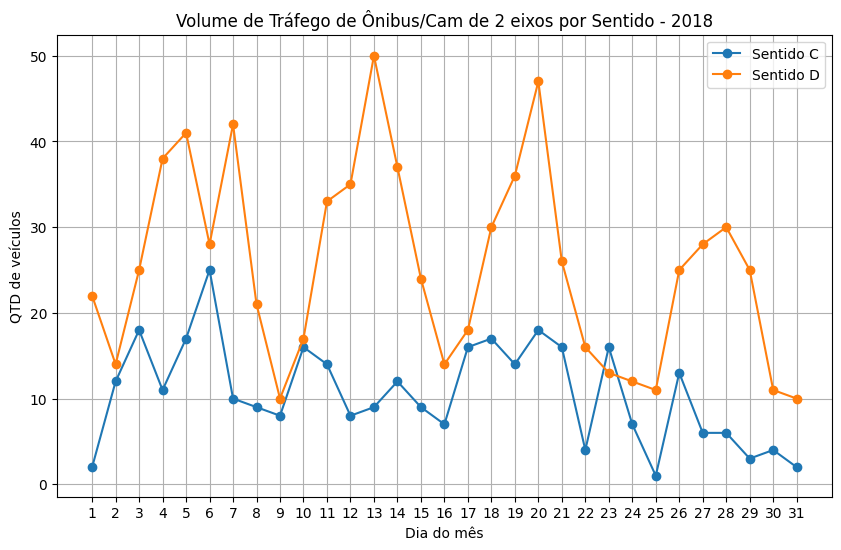


****************************
** CLASSE: F
(3, 36)

** SENTIDO C
Media no Sentido C = 4.516129032258065
Maximo = 11
Minimo = 0
Desvio Padrao = 2.674502881054727
Mediana = 4.0

** SENTIDO D
Media no Sentido D = 8.0
Maximo = 16
Minimo = 2
Desvio Padrao = 3.482676019681491
Mediana = 7.0


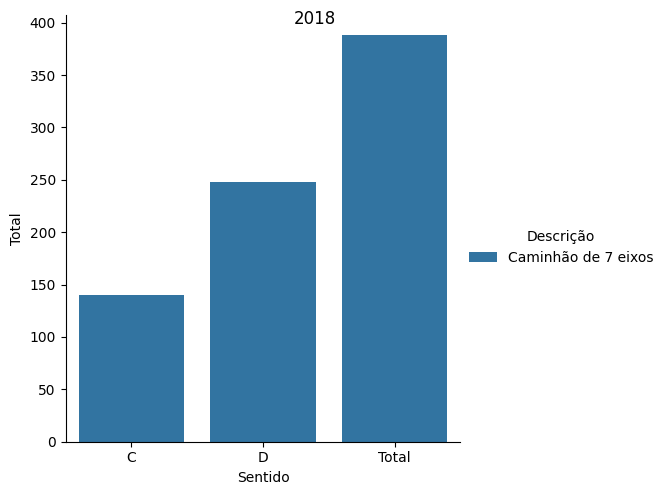

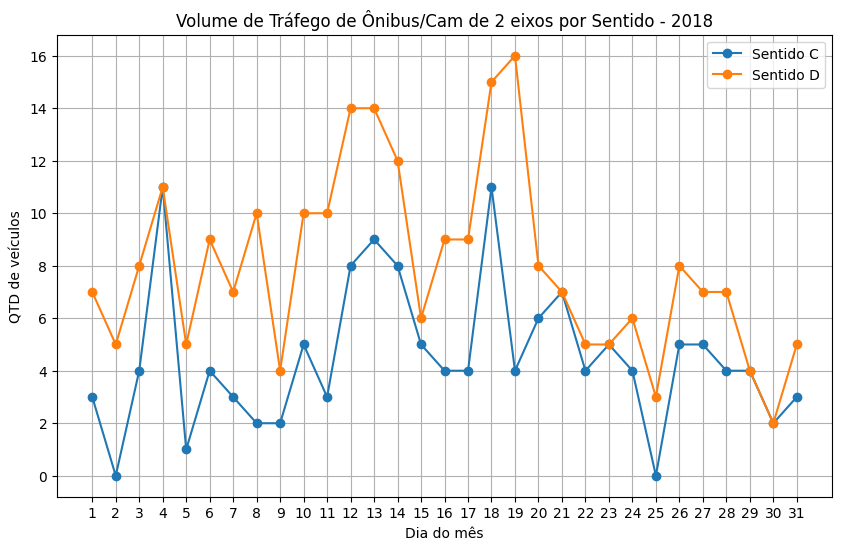


****************************
** CLASSE: G
(3, 36)

** SENTIDO C
Media no Sentido C = 0.12903225806451613
Maximo = 1
Minimo = 0
Desvio Padrao = 0.3352356401746214
Mediana = 0.0

** SENTIDO D
Media no Sentido D = 0.06451612903225806
Maximo = 1
Minimo = 0
Desvio Padrao = 0.24567010018915833
Mediana = 0.0


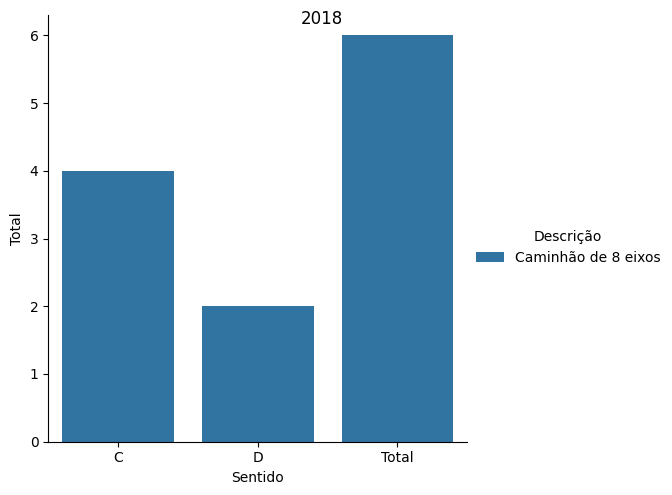

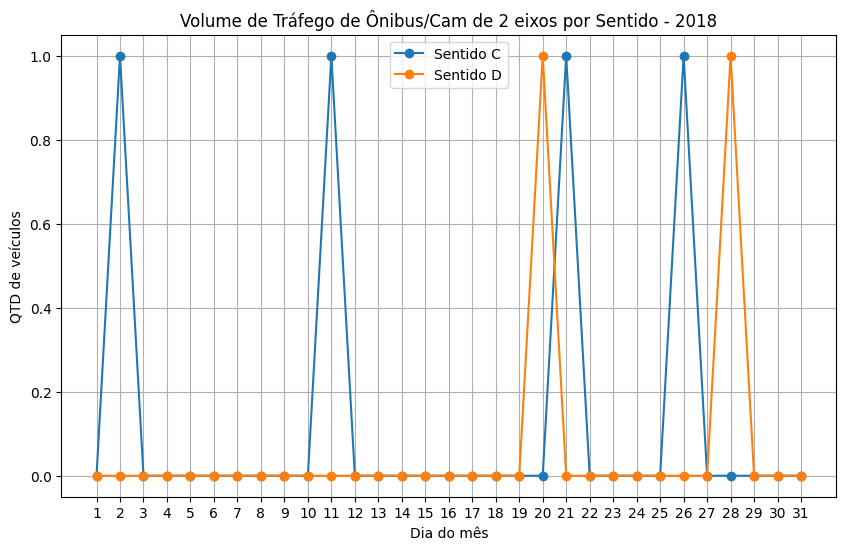


****************************
** CLASSE: H
(3, 36)

** SENTIDO C
Media no Sentido C = 12.870967741935484
Maximo = 24
Minimo = 5
Desvio Padrao = 5.7515323931911535
Mediana = 13.0

** SENTIDO D
Media no Sentido D = 6.064516129032258
Maximo = 16
Minimo = 1
Desvio Padrao = 4.242150123356633
Mediana = 5.0


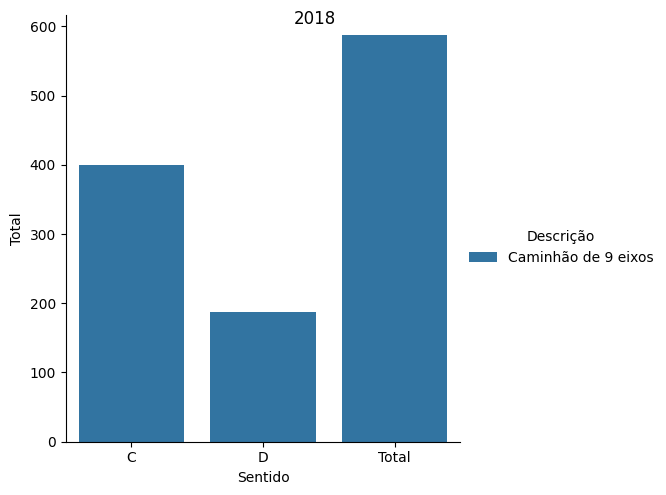

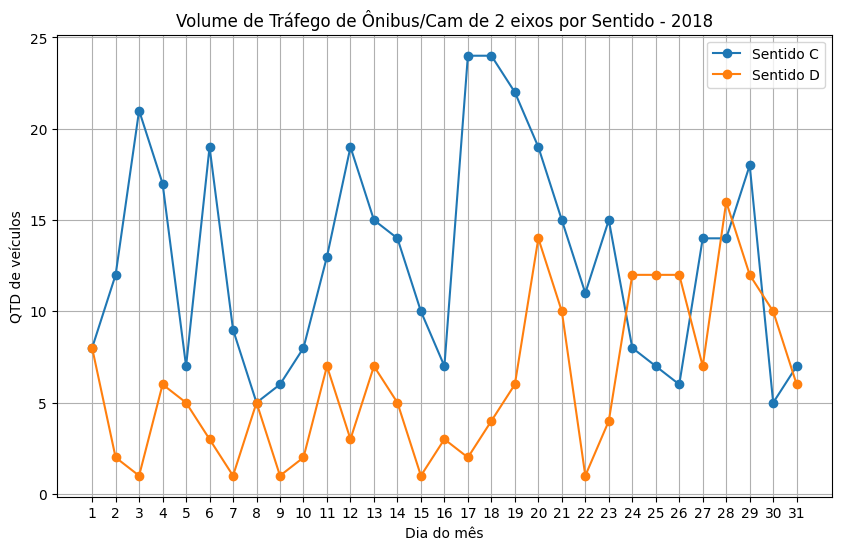


****************************
** CLASSE: I
(3, 36)

** SENTIDO C
Media no Sentido C = 2575.7096774193546
Maximo = 3481
Minimo = 1859
Desvio Padrao = 457.3512939036904
Mediana = 2413.0

** SENTIDO D
Media no Sentido D = 2905.967741935484
Maximo = 5064
Minimo = 1971
Desvio Padrao = 789.5828822813191
Mediana = 2616.0


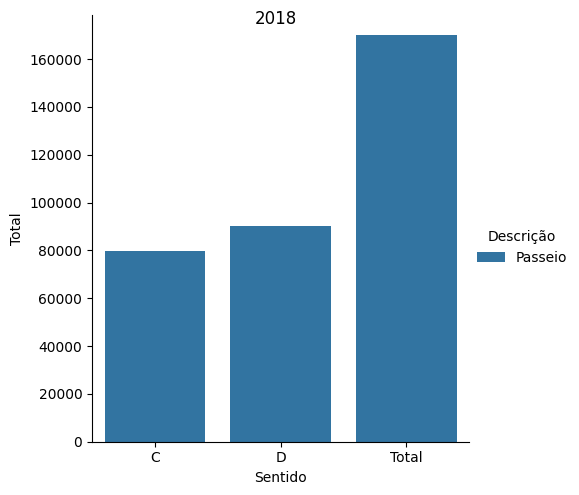

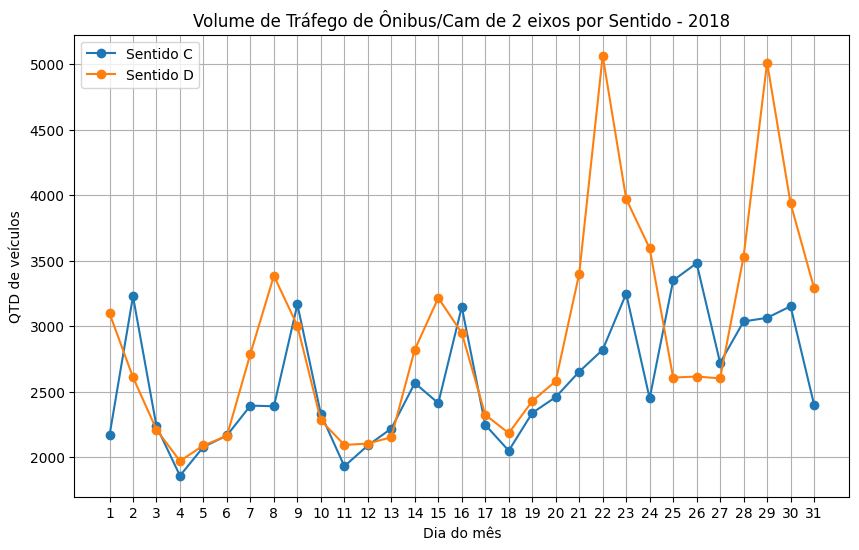


****************************
** CLASSE: J
(3, 36)

** SENTIDO C
Media no Sentido C = 543.0645161290323
Maximo = 721
Minimo = 440
Desvio Padrao = 75.03286827477717
Mediana = 522.0

** SENTIDO D
Media no Sentido D = 620.6129032258065
Maximo = 971
Minimo = 417
Desvio Padrao = 164.71396074943019
Mediana = 547.0


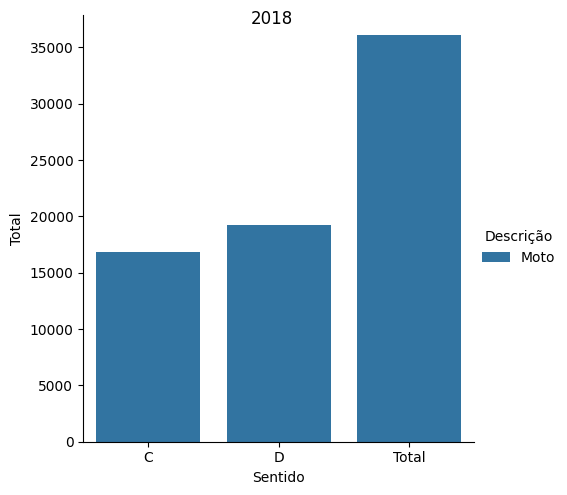

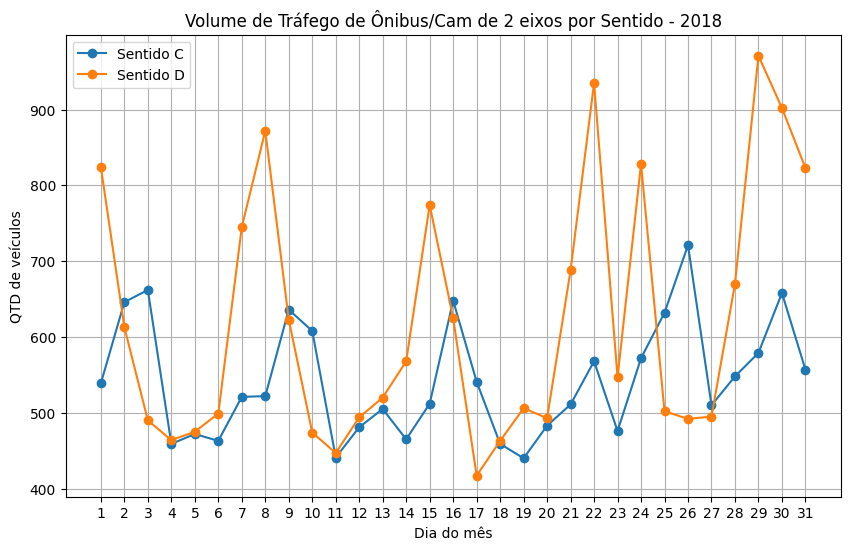


****************************
** CLASSE: L
(3, 36)

** SENTIDO C
Media no Sentido C = 93.96774193548387
Maximo = 148
Minimo = 66
Desvio Padrao = 17.351180811296555
Mediana = 92.0

** SENTIDO D
Media no Sentido D = 123.70967741935483
Maximo = 174
Minimo = 61
Desvio Padrao = 26.296318334711
Mediana = 131.0


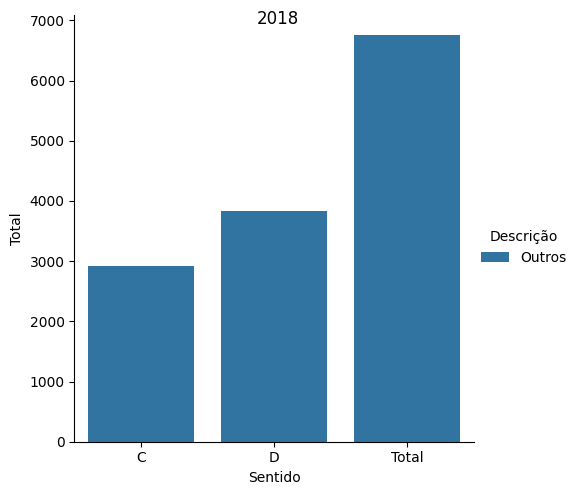

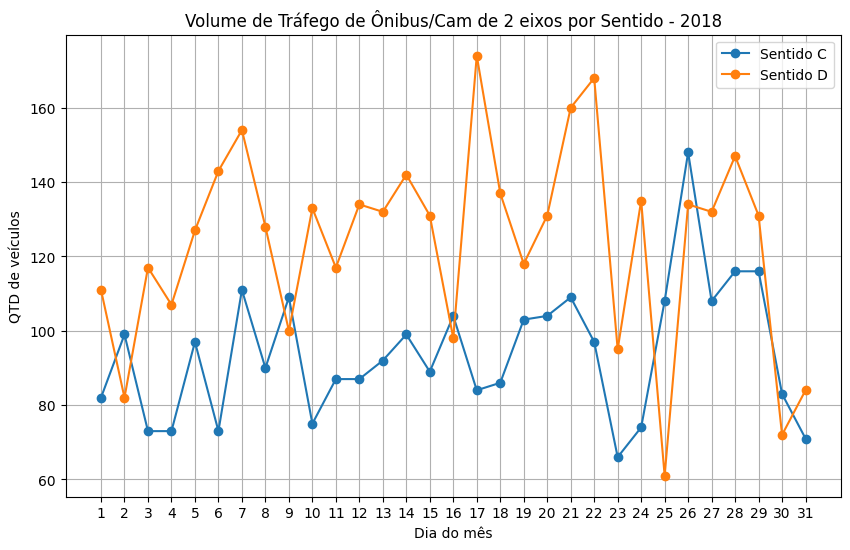


****************************
** ANO: 2021

****************************
** CLASSE: A
(3, 36)

** SENTIDO C
Media no Sentido C = 308.741935483871
Maximo = 440
Minimo = 121
Desvio Padrao = 81.30110015600332
Mediana = 322.0

** SENTIDO D
Media no Sentido D = 264.51612903225805
Maximo = 358
Minimo = 57
Desvio Padrao = 75.39267995944446
Mediana = 290.0


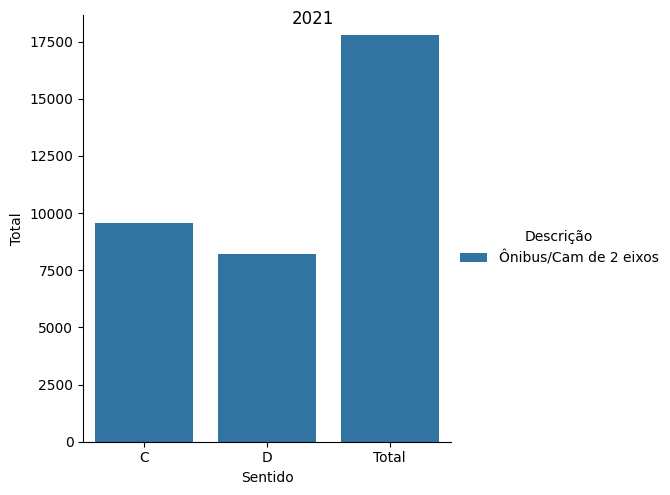

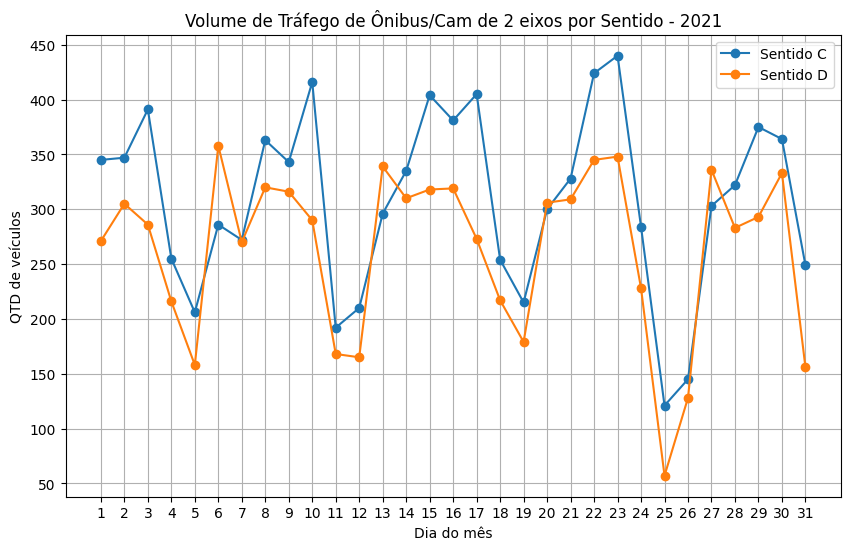


****************************
** CLASSE: B
(3, 36)

** SENTIDO C
Media no Sentido C = 154.06451612903226
Maximo = 262
Minimo = 24
Desvio Padrao = 60.19695388492622
Mediana = 156.0

** SENTIDO D
Media no Sentido D = 140.41935483870967
Maximo = 245
Minimo = 17
Desvio Padrao = 63.43895933000549
Mediana = 159.0


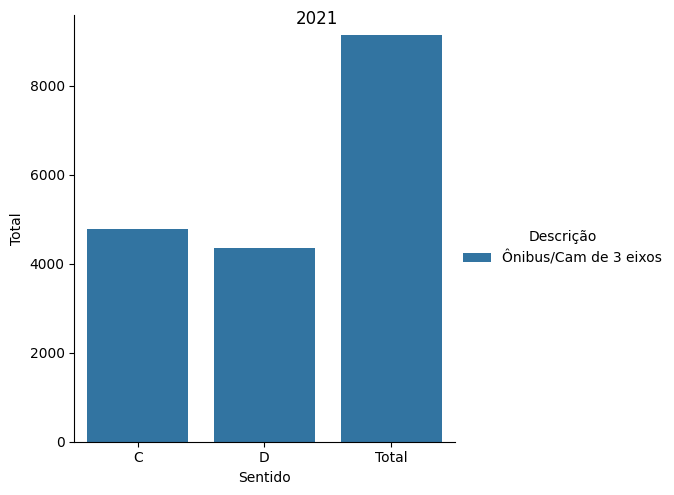

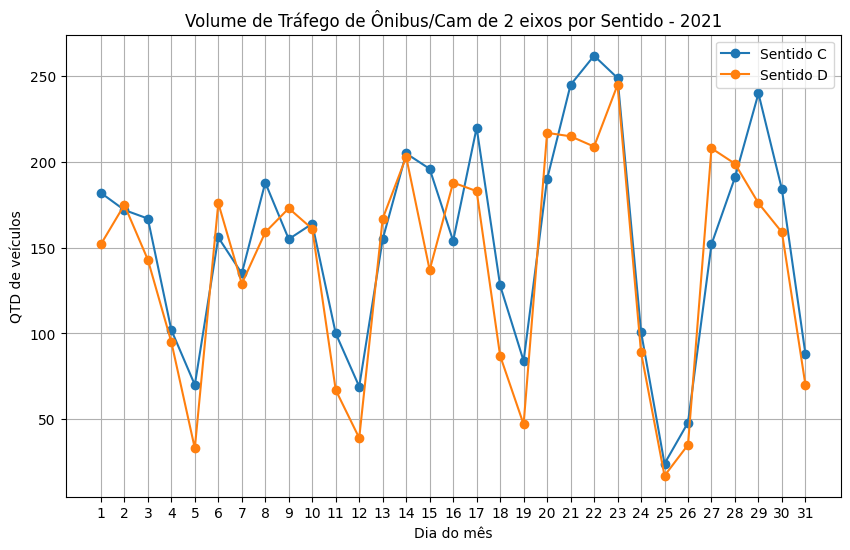


****************************
** CLASSE: C
(3, 36)

** SENTIDO C
Media no Sentido C = 27.903225806451612
Maximo = 43
Minimo = 8
Desvio Padrao = 9.65653660851509
Mediana = 30.0

** SENTIDO D
Media no Sentido D = 23.387096774193548
Maximo = 38
Minimo = 3
Desvio Padrao = 8.856116600897893
Mediana = 27.0


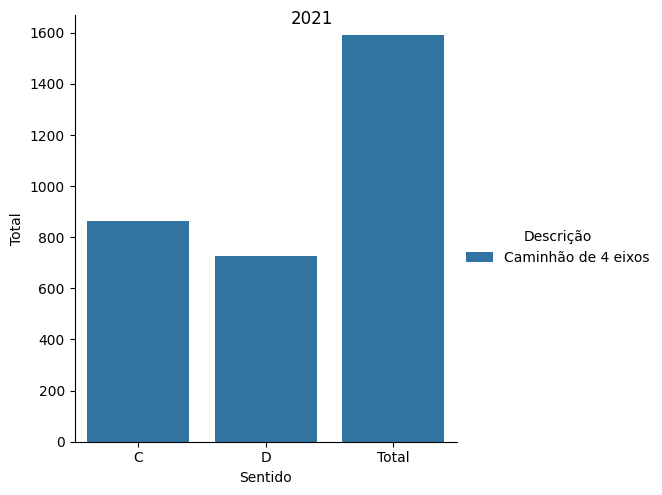

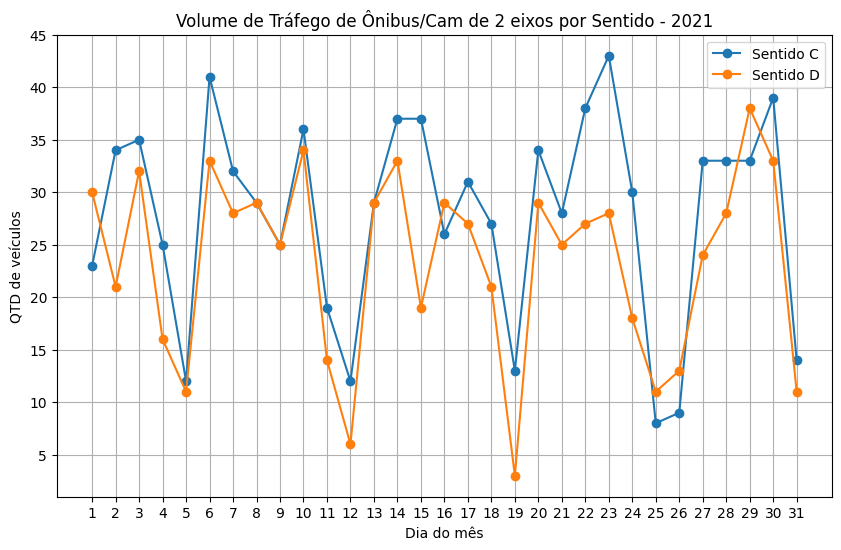


****************************
** CLASSE: D
(3, 36)

** SENTIDO C
Media no Sentido C = 17.322580645161292
Maximo = 31
Minimo = 1
Desvio Padrao = 6.793673987136589
Mediana = 17.0

** SENTIDO D
Media no Sentido D = 11.806451612903226
Maximo = 25
Minimo = 1
Desvio Padrao = 5.491455855139784
Mediana = 13.0


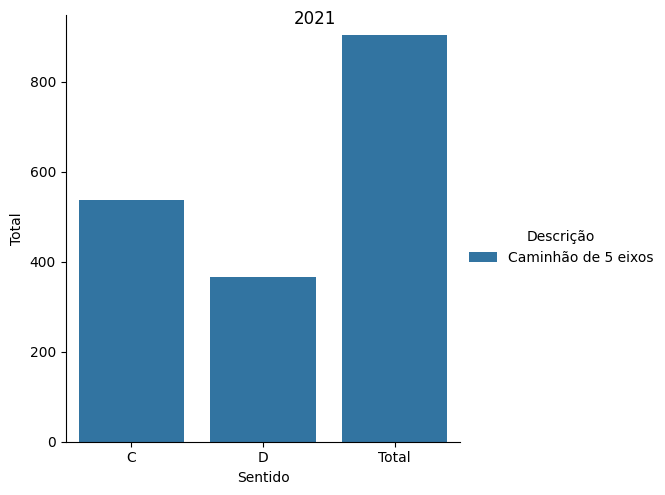

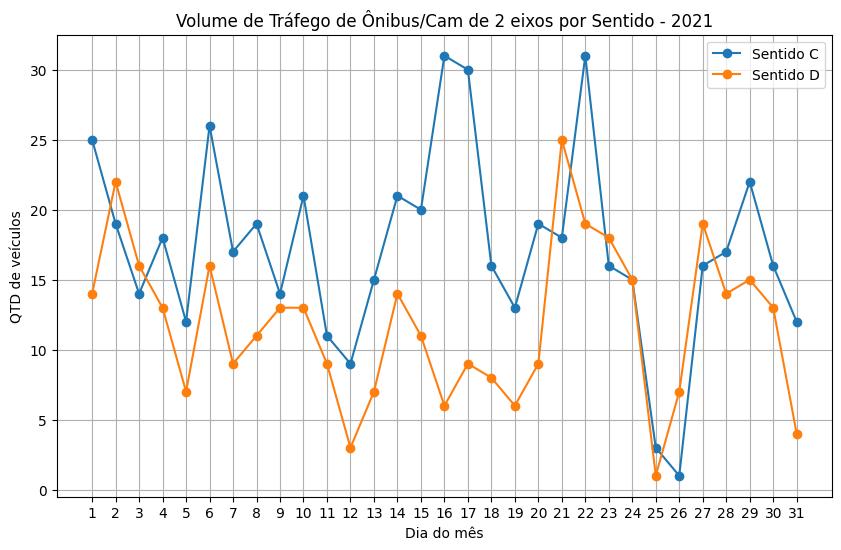


****************************
** CLASSE: E
(3, 36)

** SENTIDO C
Media no Sentido C = 20.0
Maximo = 32
Minimo = 10
Desvio Padrao = 5.792096951603469
Mediana = 20.0

** SENTIDO D
Media no Sentido D = 18.93548387096774
Maximo = 31
Minimo = 2
Desvio Padrao = 6.589020603079366
Mediana = 19.0


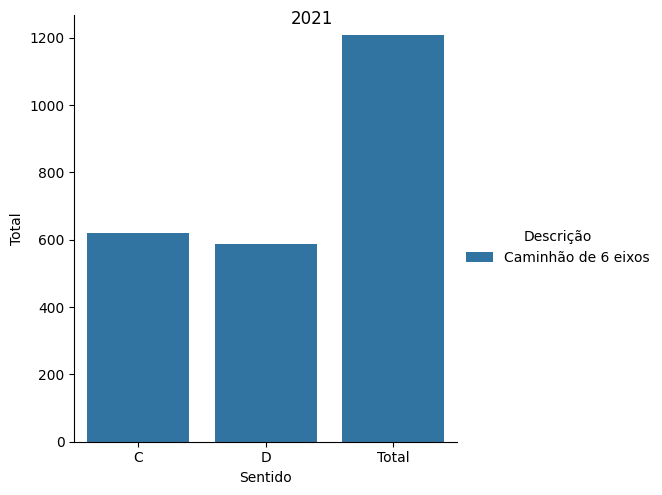

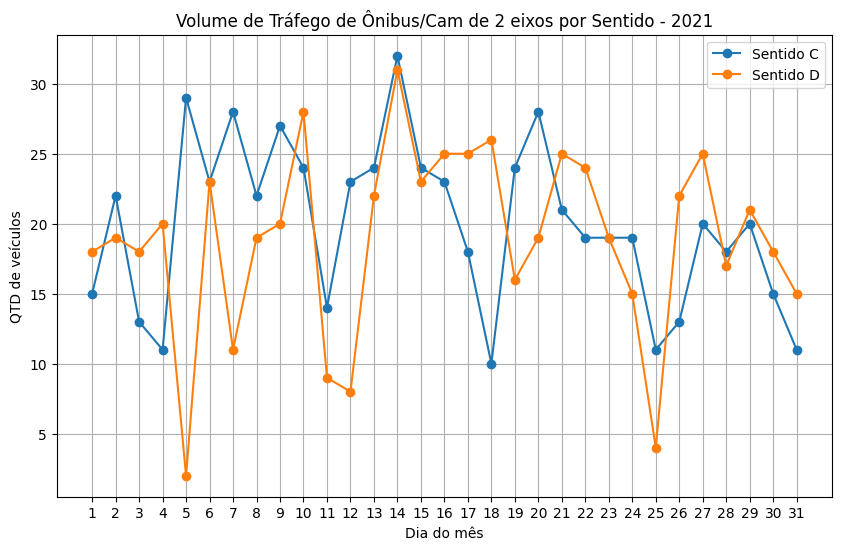


****************************
** CLASSE: F
(3, 36)

** SENTIDO C
Media no Sentido C = 5.741935483870968
Maximo = 14
Minimo = 0
Desvio Padrao = 2.950863645426909
Mediana = 6.0

** SENTIDO D
Media no Sentido D = 6.903225806451613
Maximo = 17
Minimo = 1
Desvio Padrao = 4.06681962376465
Mediana = 6.0


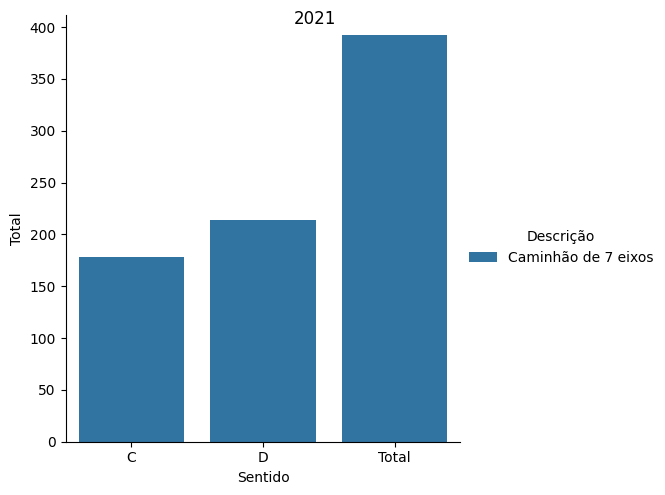

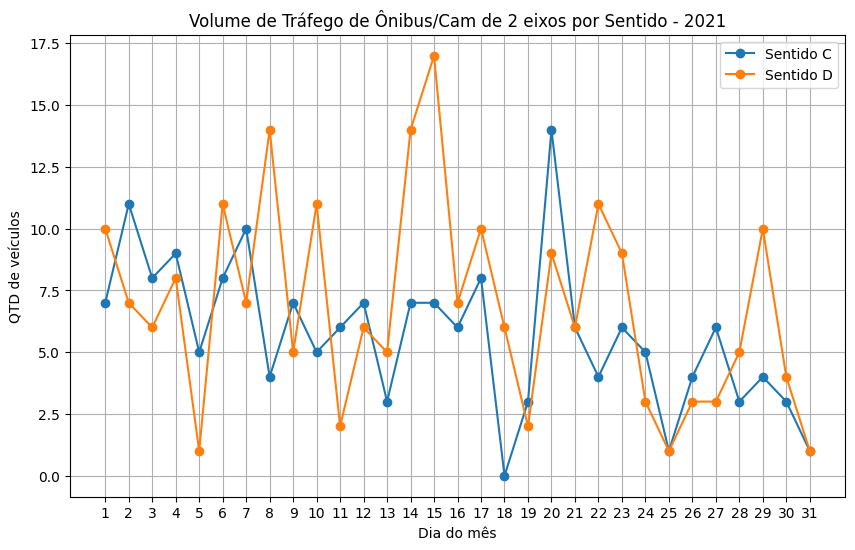


****************************
** CLASSE: G
(3, 36)

** SENTIDO C
Media no Sentido C = 0.3548387096774194
Maximo = 2
Minimo = 0
Desvio Padrao = 0.5982979674513357
Mediana = 0.0

** SENTIDO D
Media no Sentido D = 0.25806451612903225
Maximo = 2
Minimo = 0
Desvio Padrao = 0.5059479723018749
Mediana = 0.0


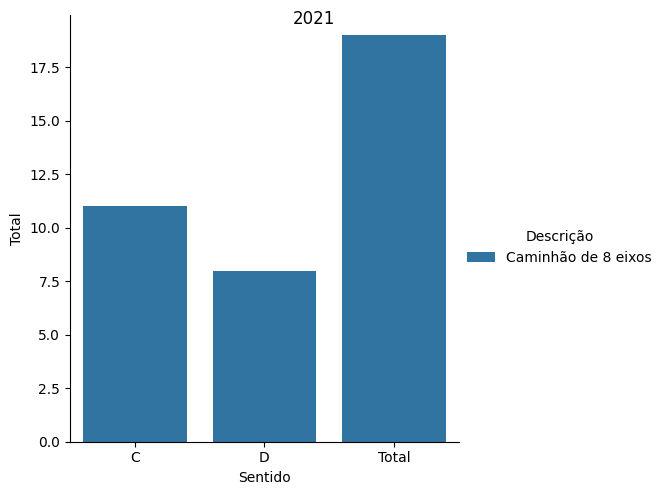

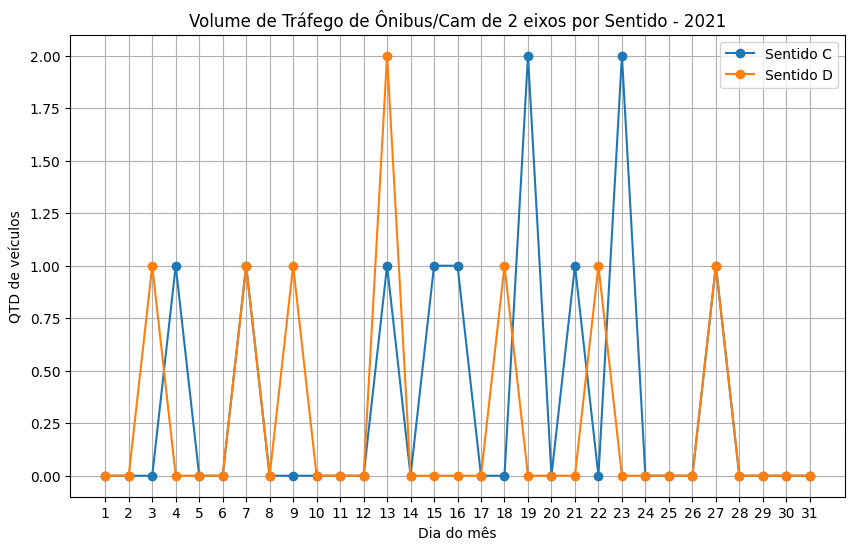


****************************
** CLASSE: H
(3, 36)

** SENTIDO C
Media no Sentido C = 28.967741935483872
Maximo = 53
Minimo = 10
Desvio Padrao = 9.713588323938332
Mediana = 29.0

** SENTIDO D
Media no Sentido D = 2.2580645161290325
Maximo = 7
Minimo = 0
Desvio Padrao = 1.6057907696327278
Mediana = 2.0


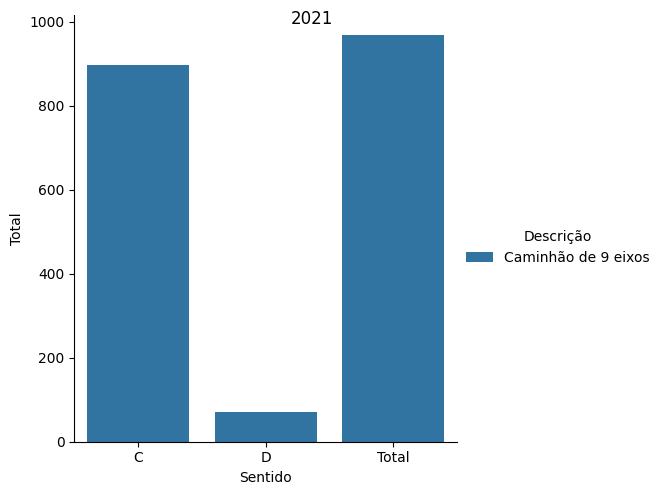

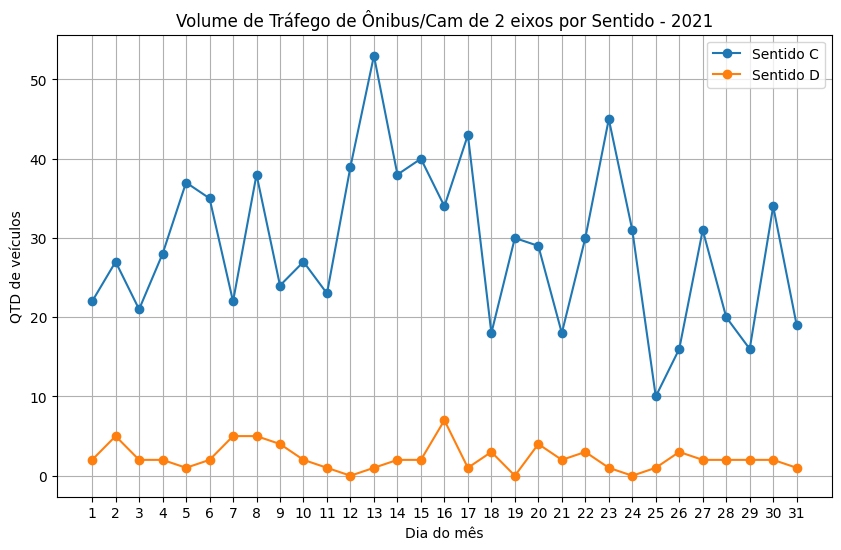


****************************
** CLASSE: I
(3, 36)

** SENTIDO C
Media no Sentido C = 2465.967741935484
Maximo = 5213
Minimo = 1667
Desvio Padrao = 702.6387354165754
Mediana = 2317.0

** SENTIDO D
Media no Sentido D = 2686.935483870968
Maximo = 5719
Minimo = 1874
Desvio Padrao = 925.42230762532
Mediana = 2393.0


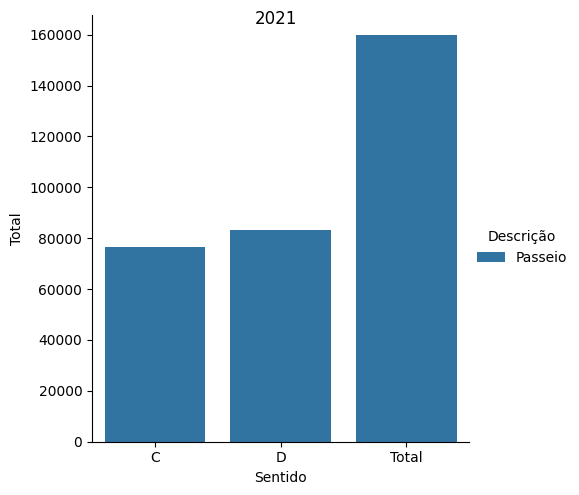

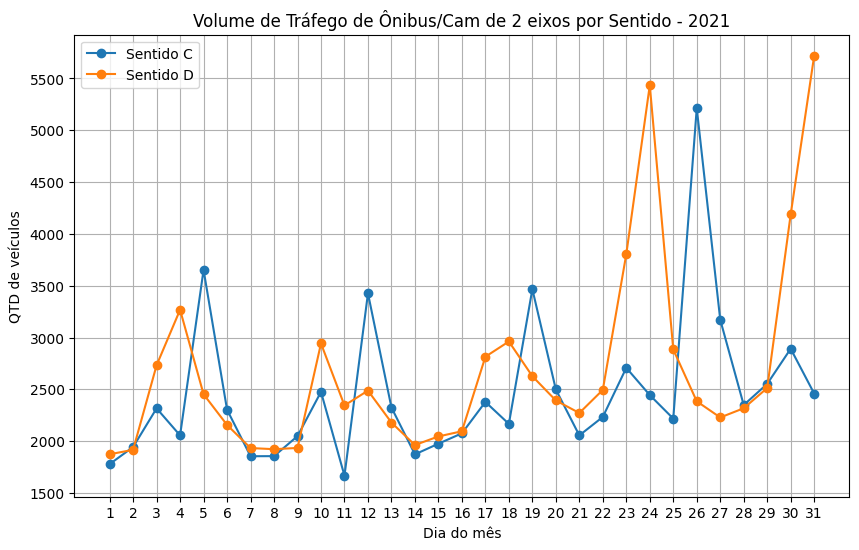


****************************
** CLASSE: J
(3, 36)

** SENTIDO C
Media no Sentido C = 336.4193548387097
Maximo = 575
Minimo = 248
Desvio Padrao = 89.69833824243756
Mediana = 297.0

** SENTIDO D
Media no Sentido D = 360.19354838709677
Maximo = 904
Minimo = 230
Desvio Padrao = 153.7111701515034
Mediana = 296.0


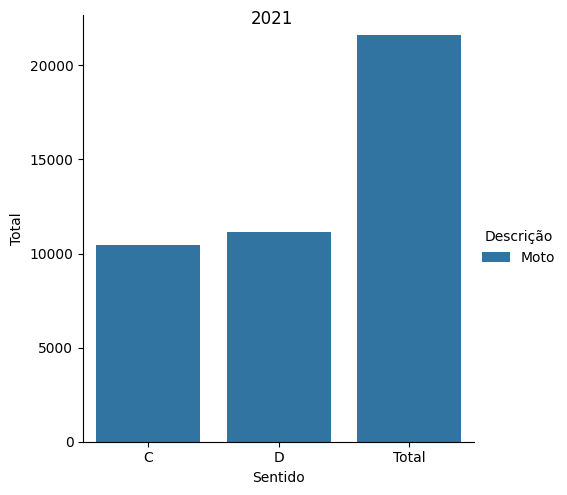

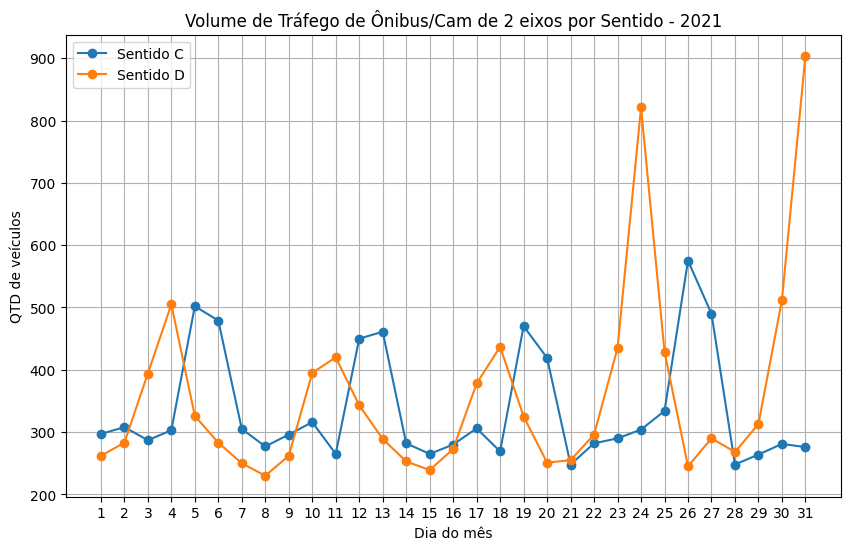


****************************
** CLASSE: L
(3, 36)

** SENTIDO C
Media no Sentido C = 31.29032258064516
Maximo = 48
Minimo = 14
Desvio Padrao = 6.797502142685407
Mediana = 30.0

** SENTIDO D
Media no Sentido D = 41.645161290322584
Maximo = 58
Minimo = 20
Desvio Padrao = 8.753058035565939
Mediana = 41.0


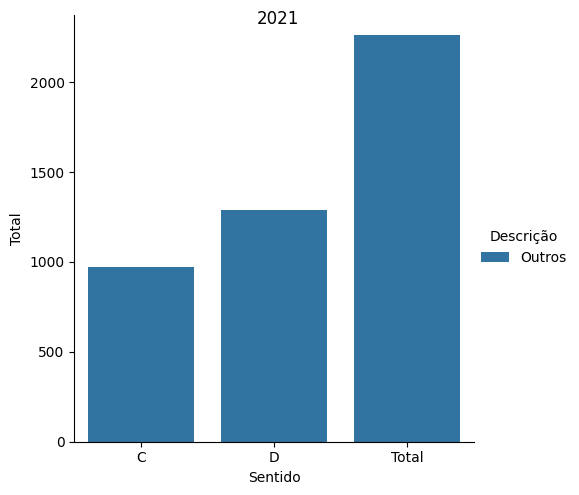

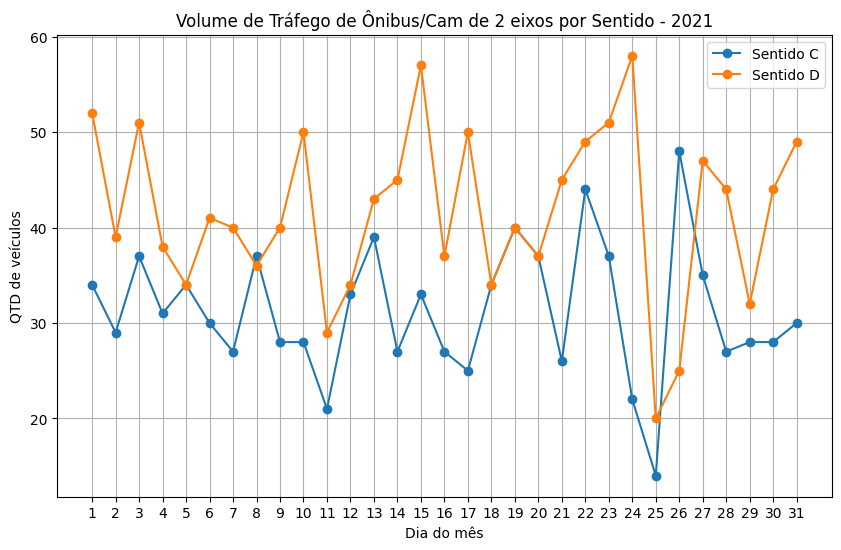

In [9]:
for ano, df in dfs.items():
    print('\n****************************')
    print('** ANO: ' + str(ano))
    
    gerarPorClasse('A', ano)
    gerarPorClasse('B', ano)
    gerarPorClasse('C', ano)
    gerarPorClasse('D', ano)
    gerarPorClasse('E', ano)
    gerarPorClasse('F', ano)
    gerarPorClasse('G', ano)
    gerarPorClasse('H', ano)
    gerarPorClasse('I', ano)
    gerarPorClasse('J', ano)
    gerarPorClasse('L', ano)
    

In [60]:
subdata = df[df['Sentido'] == 'Total']
subdata = subdata.iloc[:11]
subdata = subdata.drop(['Total'],axis=1)
subdata

Unnamed: 0 Classe              Descrição Sentido     1     2     3     4  \
2            2      A  Ônibus/Cam de 2 eixos   Total   616   652   677   471   
5            5      B  Ônibus/Cam de 3 eixos   Total   334   347   310   197   
8            8      C    Caminhão de 4 eixos   Total    53    55    67    41   
11          11      D    Caminhão de 5 eixos   Total    39    41    30    31   
14          14      E    Caminhão de 6 eixos   Total    33    41    31    31   
17          17      F    Caminhão de 7 eixos   Total    17    18    14    17   
20          20      G    Caminhão de 8 eixos   Total     0     0     1     1   
23          23      H    Caminhão de 9 eixos   Total    24    32    23    30   
26          26      I                Passeio   Total  3653  3861  5050  5324   
29          29      J                   Moto   Total   559   591   681   808   
32          32      L                 Outros   Total    86    68    88    69   

       5     6  ...    22    23    24    25    26    27    28    29    30  \
2    364   644  ...   769   788   512   178   273   639   605   668   697   
5    103   332  ...   471   494   190    41    83   360   390   416   343   
8     23    74  ...    65    71    48    19    22    57    61    71    72   
11    19    42  ...    50    34    30     4     8    35    31    37    29   
14    31    46  ...    43    38    34    15    35    45    35    41    33   
17     6    19  ...    15    15     8     2     7     9     8    14     7   
20     0     0  ...     1     2     0     0     0     2     0     0     0   
23    38    37  ...    33    46    31    11    19    33    22    18    36   
26  6106  4461  ...  4729  6513  7879  5103  7598  5401  4667  5066  7080   
29   828   762  ...   578   725  1125   763   820   780   516   577   793   
32    68    71  ...    93    88    80    34    73    82    71    60    72   

      31  
2    405  
5    158  
8     25  
11    16  
14    26  
17     2  
20     0  
23    20  
26  8179  
29  1180  
32    79  

[11 rows x 35 columns]

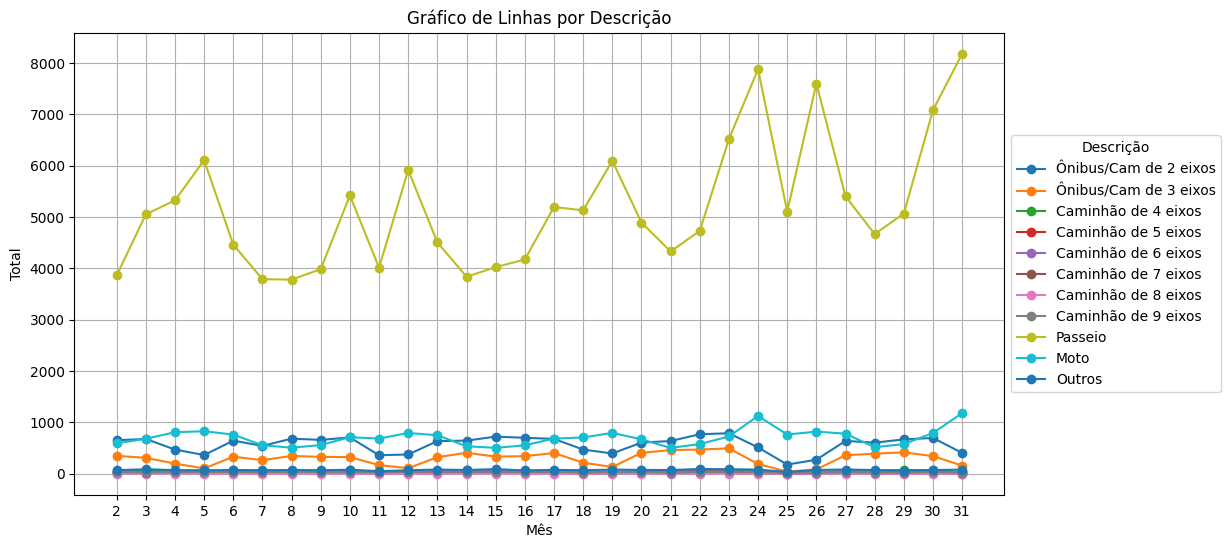

In [61]:
plt.figure(figsize=(12, 6))

for index, row in subdata.iterrows():
    plt.plot(subdata.columns[5:], row[5:], label=row['Descrição'], marker='o', linestyle='-')
    
plt.title('Gráfico de Linhas por Descrição')
plt.xlabel('Mês')
plt.ylabel('Total')
plt.legend(title="Descrição", loc="center left", bbox_to_anchor=(1, 0.5))


plt.grid(True)
plt.show()

In [63]:
subdf = df[['Classe','Descrição','Sentido','Total']]
subdf = subdf[subdf['Sentido'] == 'Total']
subdf = subdf.iloc[:11]
subdf

Classe              Descrição Sentido   Total
2       A  Ônibus/Cam de 2 eixos   Total   17771
5       B  Ônibus/Cam de 3 eixos   Total    9129
8       C    Caminhão de 4 eixos   Total    1590
11      D    Caminhão de 5 eixos   Total     903
14      E    Caminhão de 6 eixos   Total    1207
17      F    Caminhão de 7 eixos   Total     392
20      G    Caminhão de 8 eixos   Total      19
23      H    Caminhão de 9 eixos   Total     968
26      I                Passeio   Total  159740
29      J                   Moto   Total   21595
32      L                 Outros   Total    2261

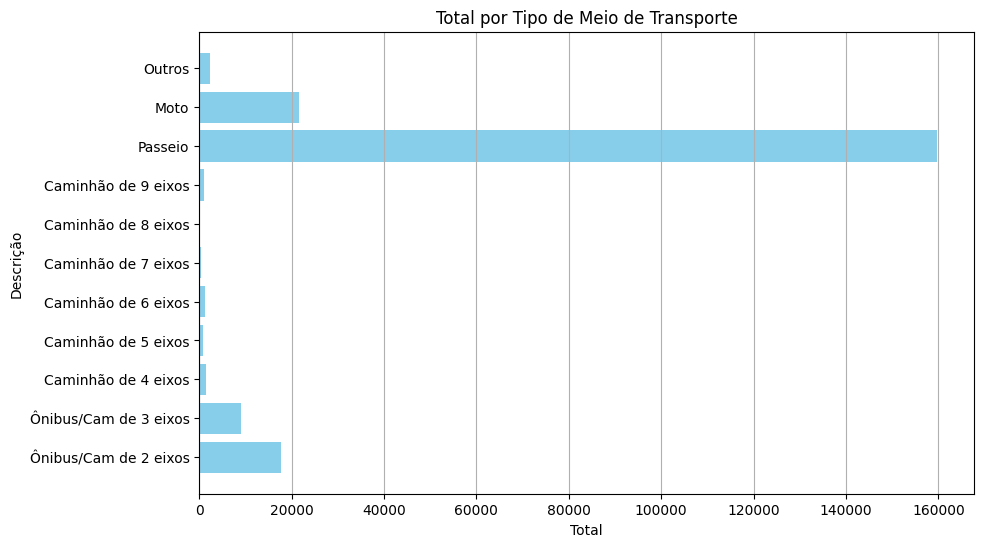

In [64]:
plt.figure(figsize=(10, 6))
plt.barh(subdf['Descrição'], subdf['Total'], color='skyblue')
plt.title('Total por Tipo de Meio de Transporte')
plt.xlabel('Total')
plt.ylabel('Descrição')

plt.grid(axis='x')
plt.show()


# Modelo Preditivo para os Próximos Anos

In [13]:
data_all_years = []

for ano, data in dfs.items():
    print('\n****************************')
    print('** ANO: ' + str(ano))

    # Remover as linhas e colunas de total e manter apenas as colunas numéricas
    numeric_data = data.select_dtypes(include=[np.number])

    # Preparar os dados e separar os conjuntos de treinamento e teste
    train, test = train_test_split(numeric_data, test_size=0.3, random_state=42)

    # Dividir o conjunto de treinamento em 5 subconjuntos para validação cruzada
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    train_sets = []
    for train_index, _ in kf.split(train):
        train_sets.append(train.iloc[train_index])

    # Treinar um modelo de regressão com rede neural artificial (MLP) para cada ano
    predicted_data = pd.DataFrame()

    for pred_year in [2019, 2020] + list(range(2023, 2034)):
        predictions = []

        for i, train_set in enumerate(train_sets):
            X_train = train_set.iloc[:, :-1]
            y_train = train_set.iloc[:, -1]
            mlp = MLPRegressor(random_state=42, max_iter=1000)
            mlp.fit(X_train, y_train)
            test_X = test.iloc[:, :-1]
            predicted_values = mlp.predict(test_X)
            predictions.append(predicted_values)

        # Média das previsões dos modelos de validação cruzada
        mean_predictions = np.mean(predictions, axis=0)
        predicted_data[pred_year] = mean_predictions

    # Recompor os índices da tabela de dados previstos
    predicted_data.reset_index(drop=True, inplace=True)

    # Adicione a coluna "Descrição" à tabela "predicted_data"
    # original_data = pd.read_csv(file_name, delimiter=';')
    predicted_data['Descrição'] = df['Descrição']

    # Adicione o ano como uma coluna
    predicted_data['Ano'] = ano

    data_all_years.append(predicted_data)


# Consolidar os dados de todos os anos em um único DataFrame
consolidated_data = pd.concat(data_all_years, ignore_index=True)

# Salvar os dados consolidados em um único arquivo CSV
consolidated_data.to_csv('predicted_traffic_all_years.csv', index=False)


****************************
** ANO: 2014

****************************
** ANO: 2015

****************************
** ANO: 2016

****************************
** ANO: 2017

****************************
** ANO: 2018

****************************
** ANO: 2021
